In [ ]:
!pip install noisereduce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from google.colab import drive
import os
import pandas as pd
import pywt
import csv
import os
from glob import glob
import noisereduce as nr
import shutil
from scipy.io import wavfile

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')
directory = "/content"
base_path = "/content/drive/MyDrive/Skripsi"
normal_path = f'{base_path}{os.sep}Normal/'
audio_files_normal = glob(normal_path  + '*.wav')
Preprocess_normal = f'{base_path}{os.sep}Preprocess_Normal/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
for file in os.listdir(normal_path):
    print(file)

In [ ]:
file_normal = normal_path + 'LUSB.wav'
signal, sr = librosa.load(file_normal)

Text(0.5, 1.0, 'Sample of Raw PCG Signal Normal Data')

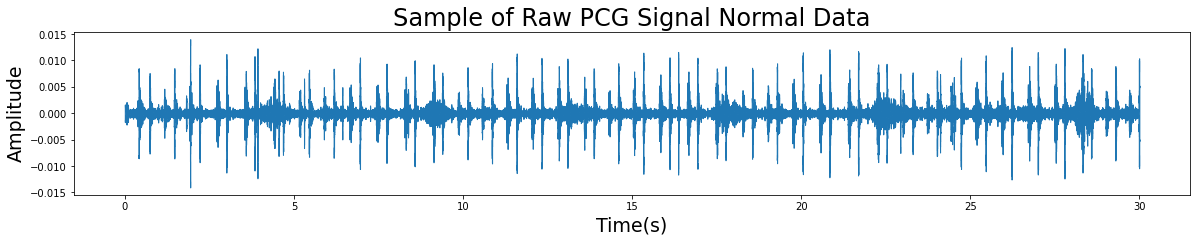

In [ ]:
plt.figure(figsize=(20,3))
librosa.display.waveshow(signal, sr = sr)
plt.ylabel("Amplitude", size=19)
plt.xlabel('Time(s)', size=19)
plt.title('Sample of Raw PCG Signal Normal Data', size=24)

Text(0.5, 1.0, 'Sample of Denoised PCG Signal Normal Data')

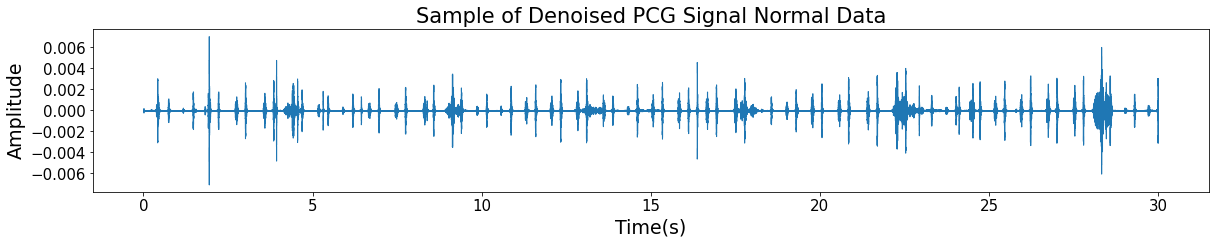

In [ ]:
reduced_noise = nr.reduce_noise(y = signal, sr=sr, n_std_thresh_stationary=1.5,stationary=True)
plt.figure(figsize=(20,3))
librosa.display.waveshow(reduced_noise)
plt.ylabel("Amplitude", size=19)
plt.xlabel('Time(s)', size=19)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('Sample of Denoised PCG Signal Normal Data', size=21)

In [ ]:
reduced_noise.size

661500

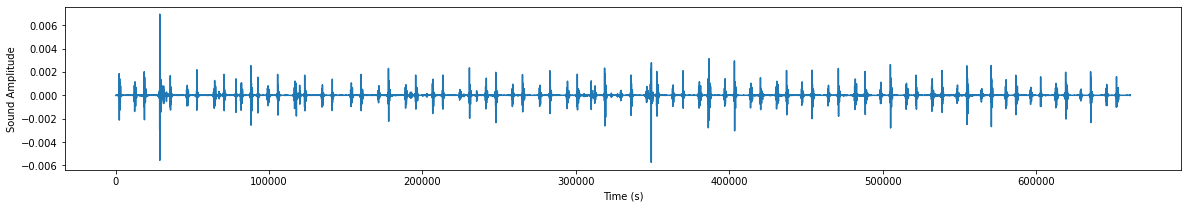

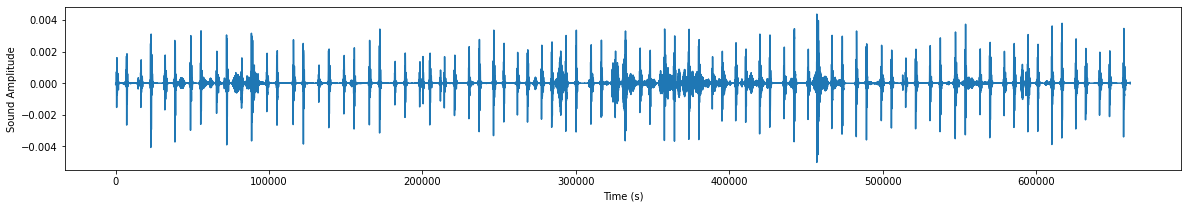

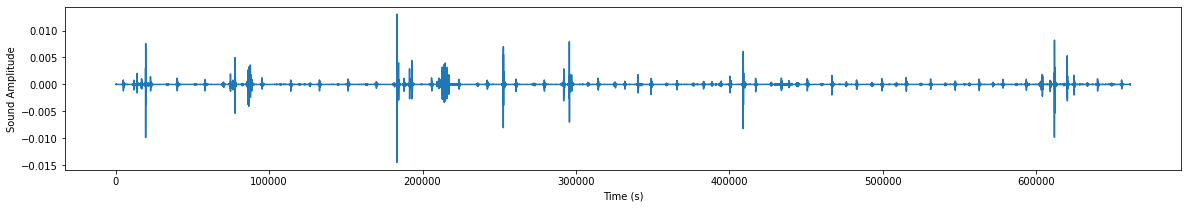

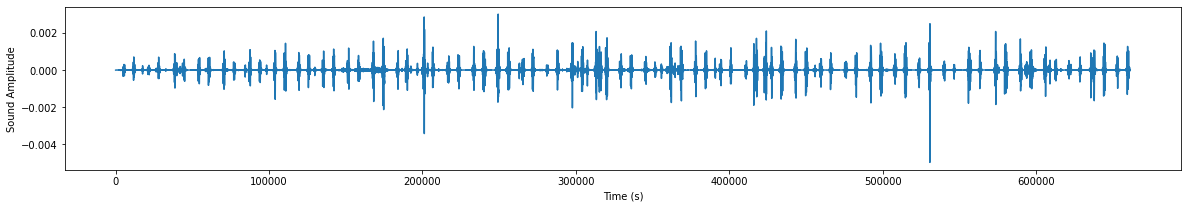

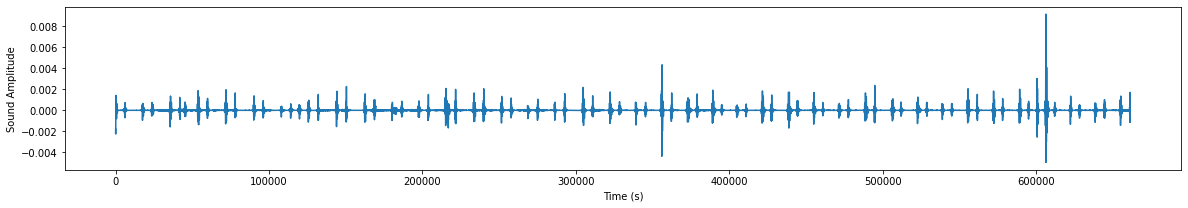

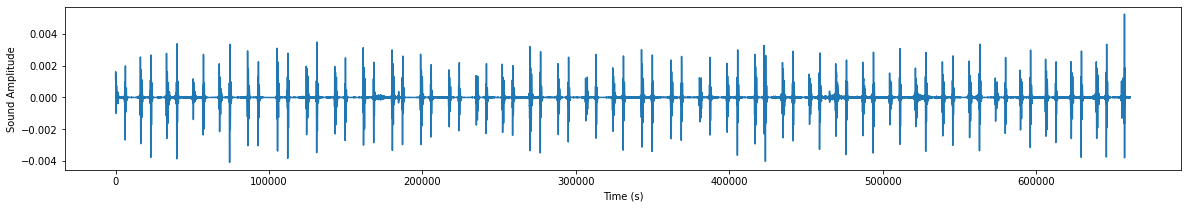

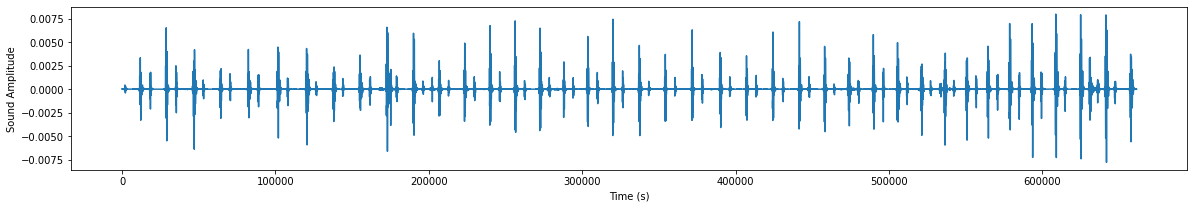

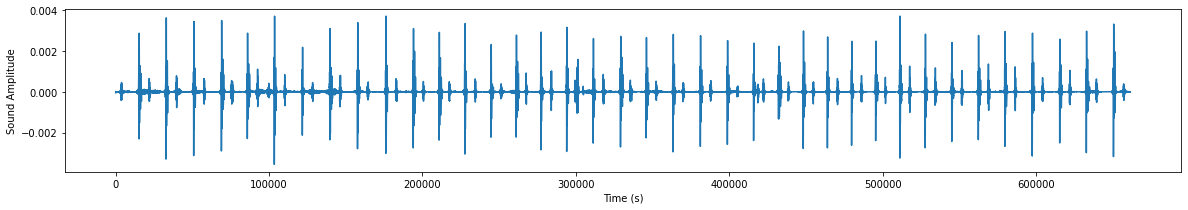

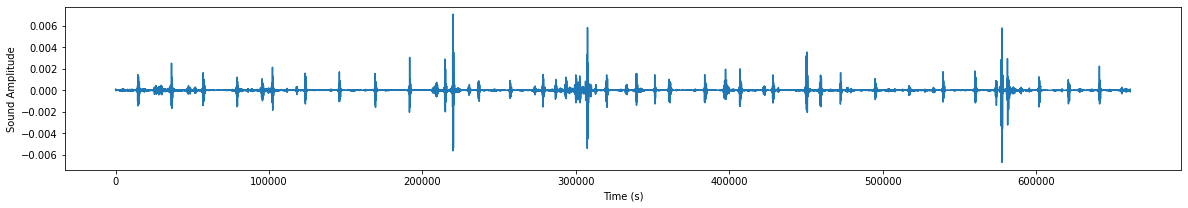

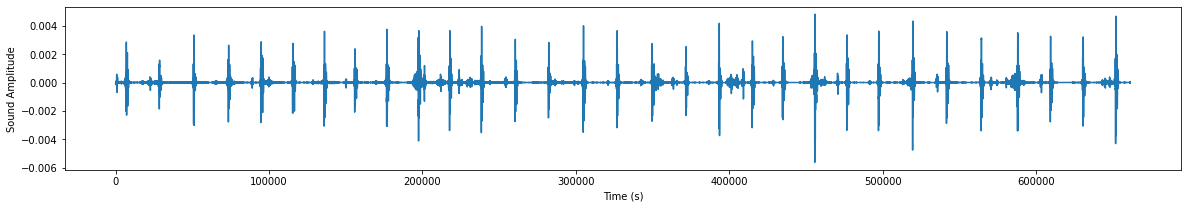

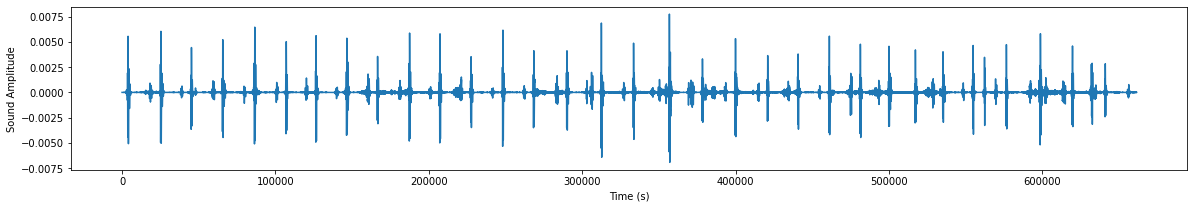

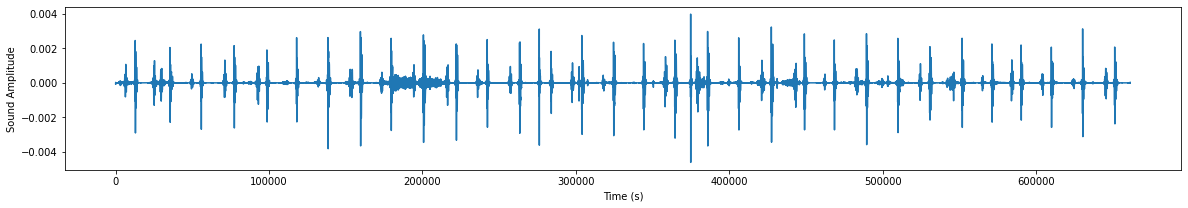

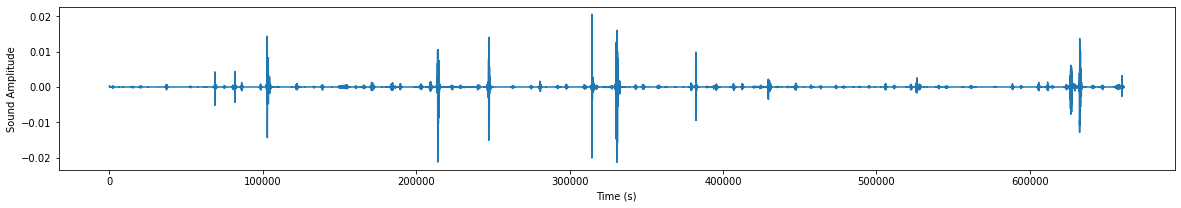

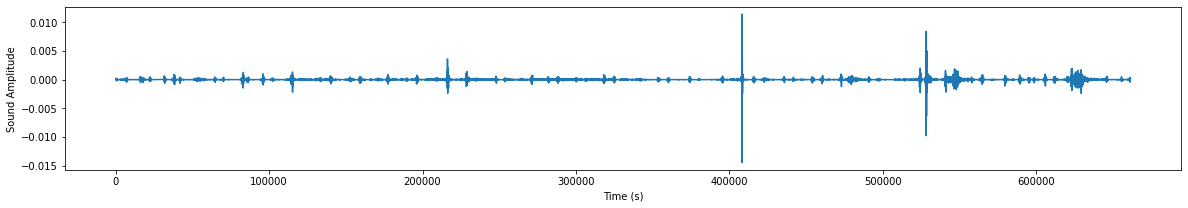

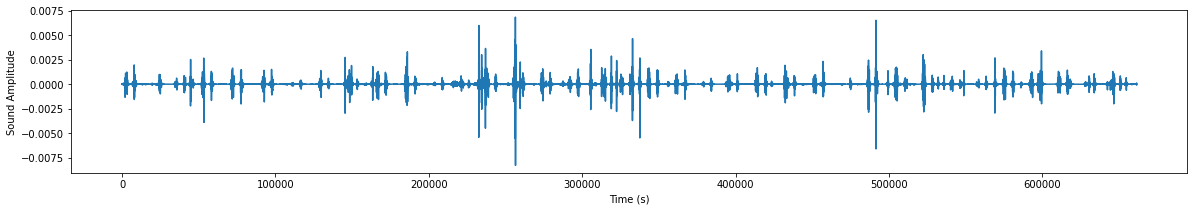

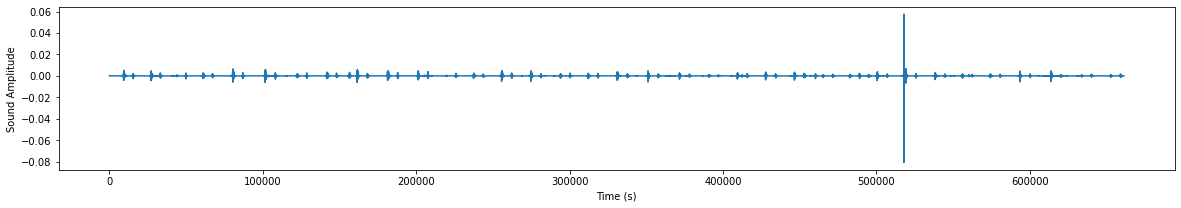

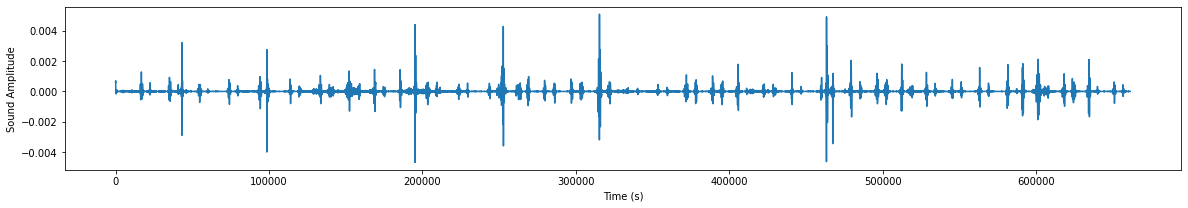

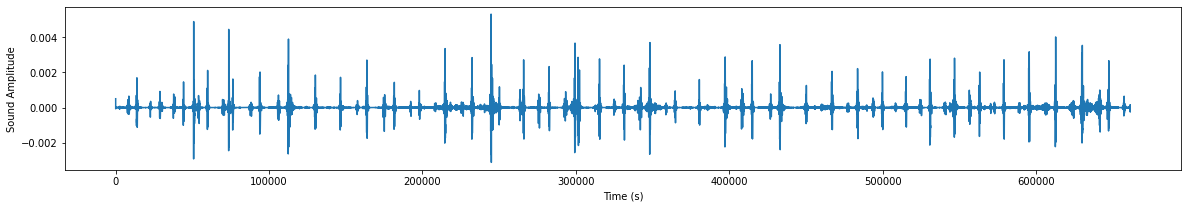

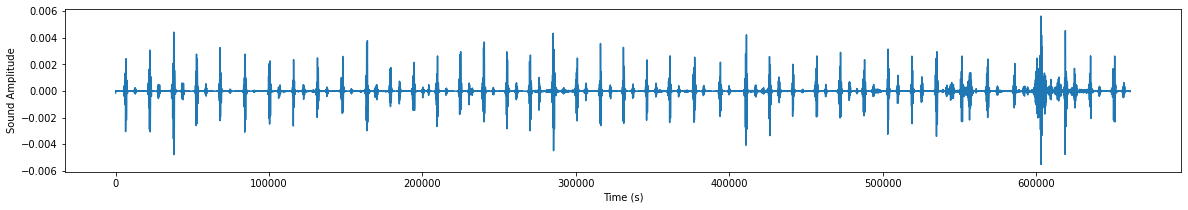

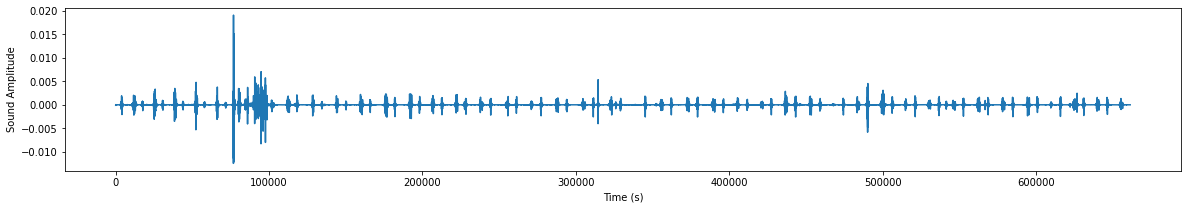

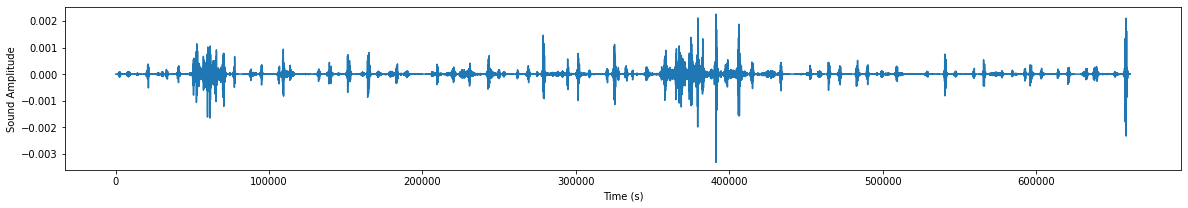

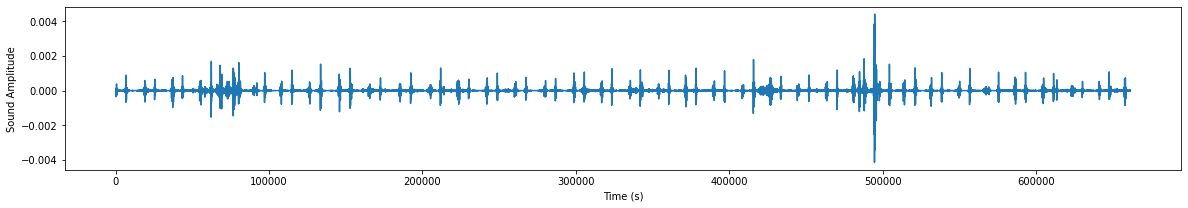

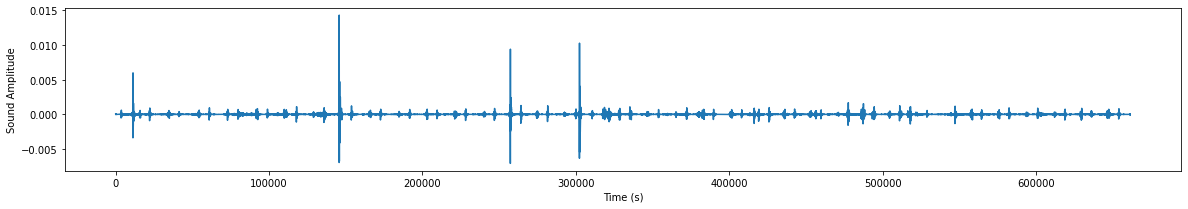

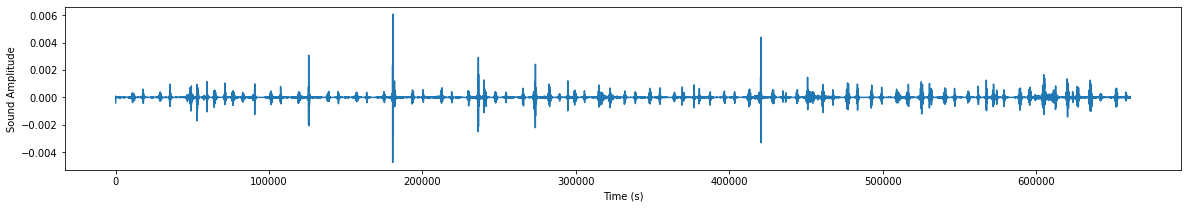

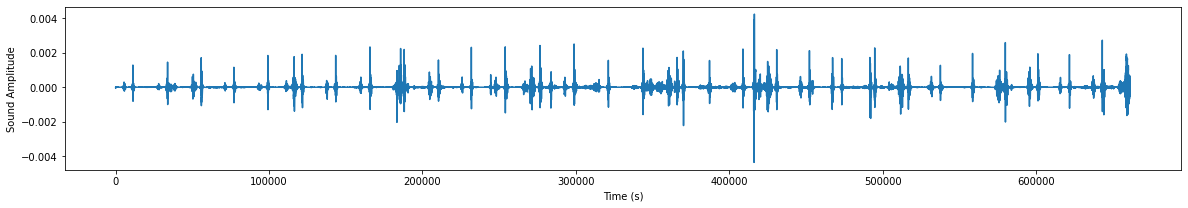

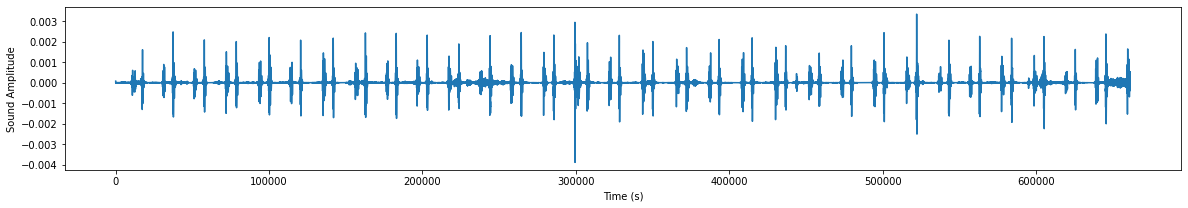

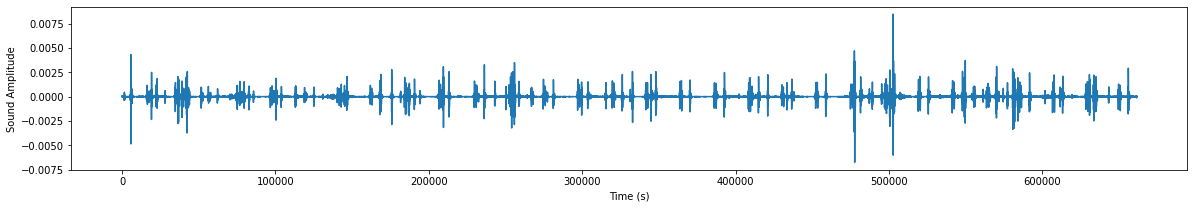

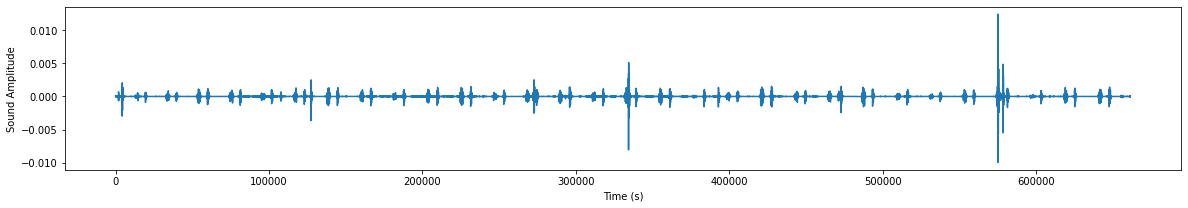

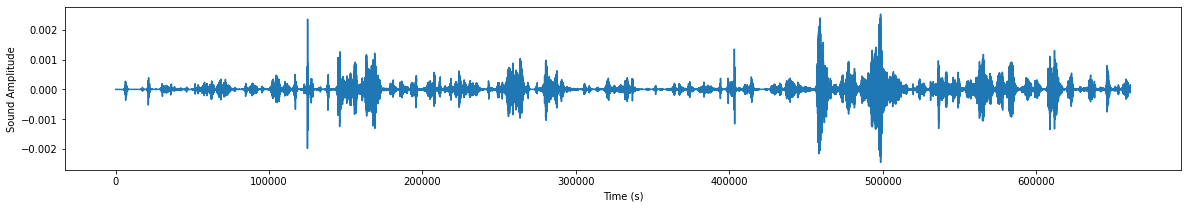

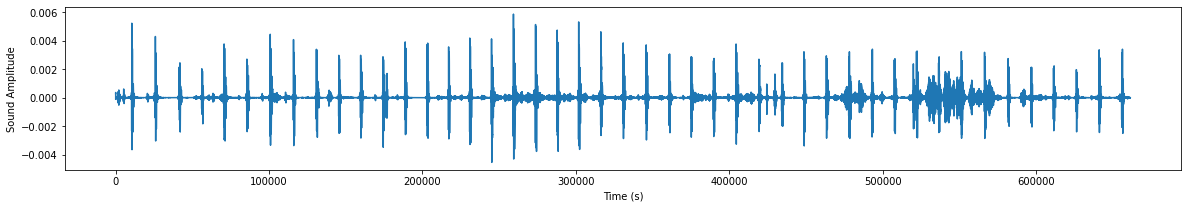

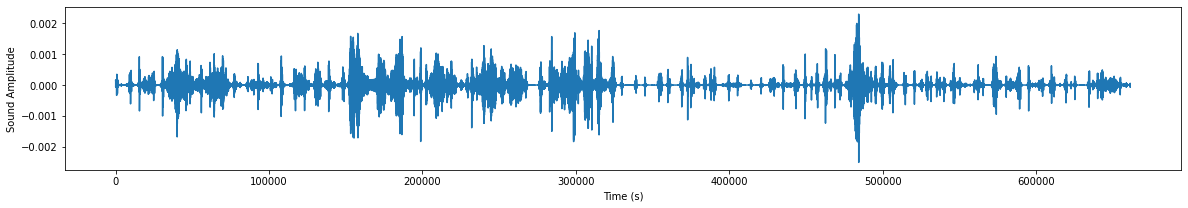

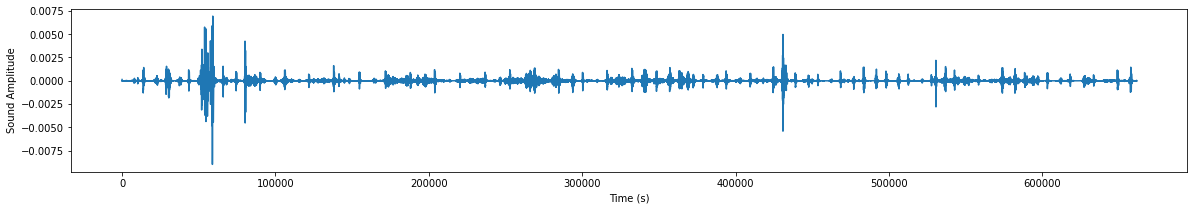

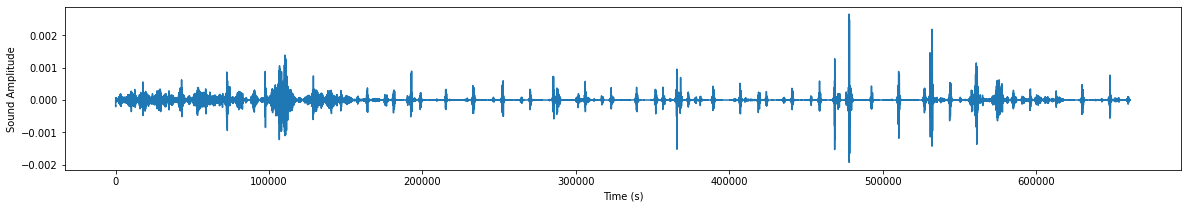

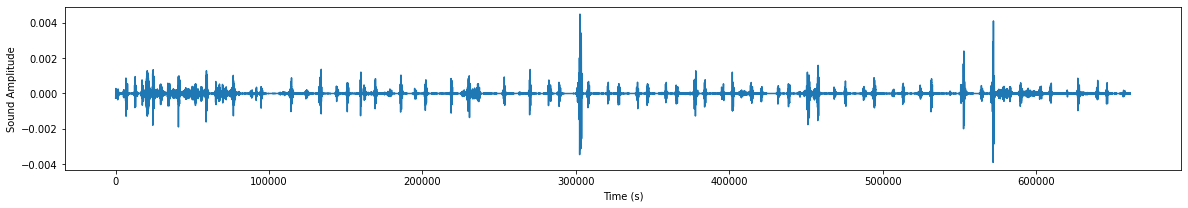

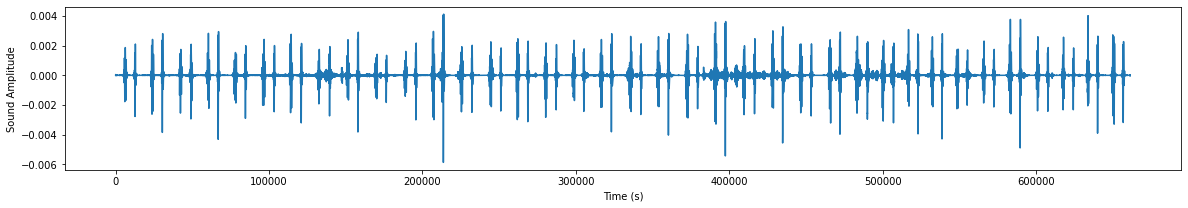

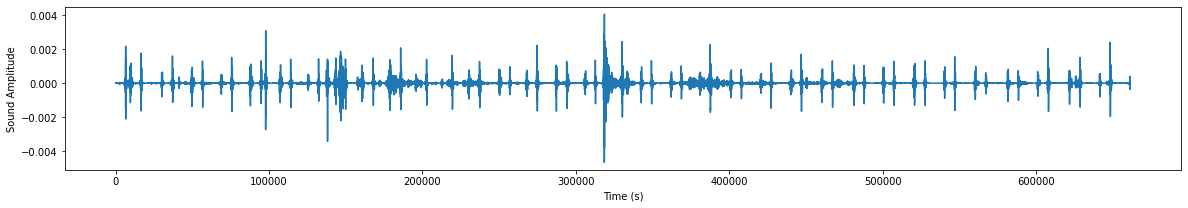

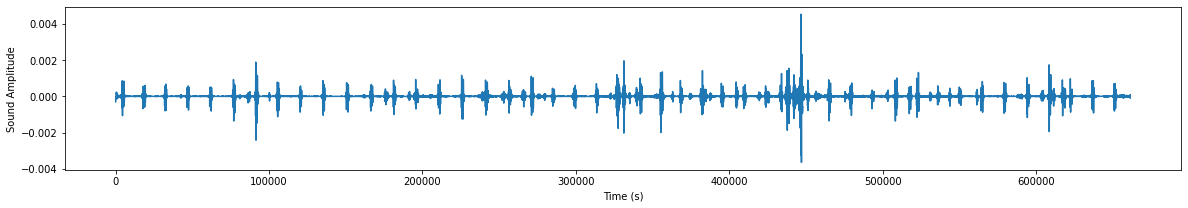

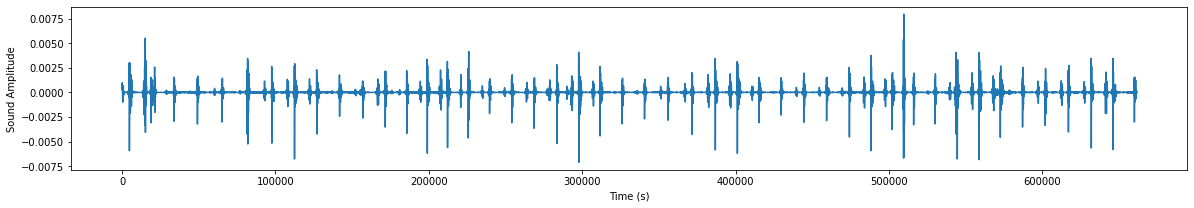

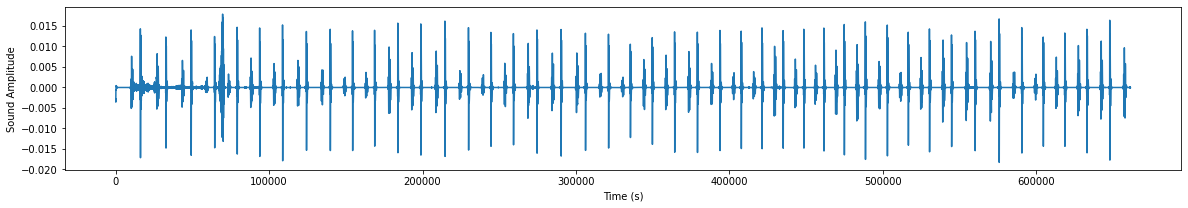

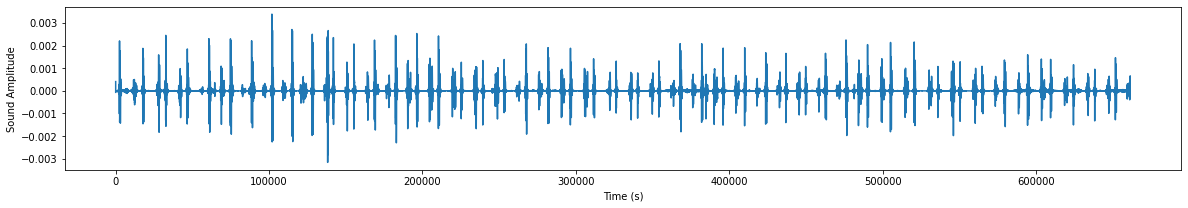

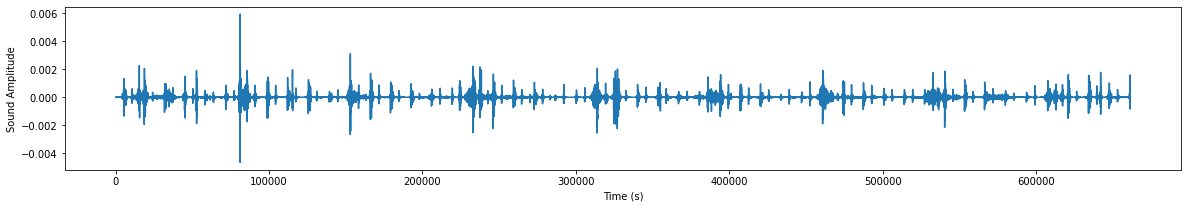

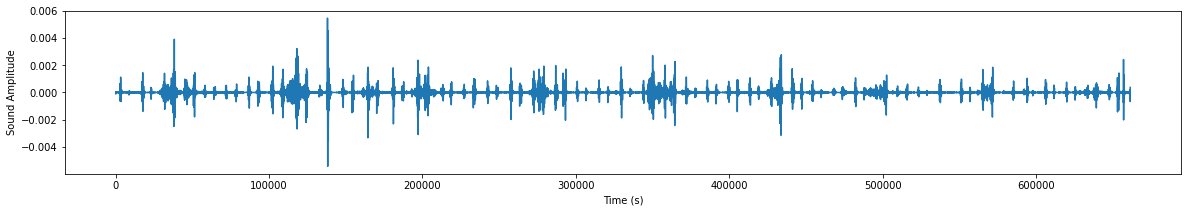

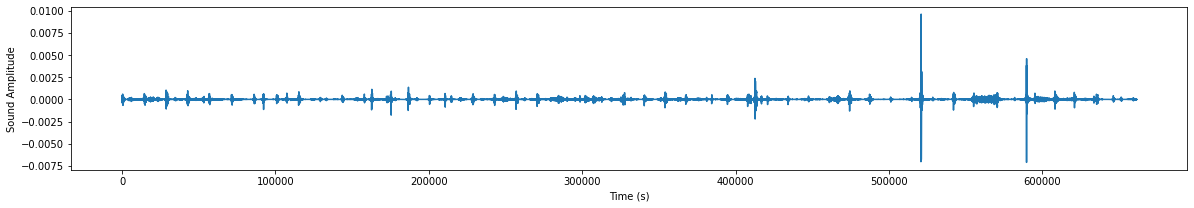

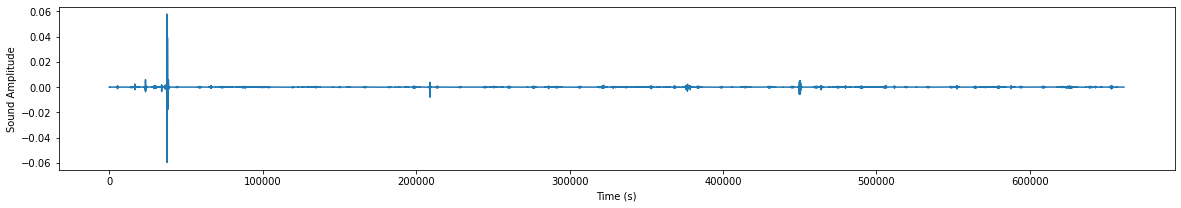

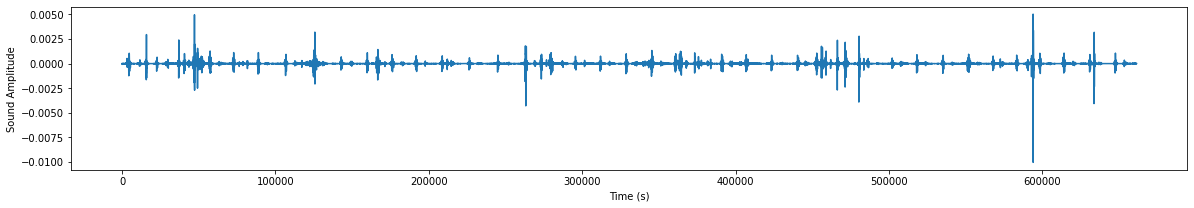

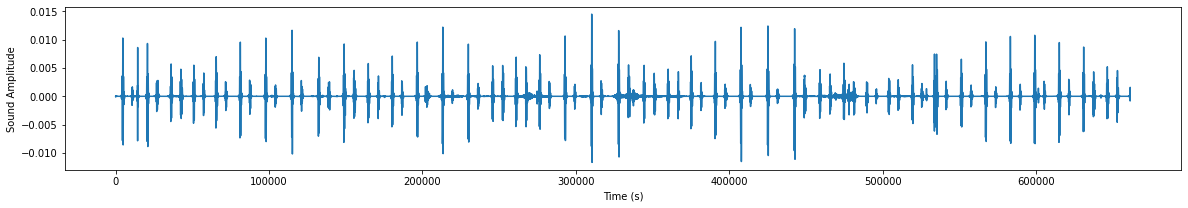

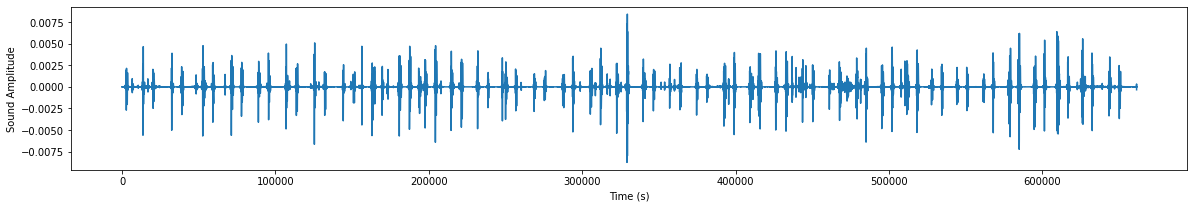

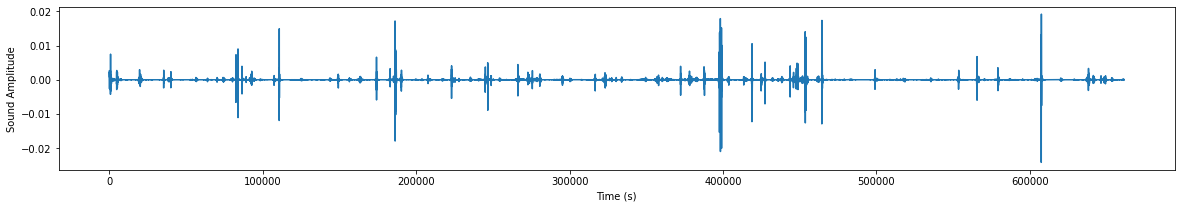

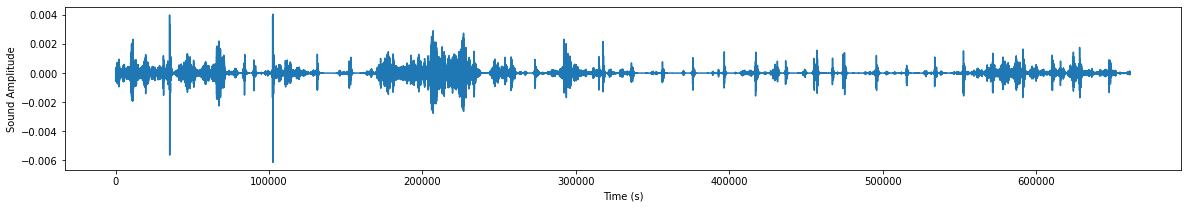

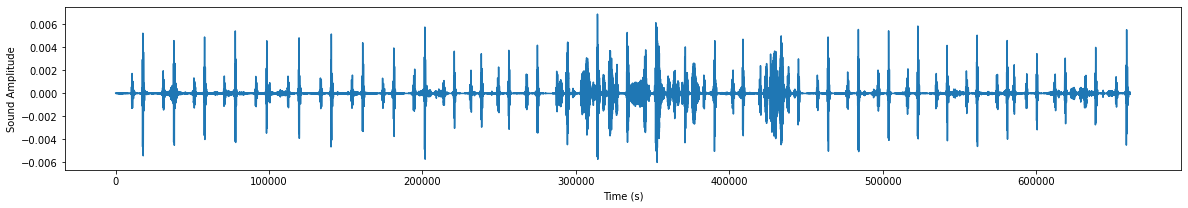

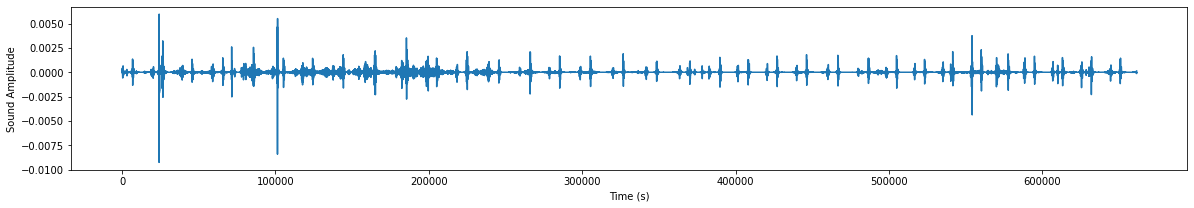

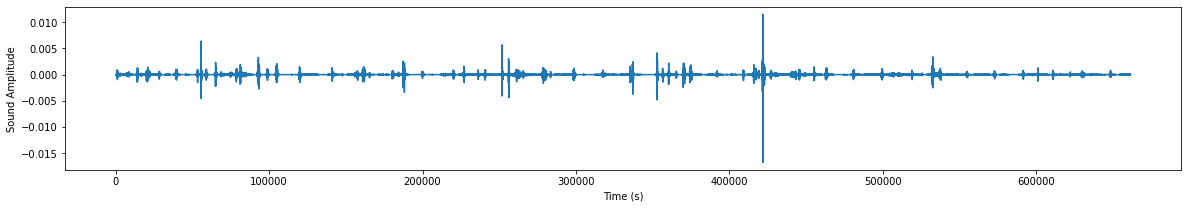

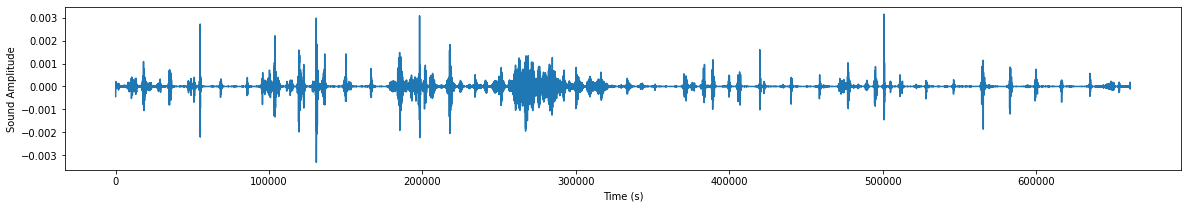

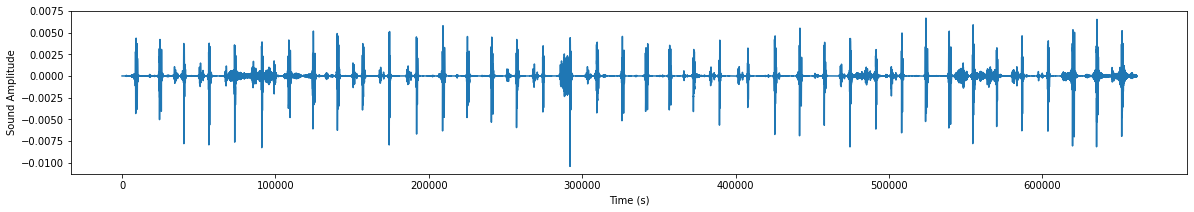

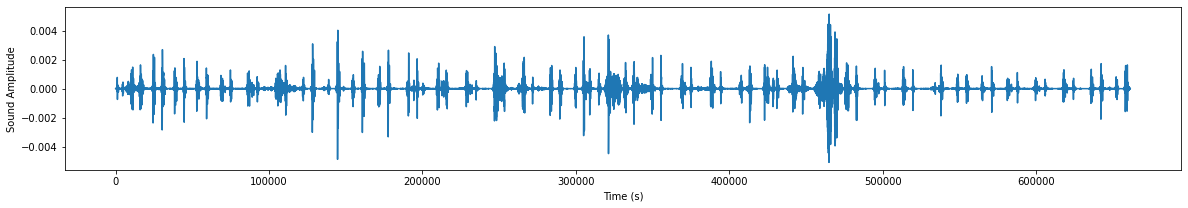

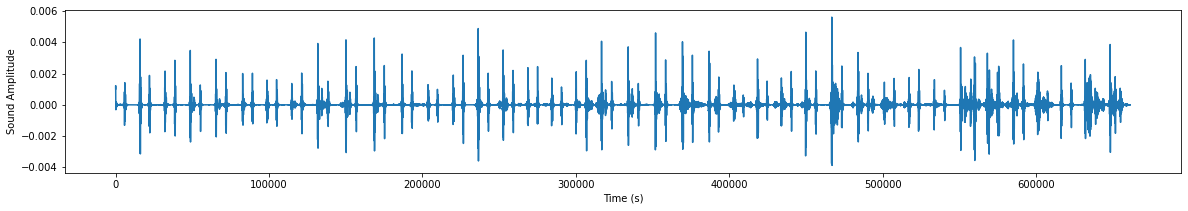

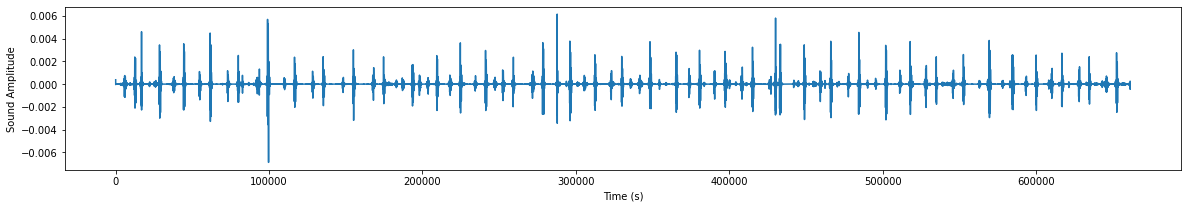

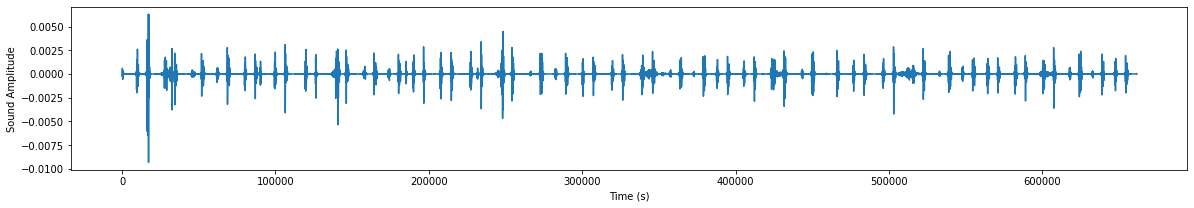

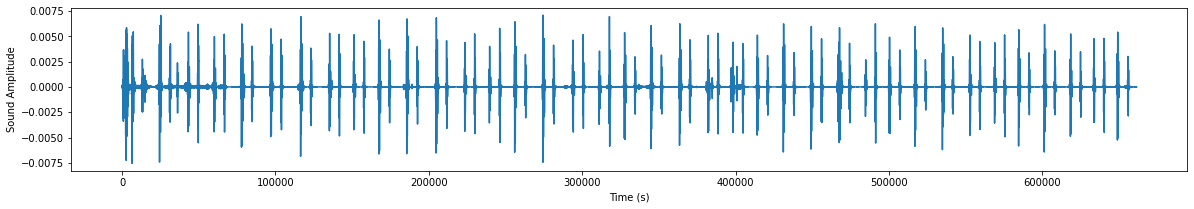

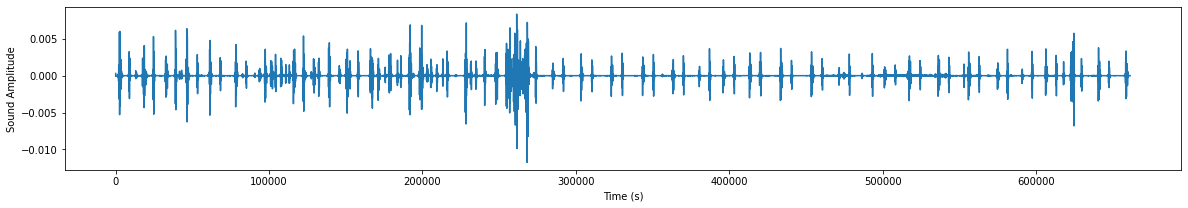

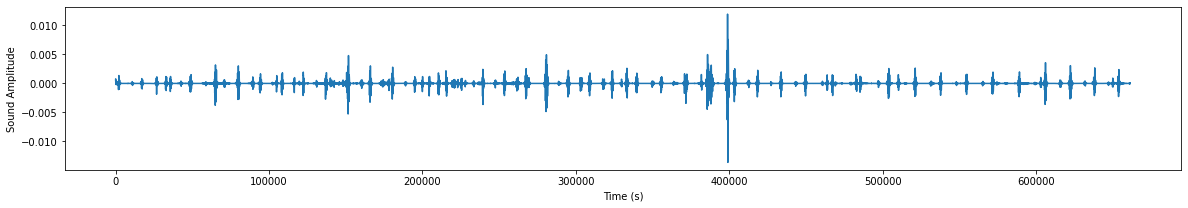

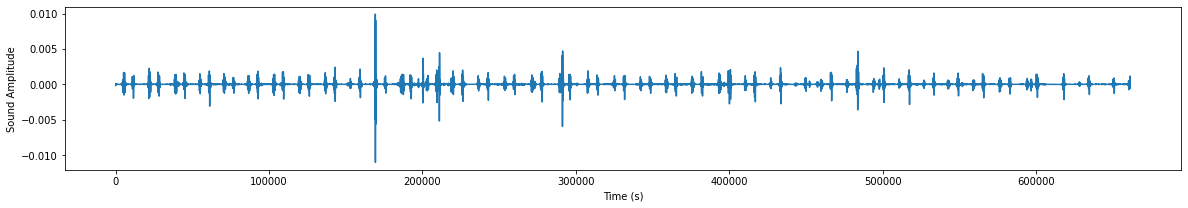

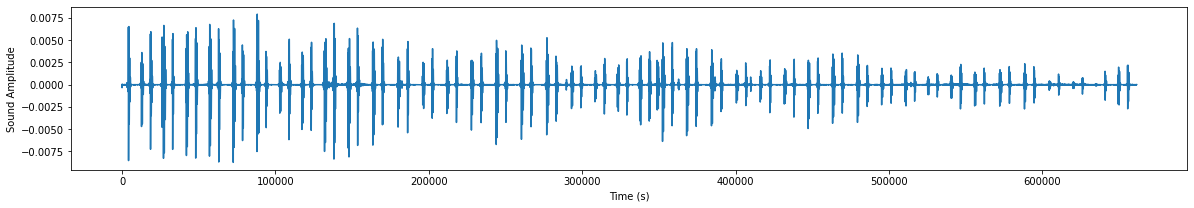

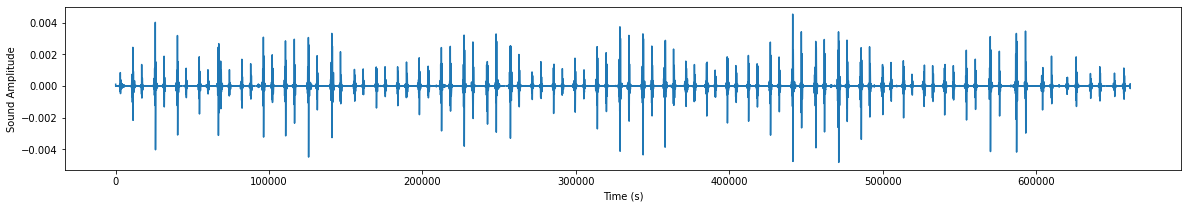

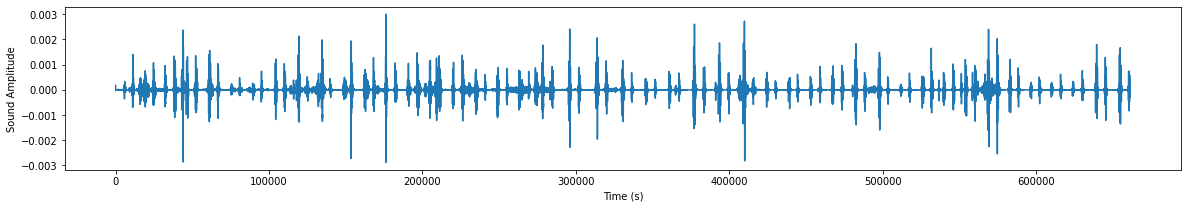

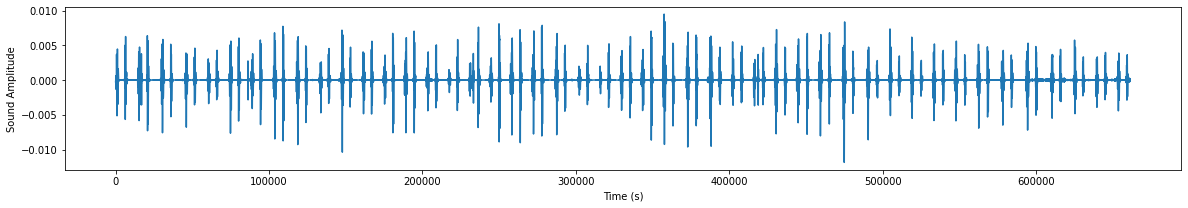

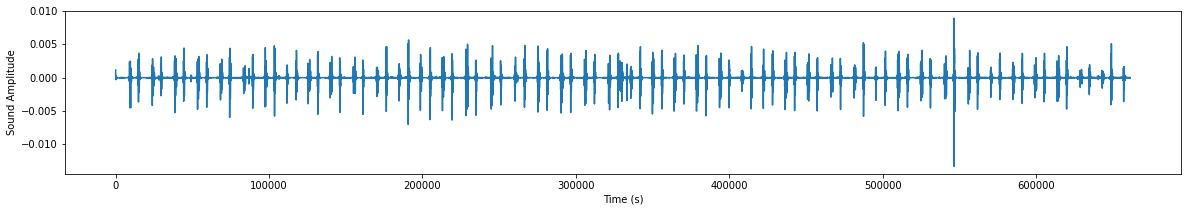

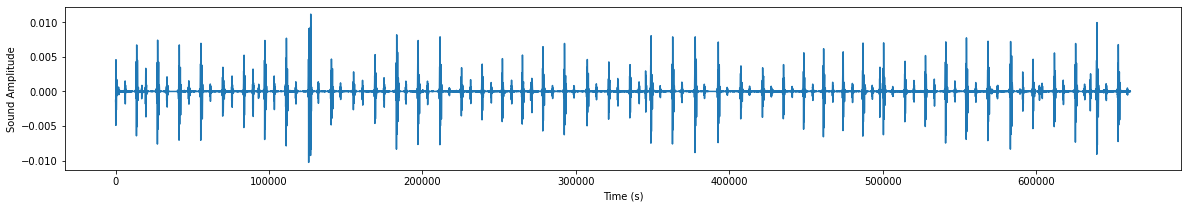

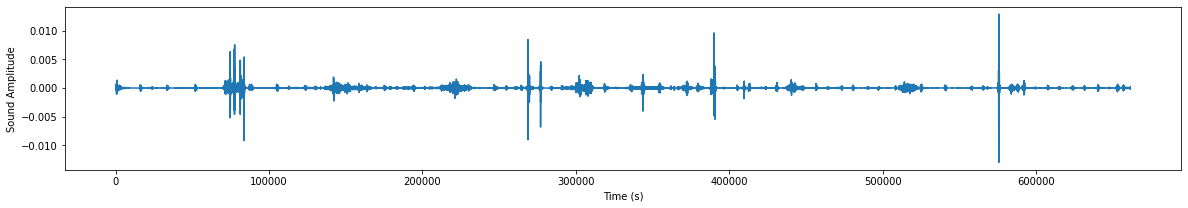

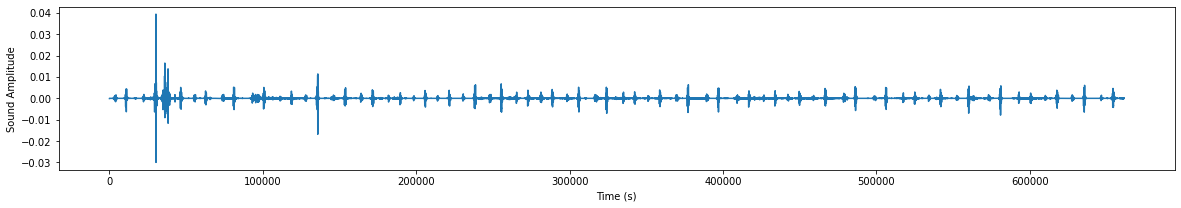

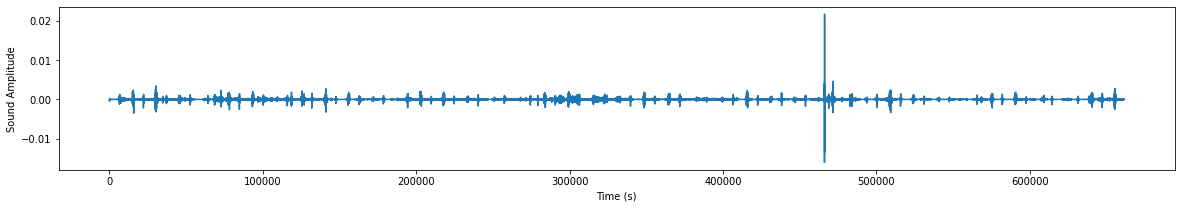

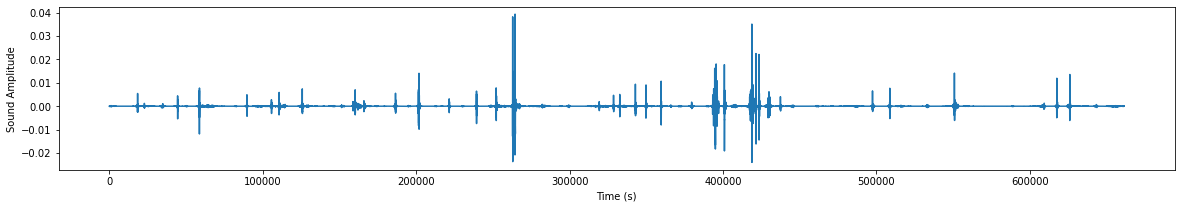

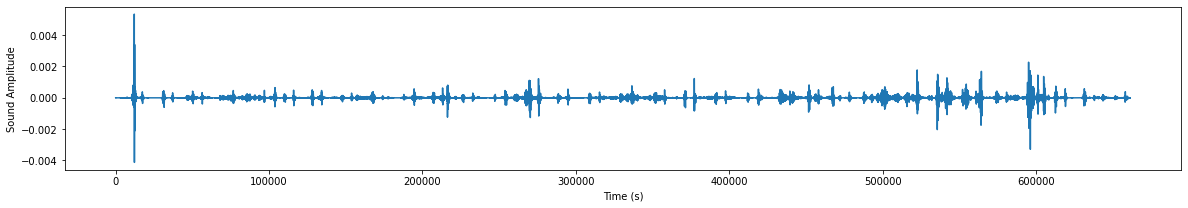

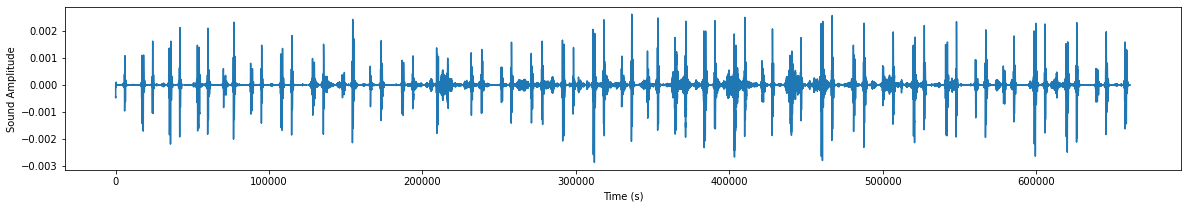

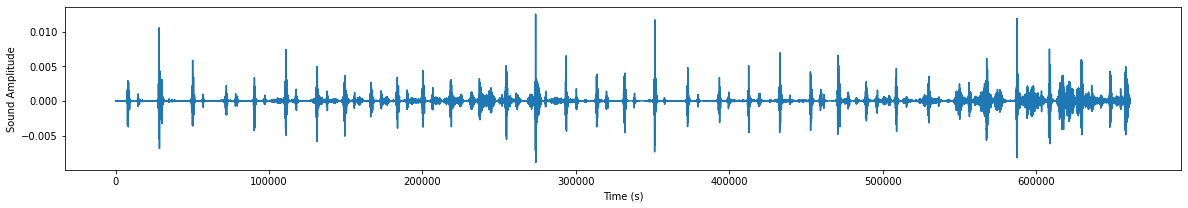

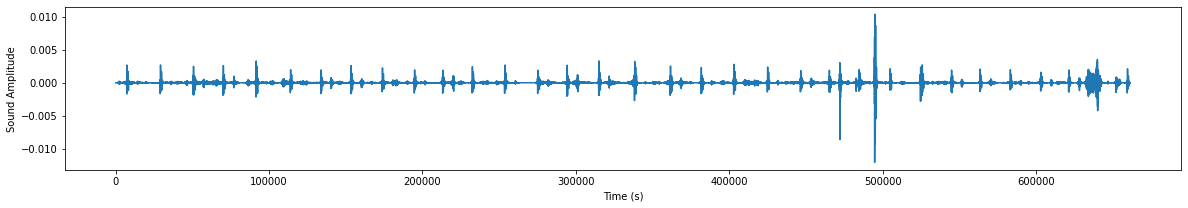

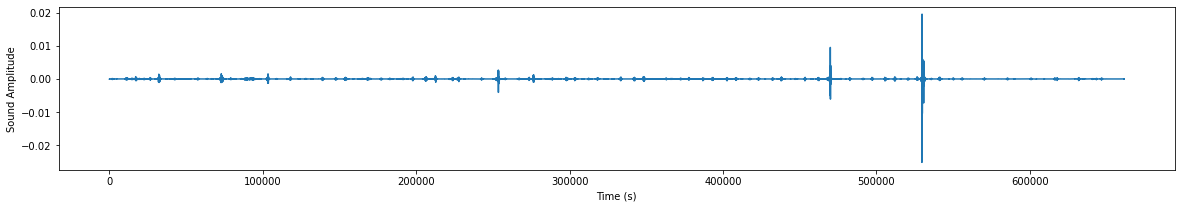

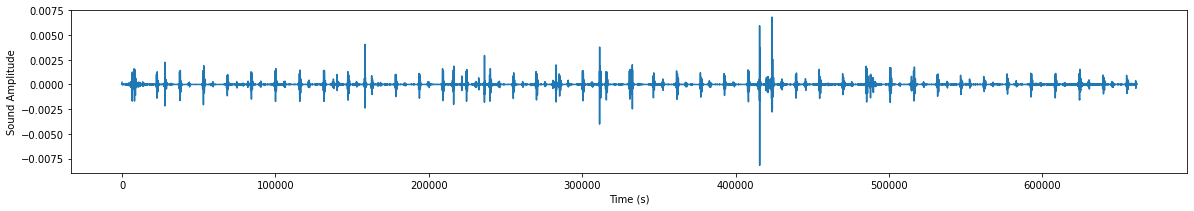

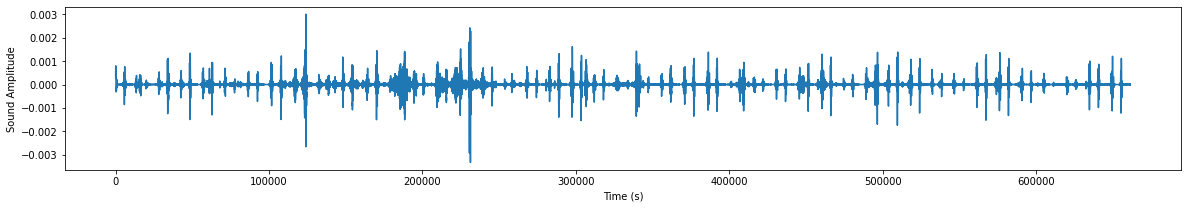

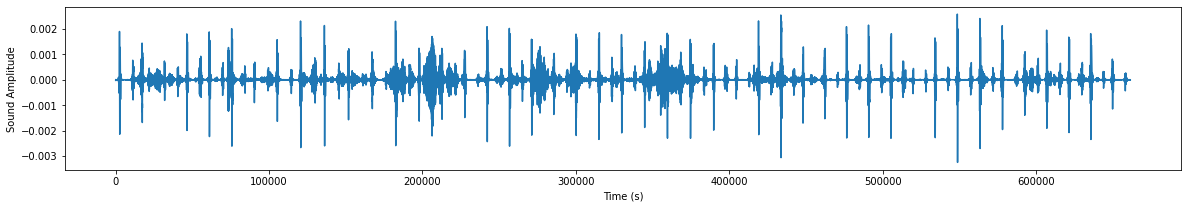

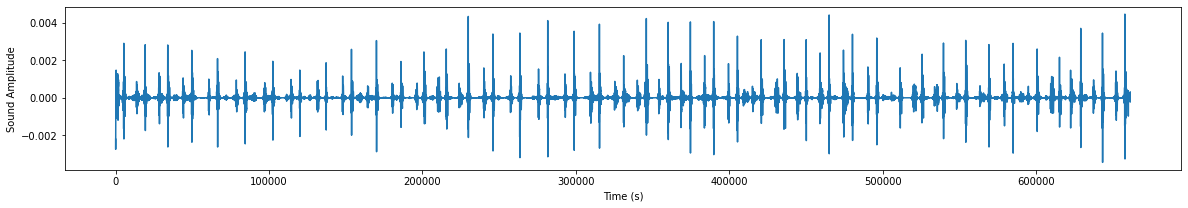

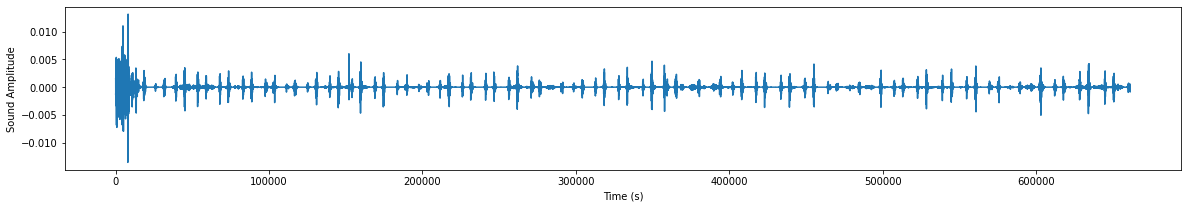

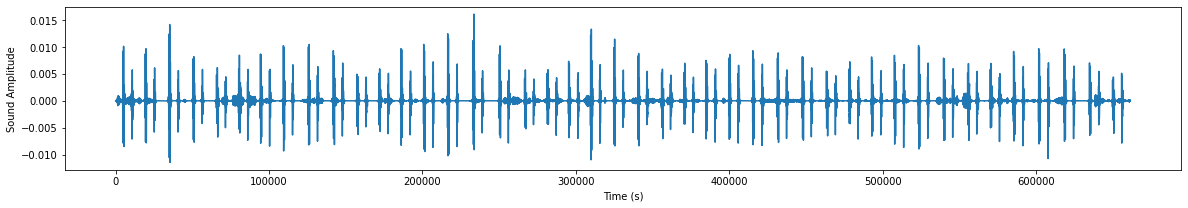

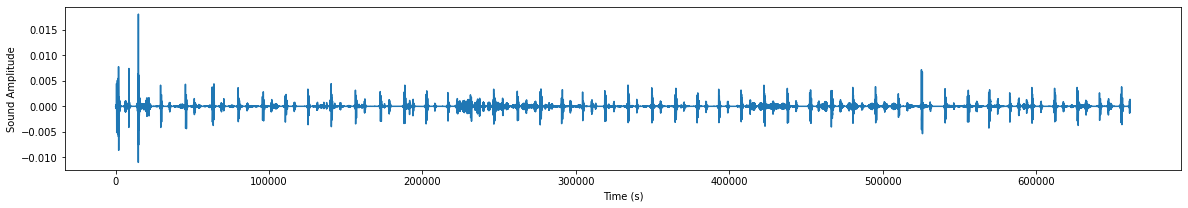

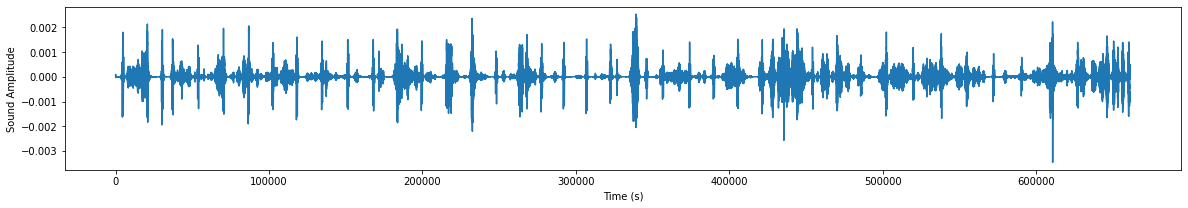

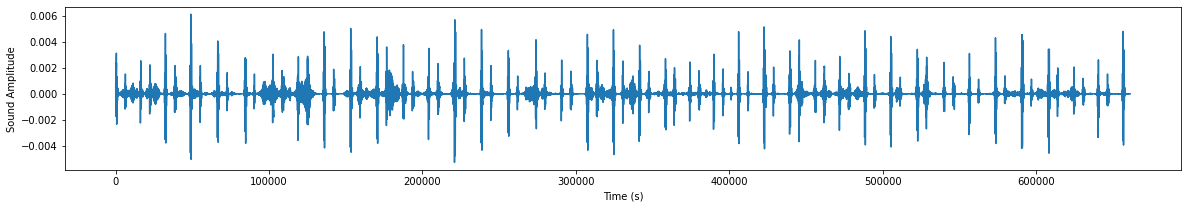

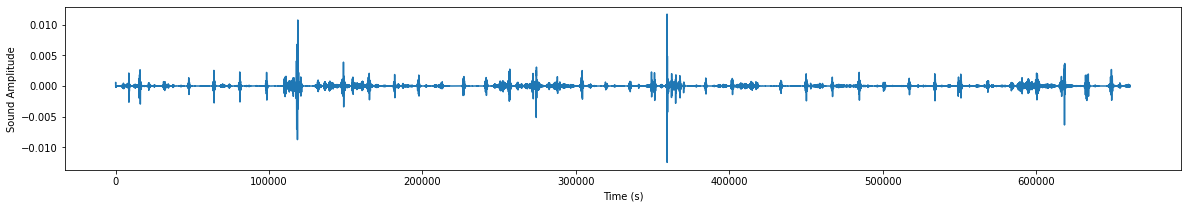

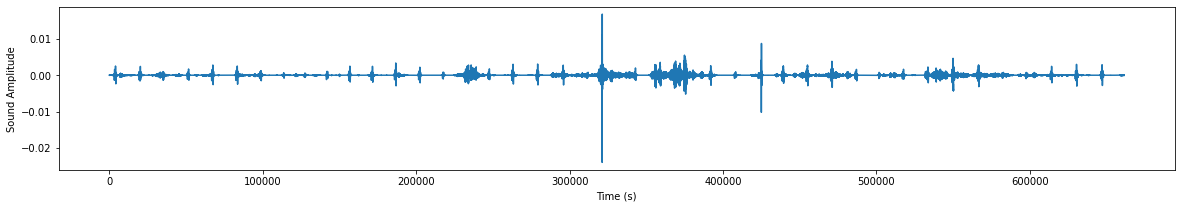

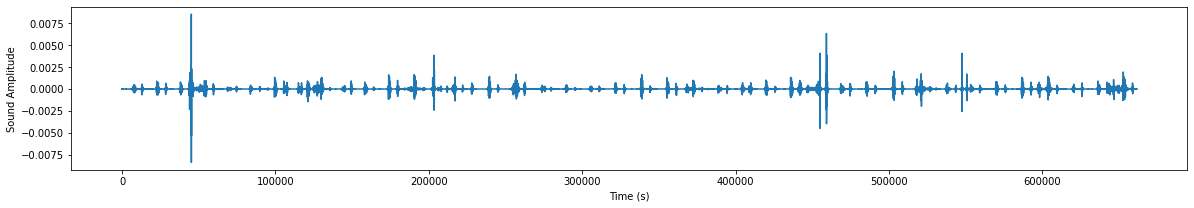

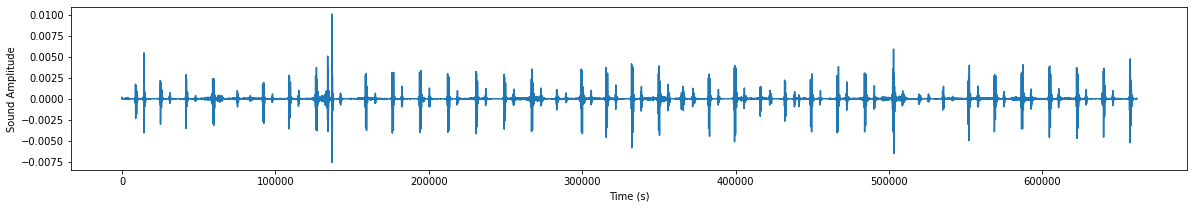

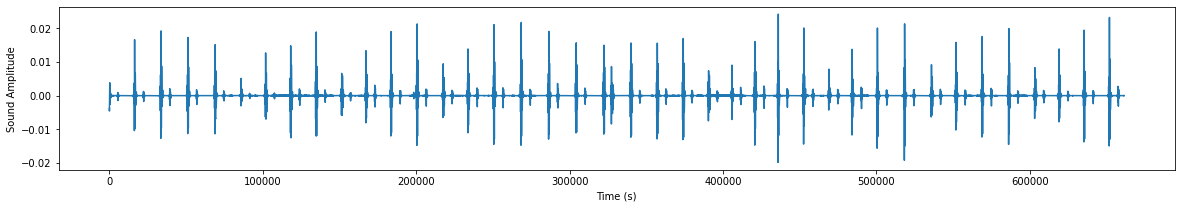

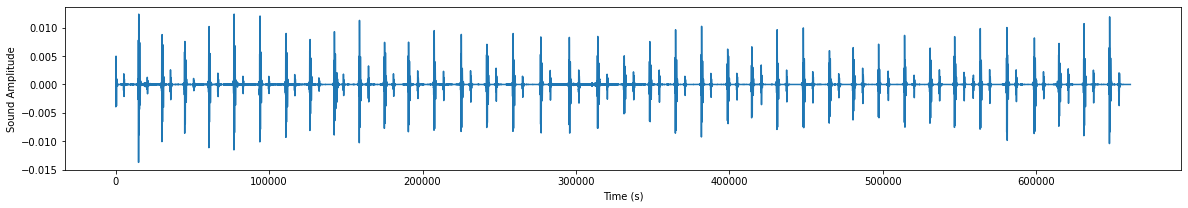

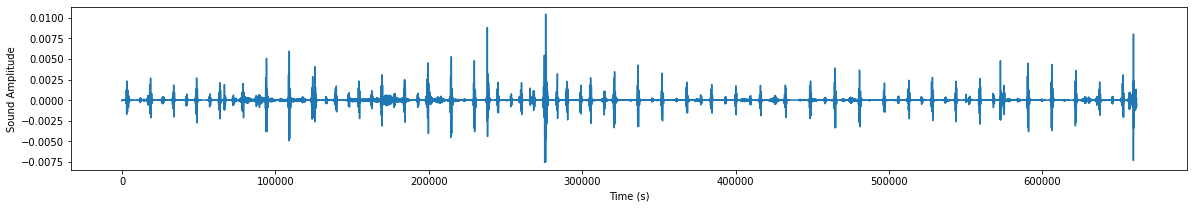

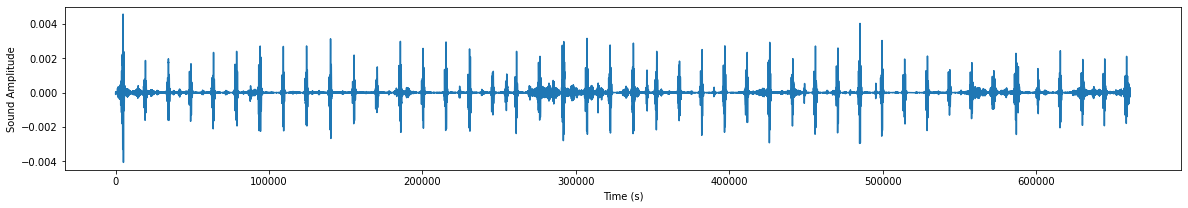

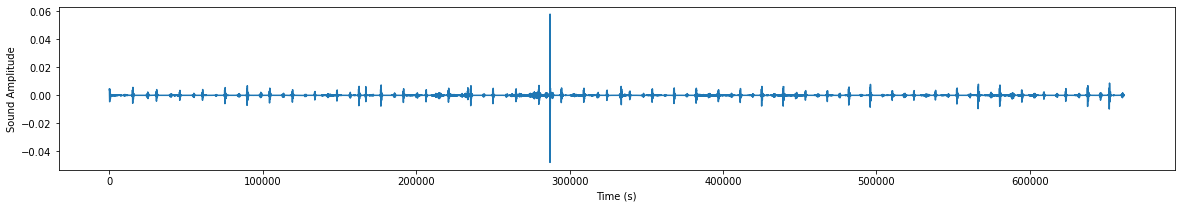

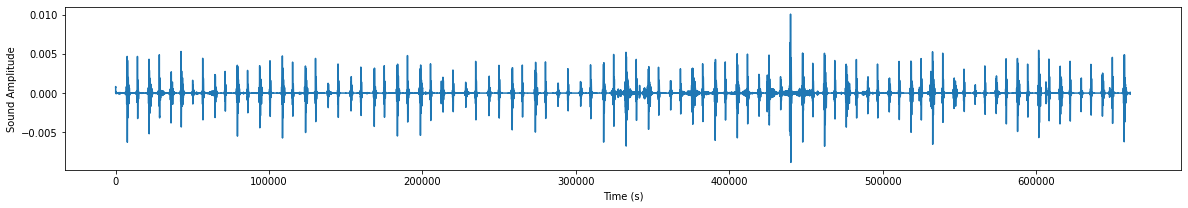

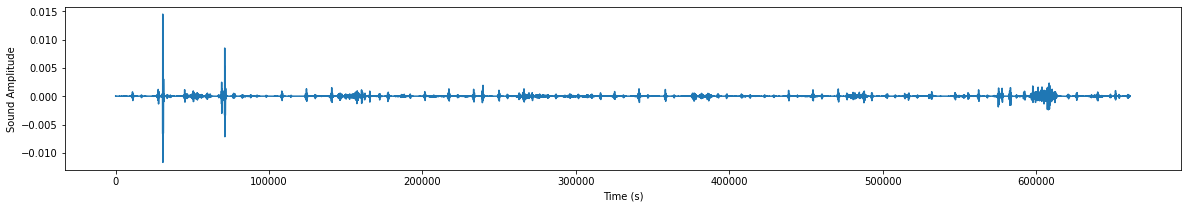

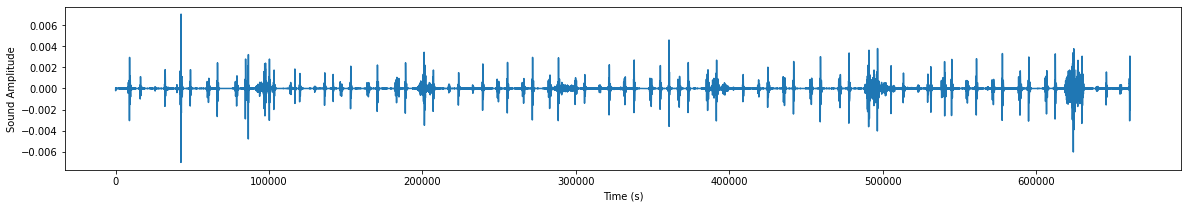

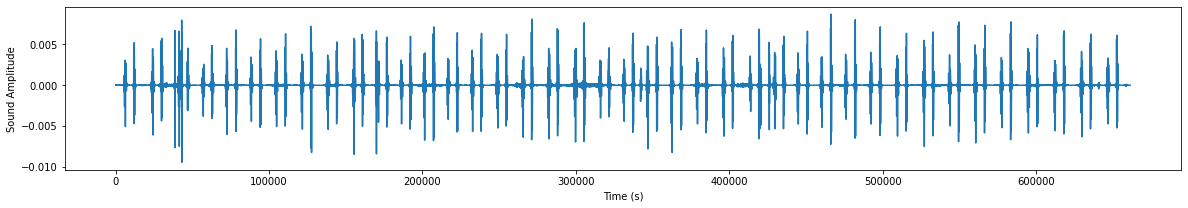

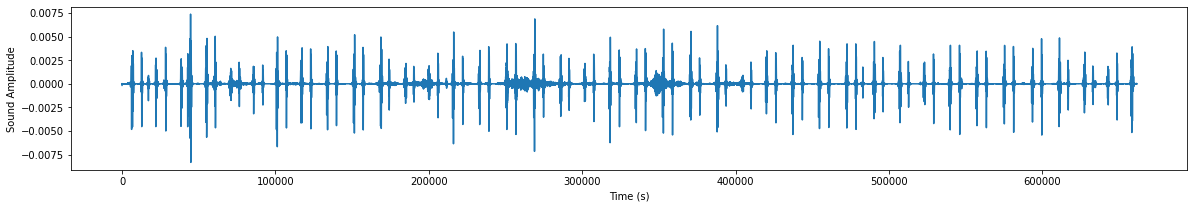

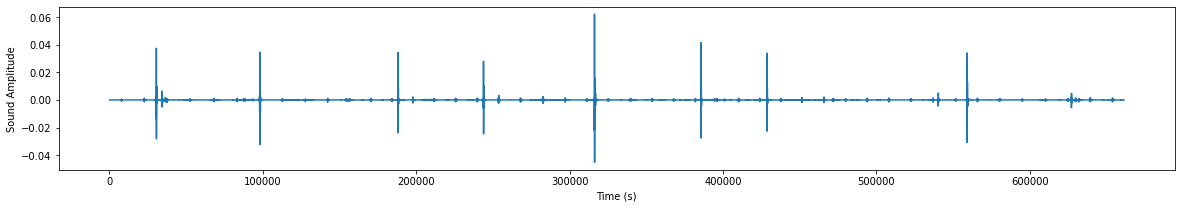

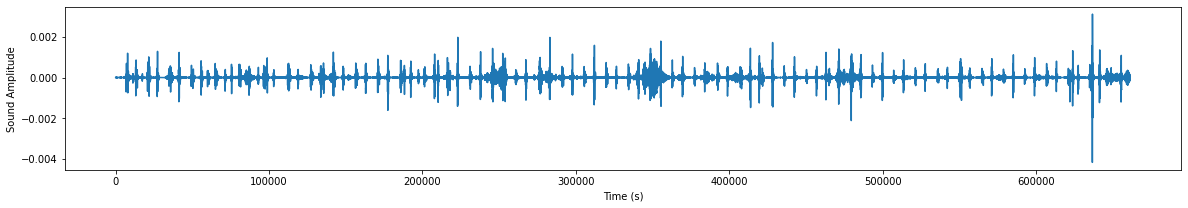

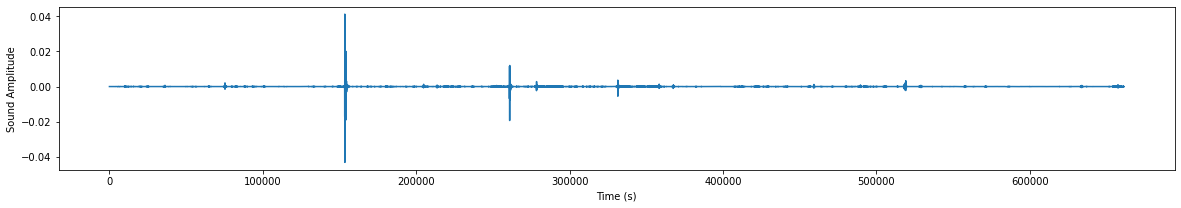

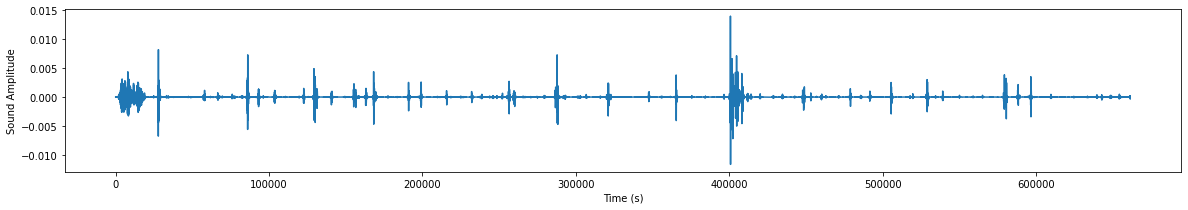

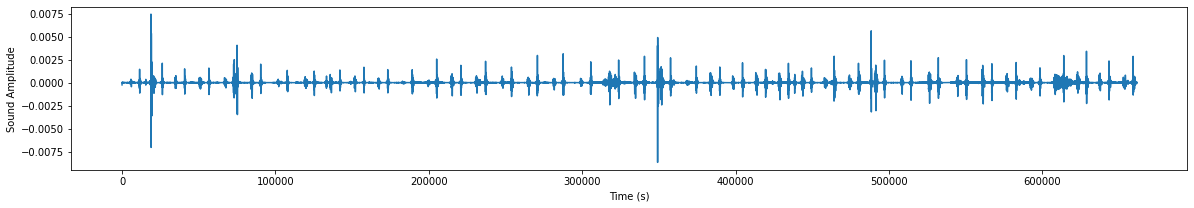

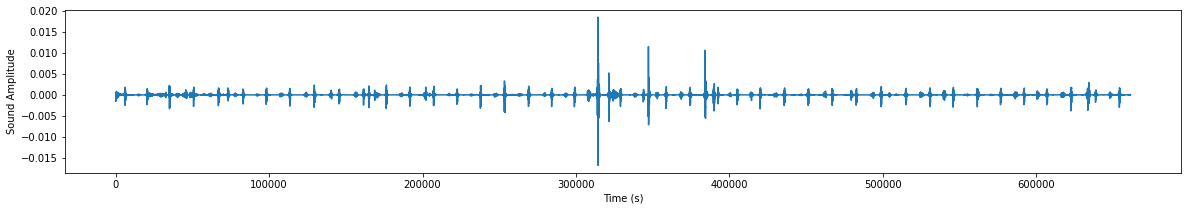

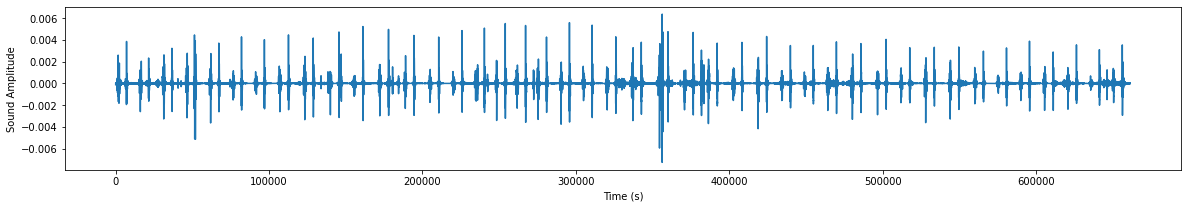

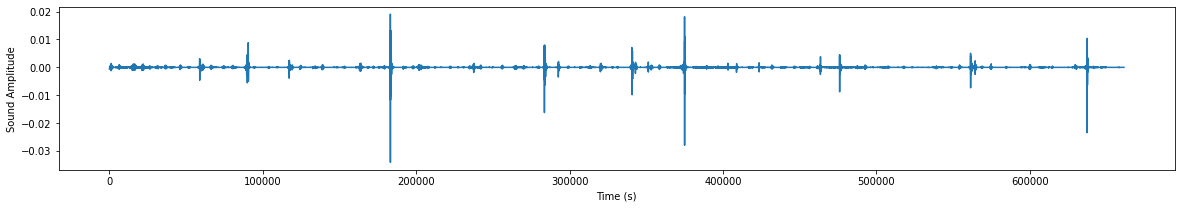

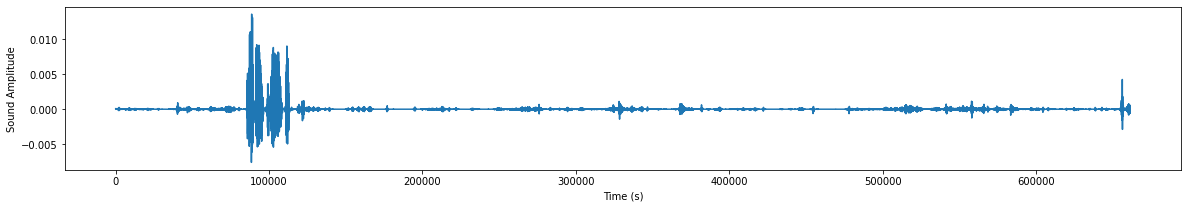

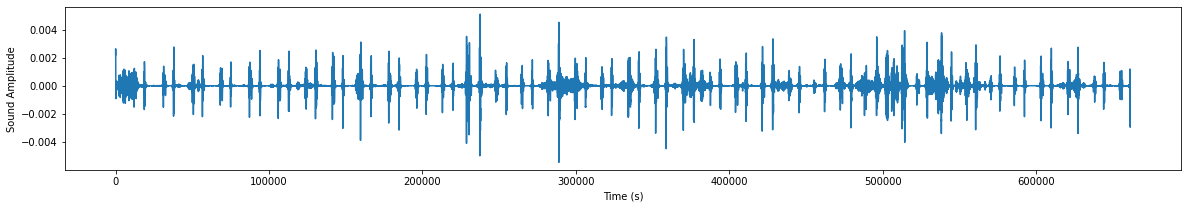

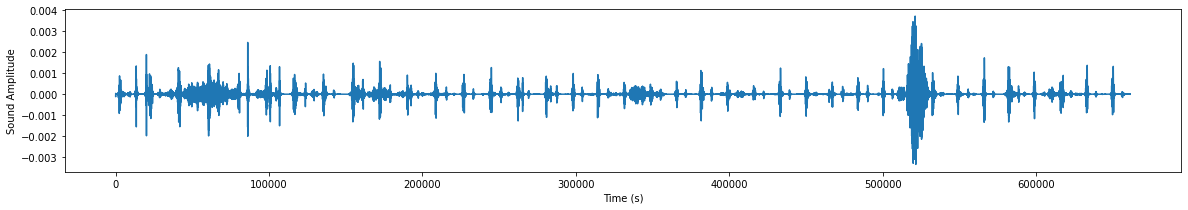

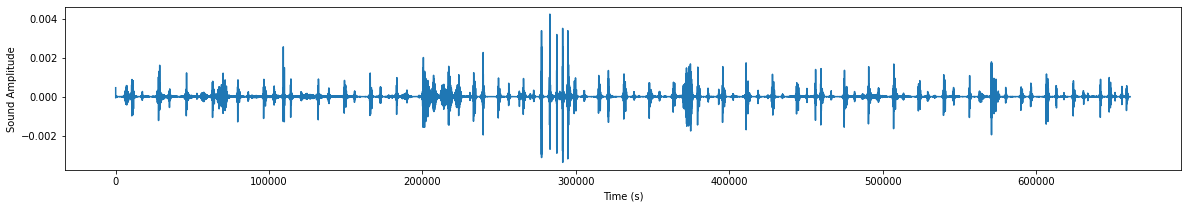

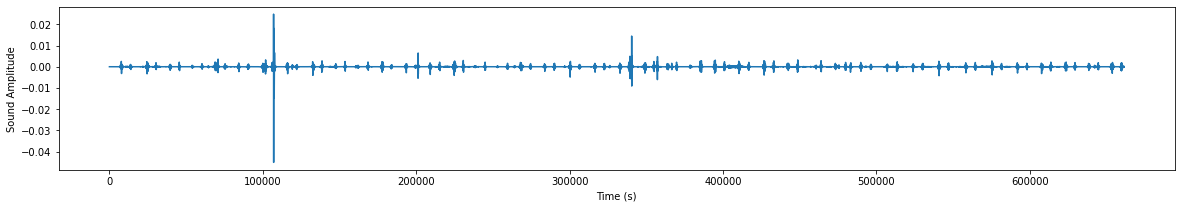

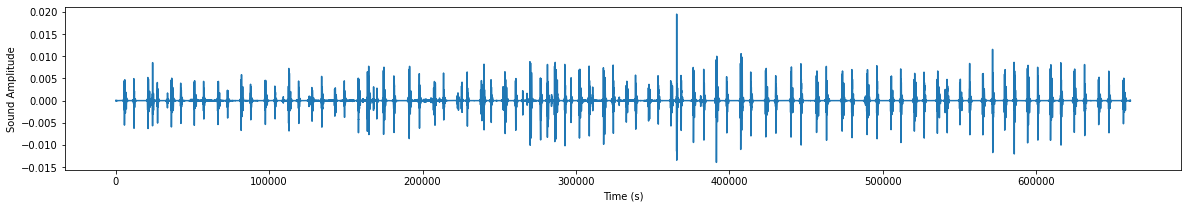

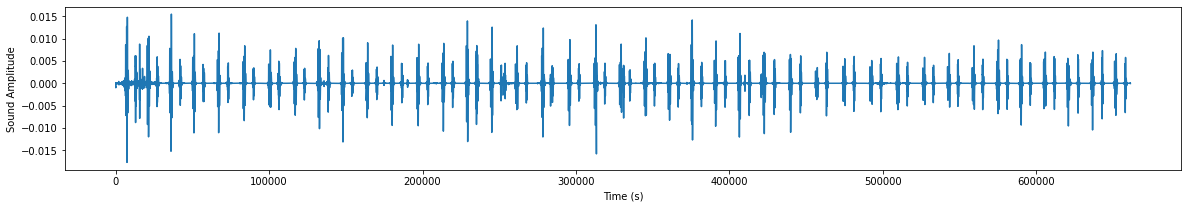

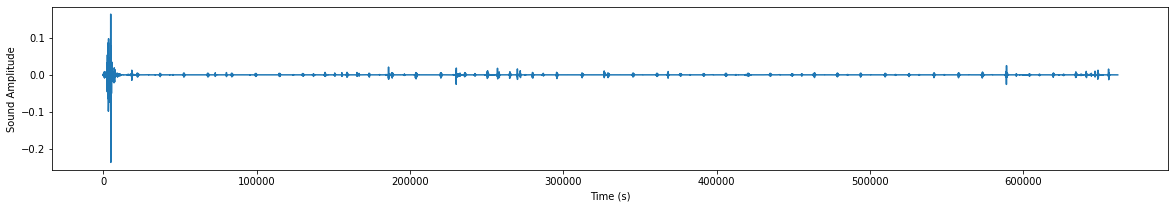

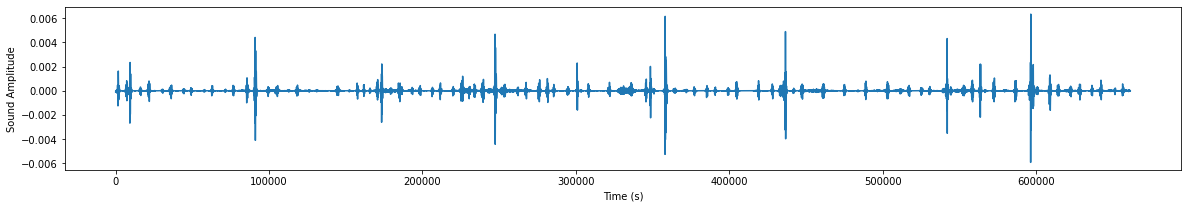

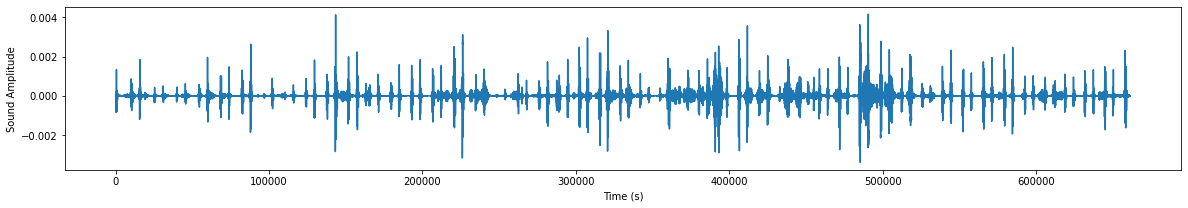

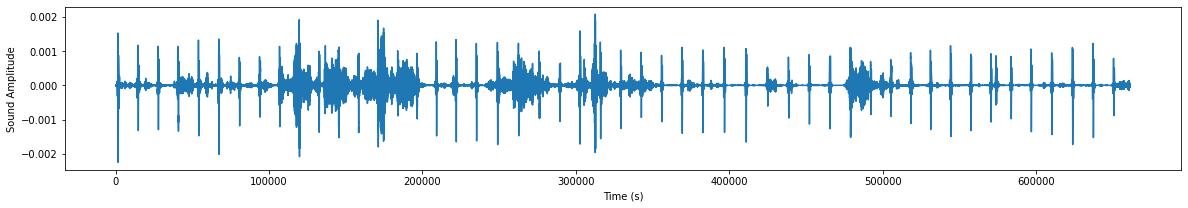

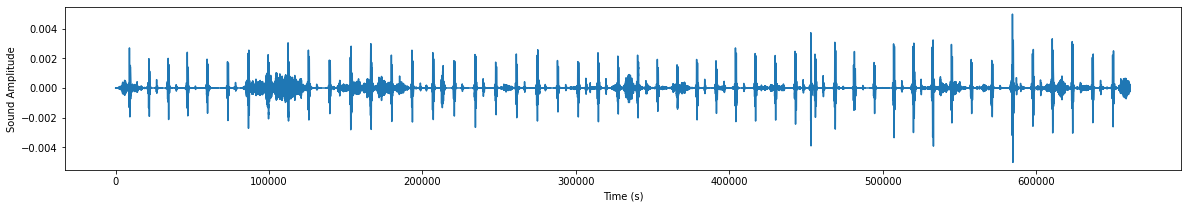

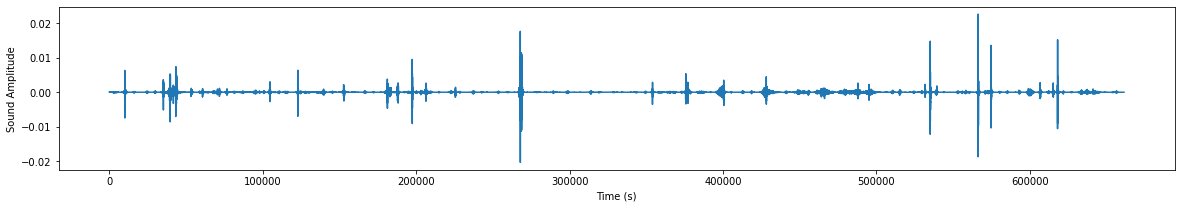

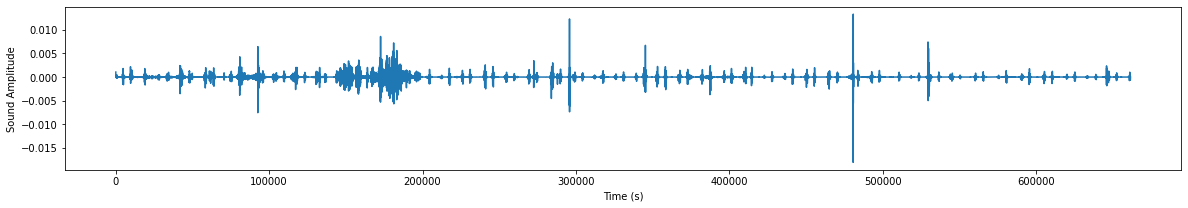

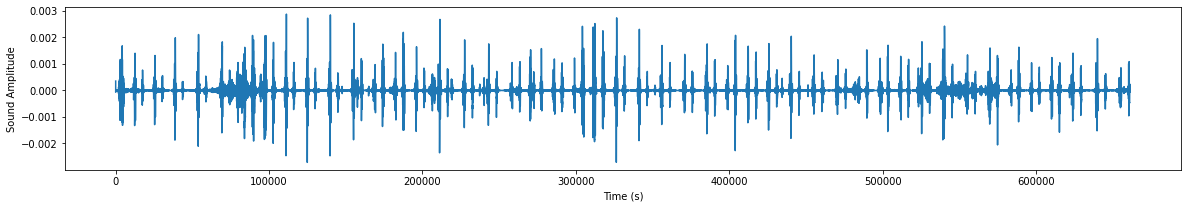

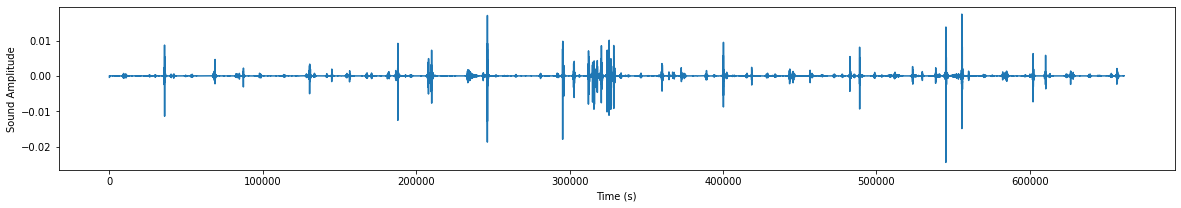

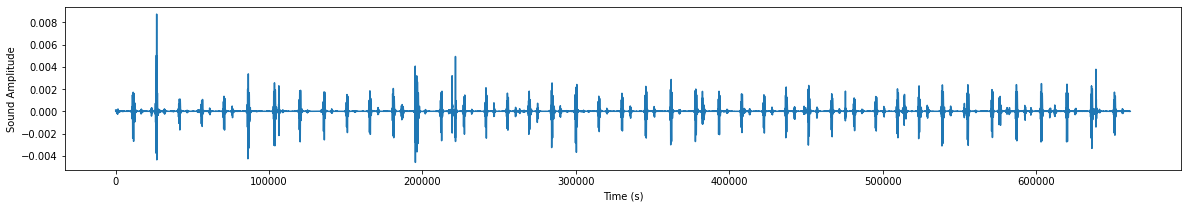

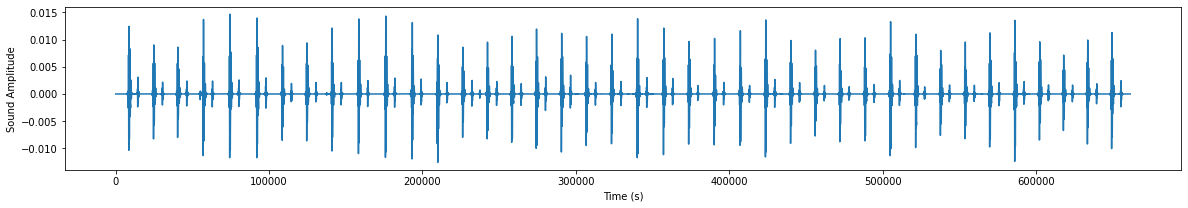

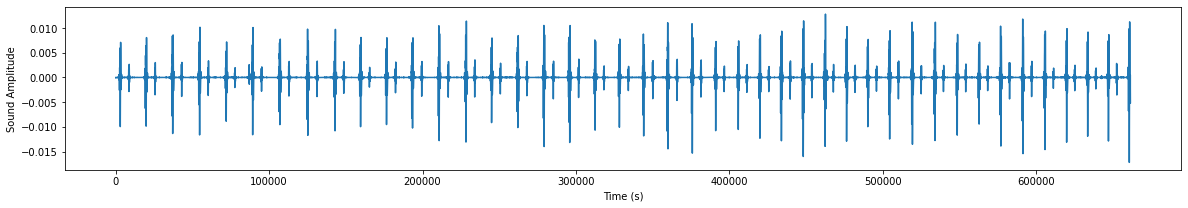

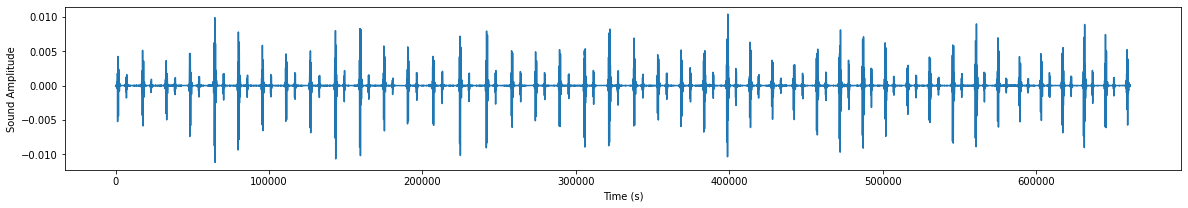

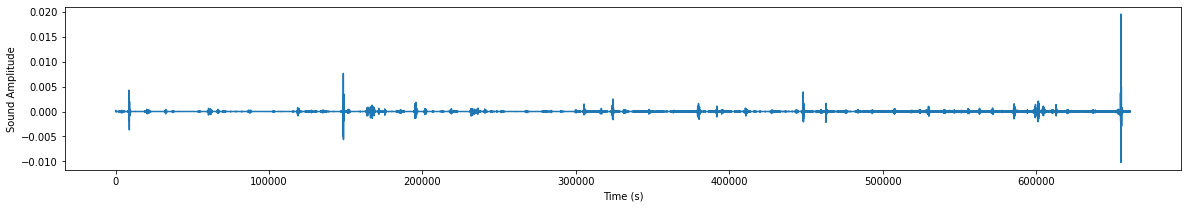

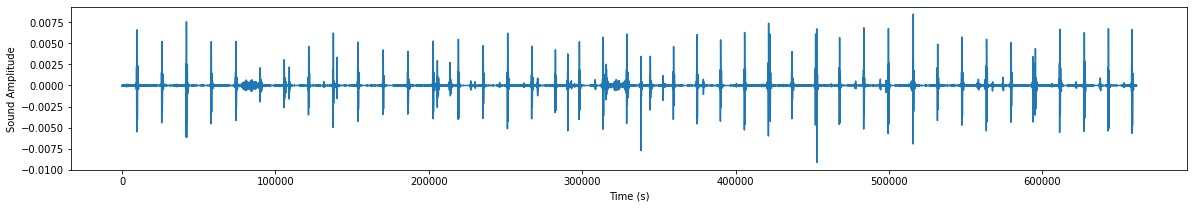

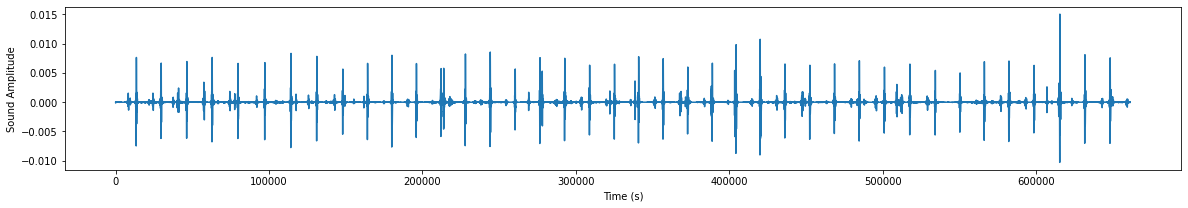

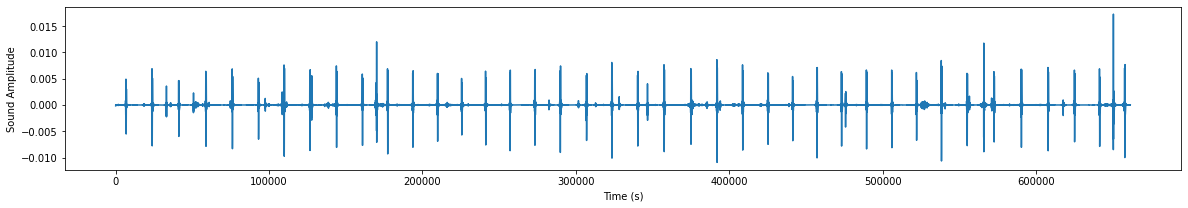

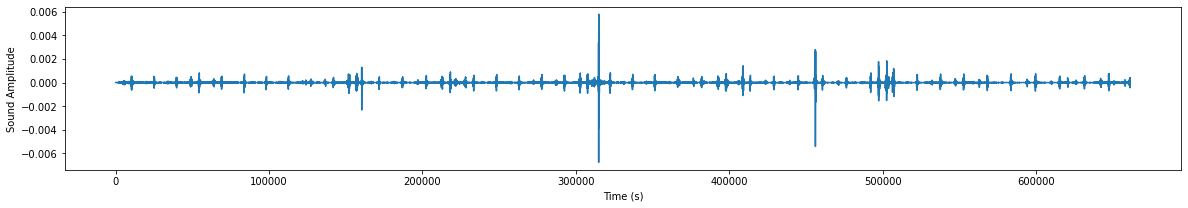

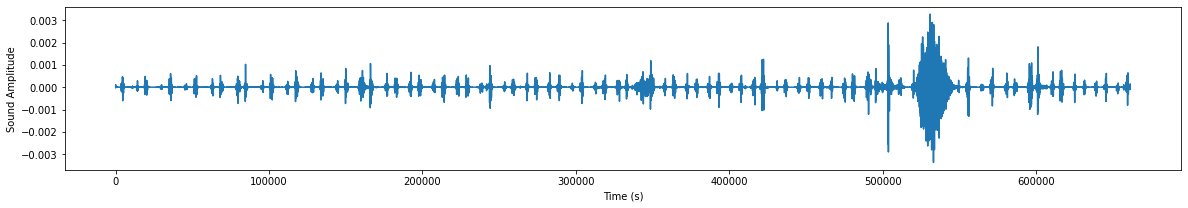

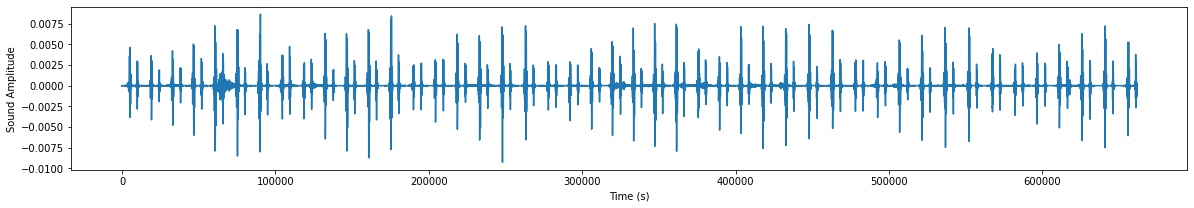

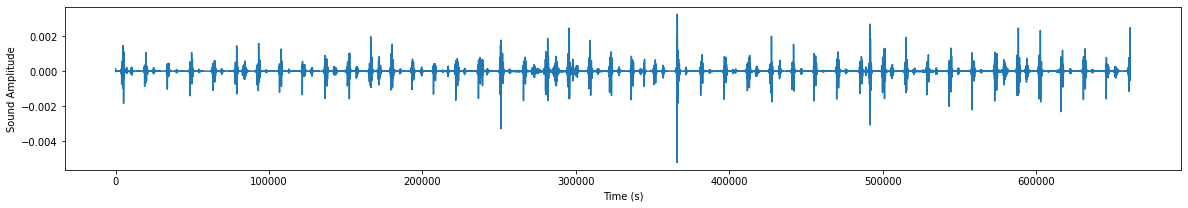

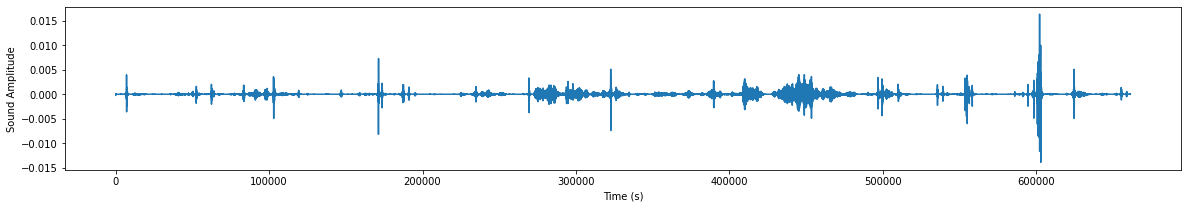

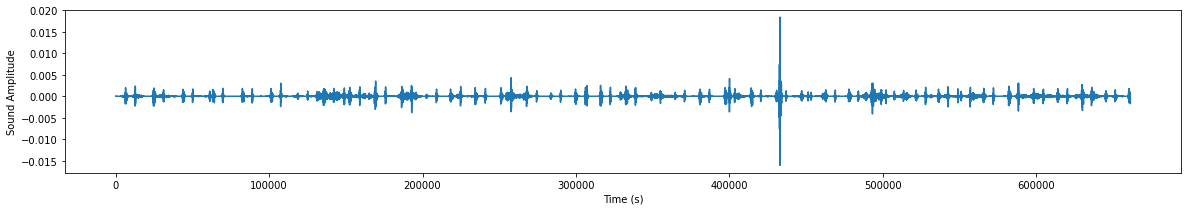

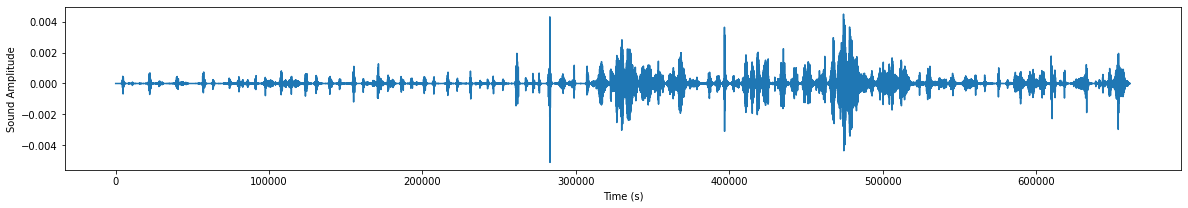

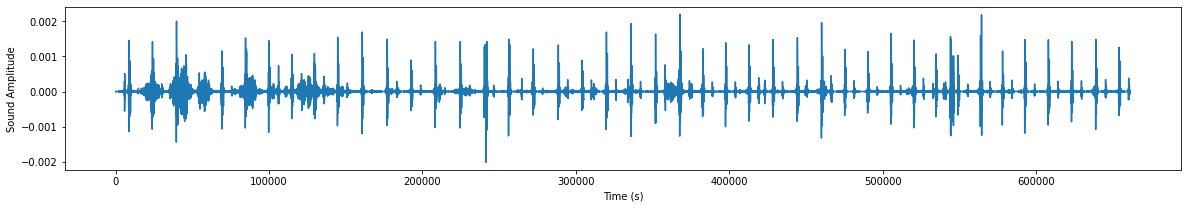

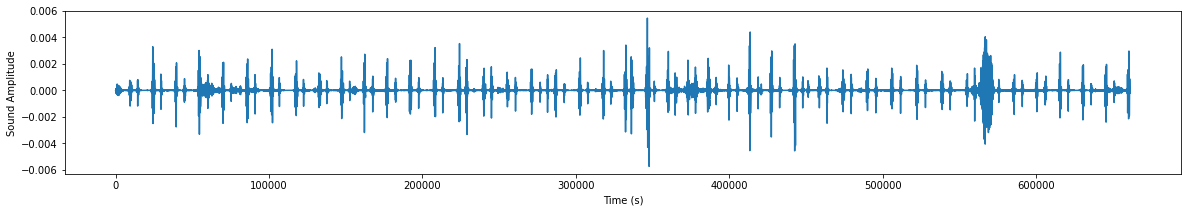

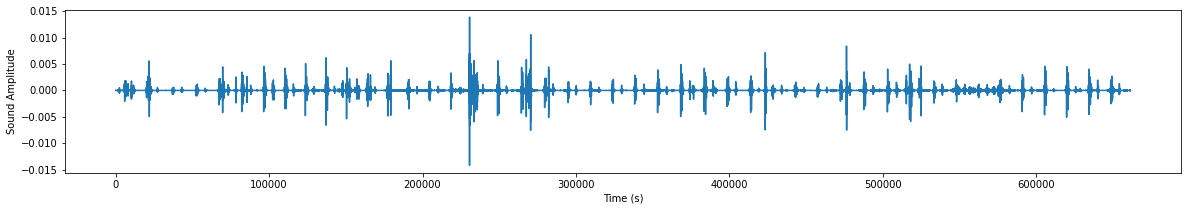

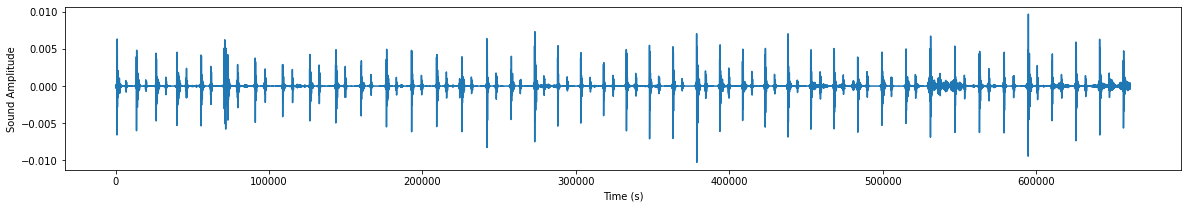

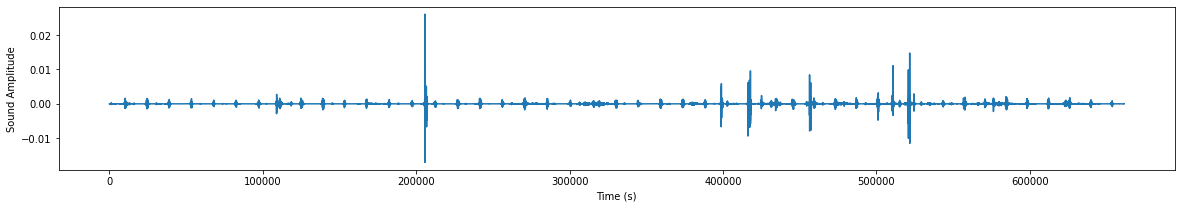

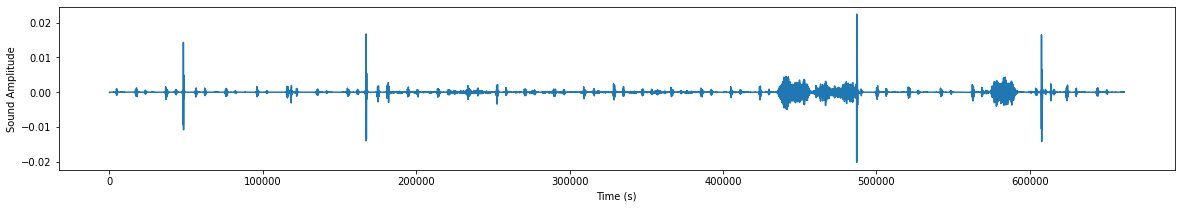

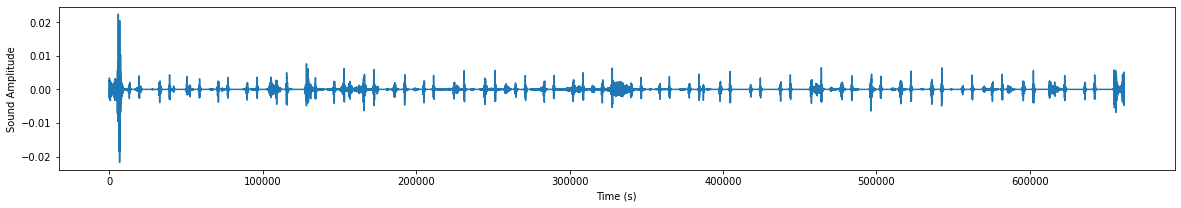

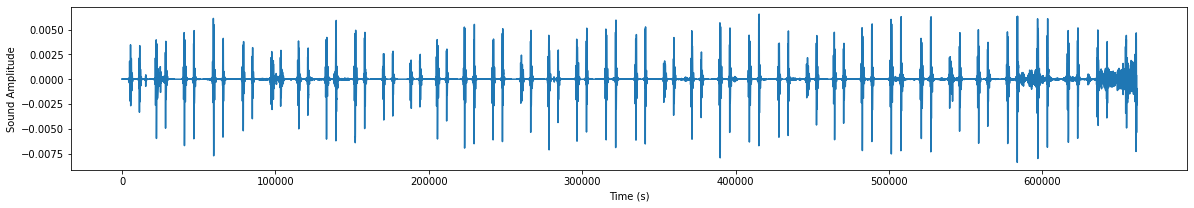

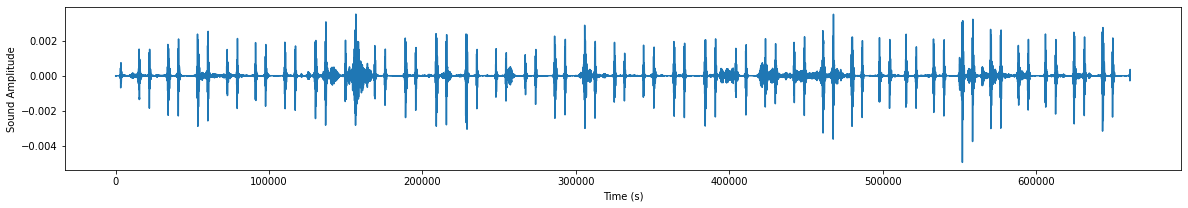

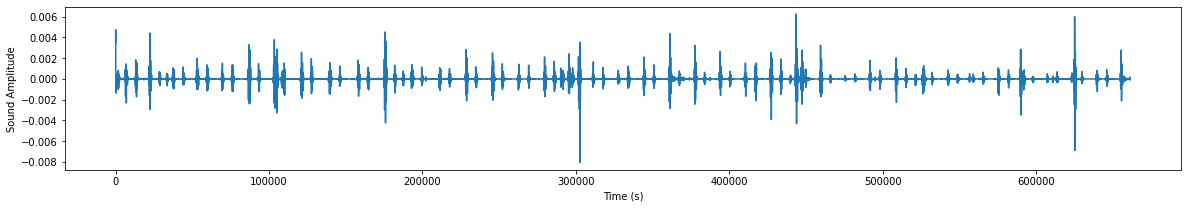

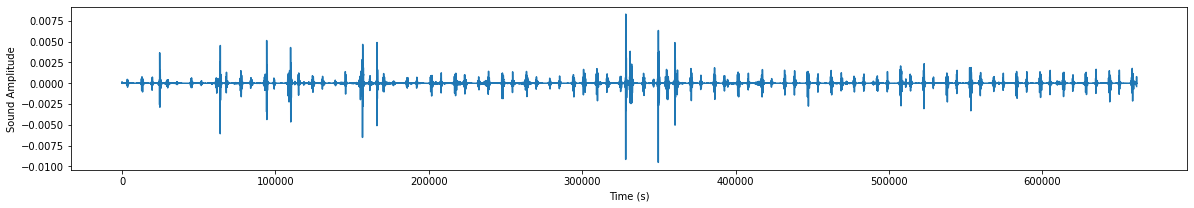

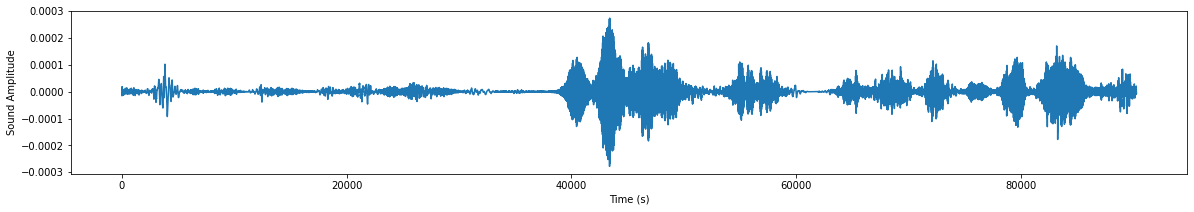

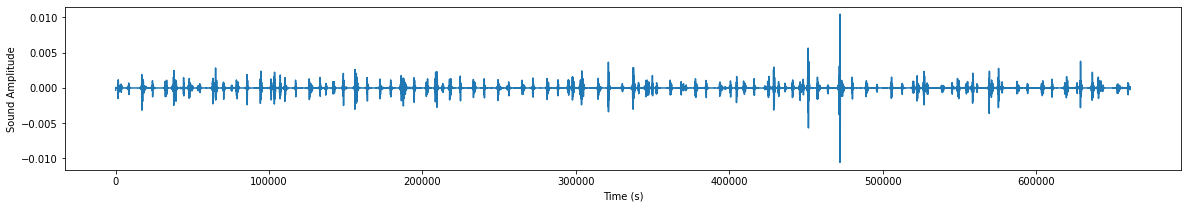

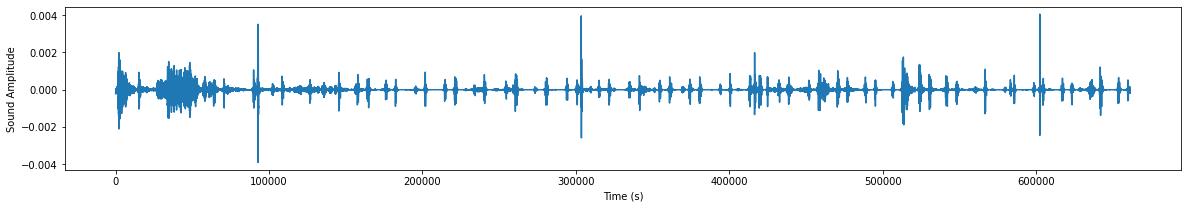

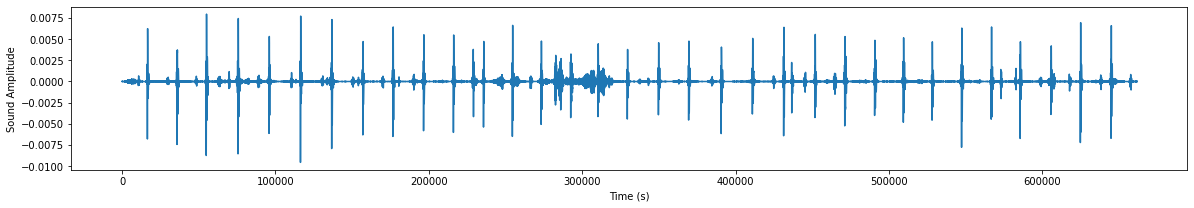

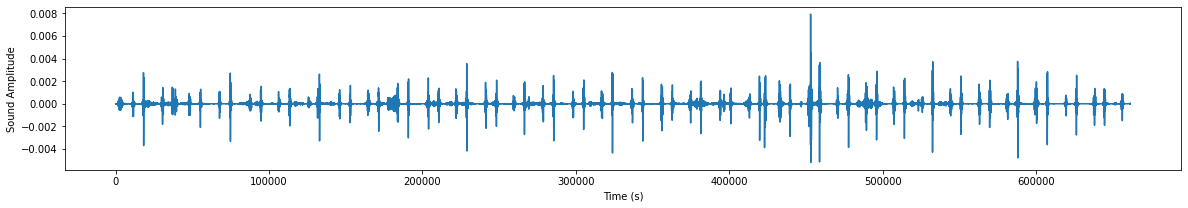

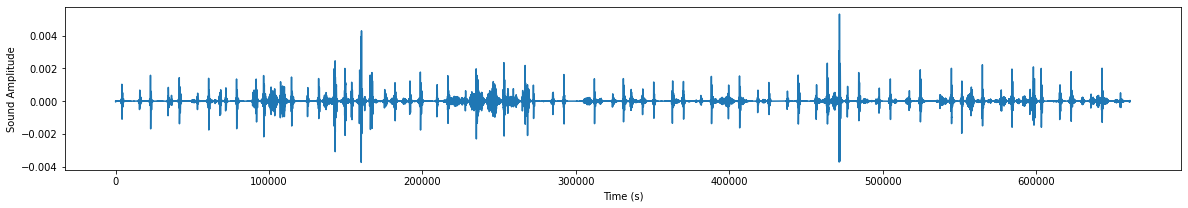

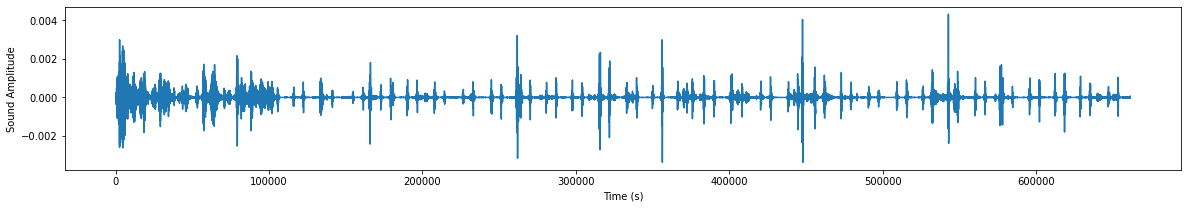

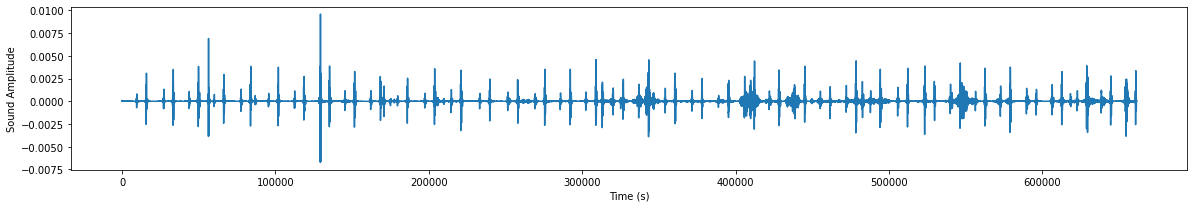

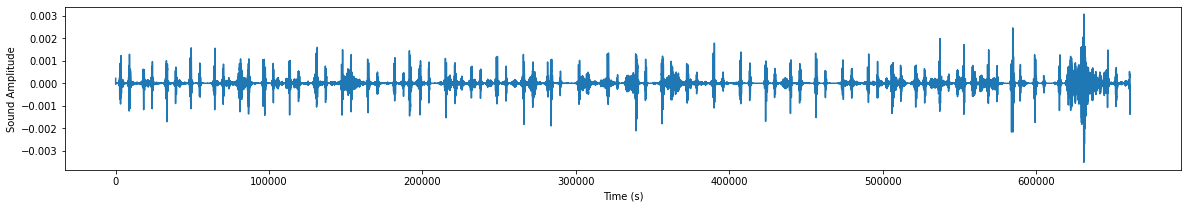

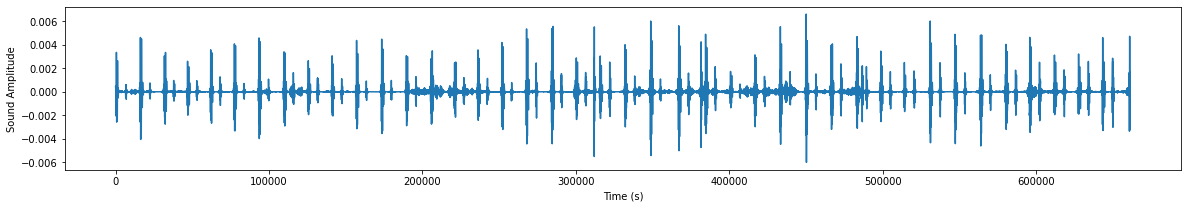

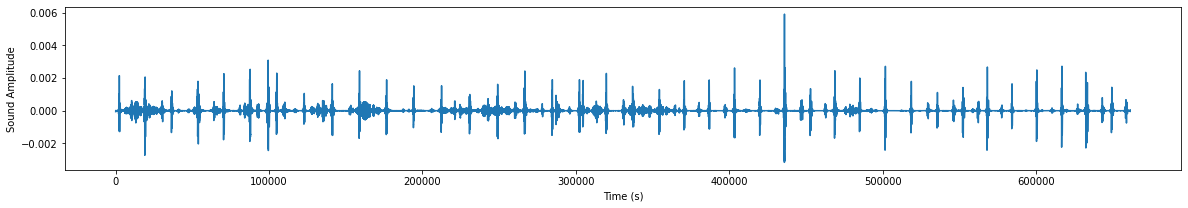

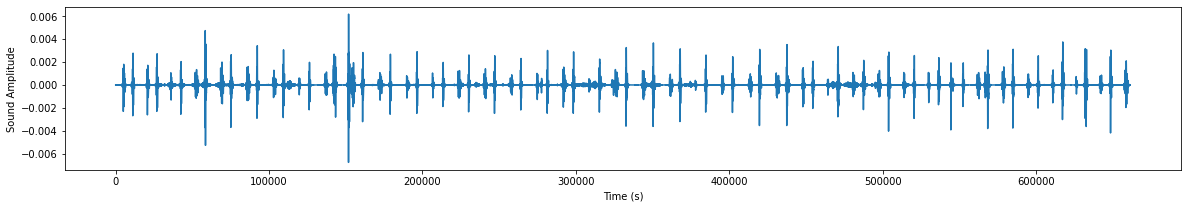

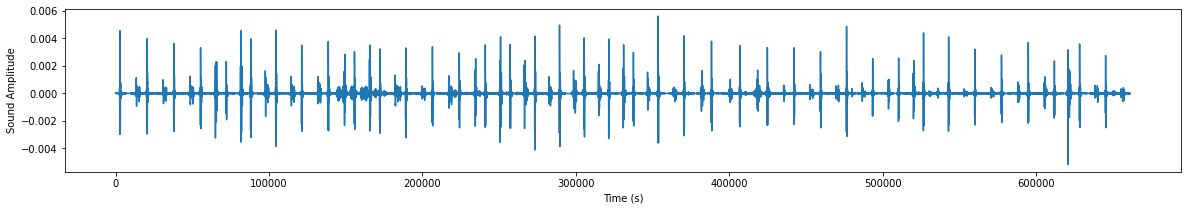

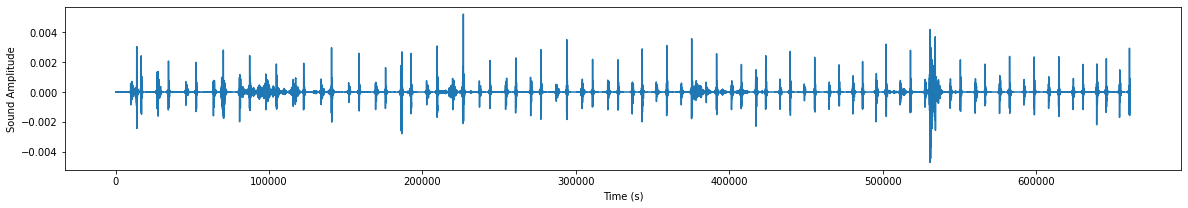

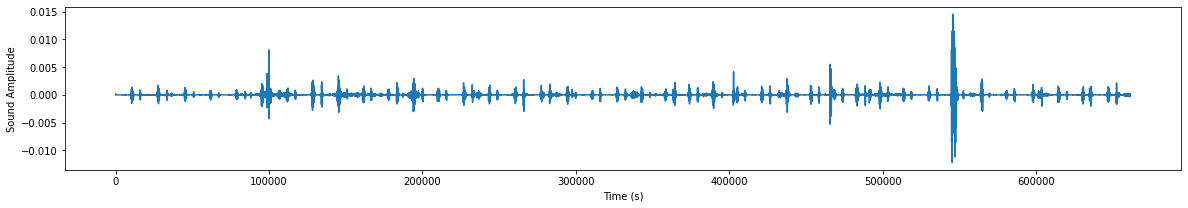

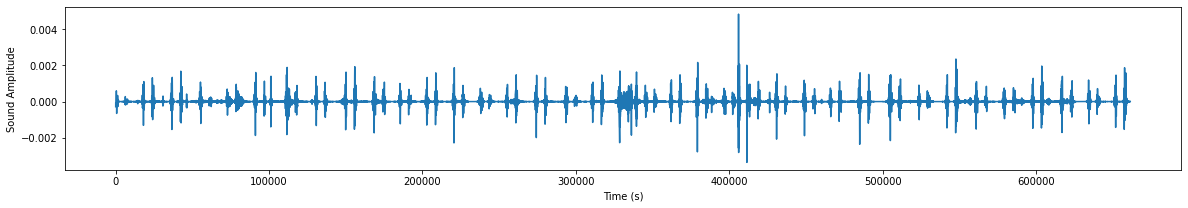

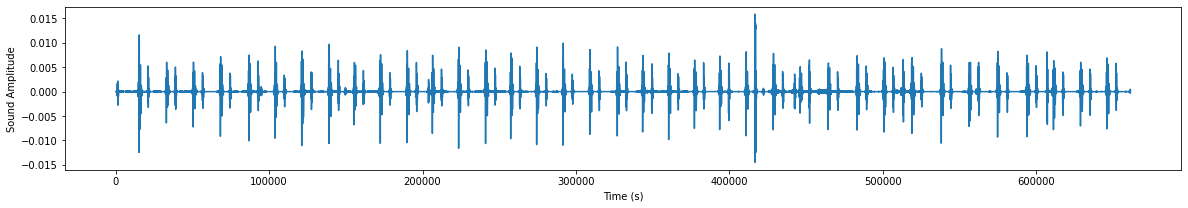

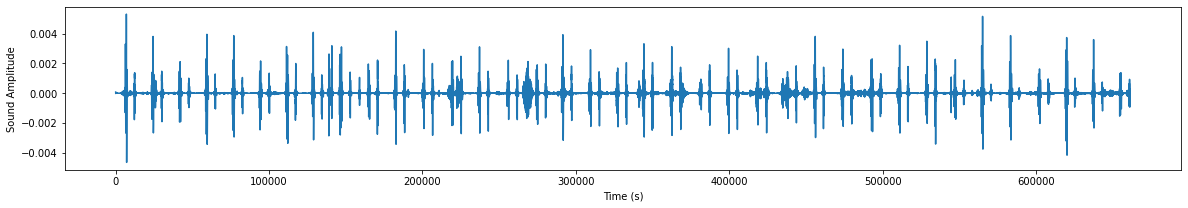

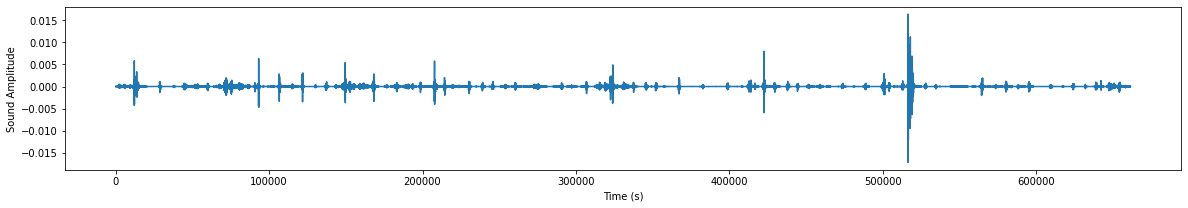

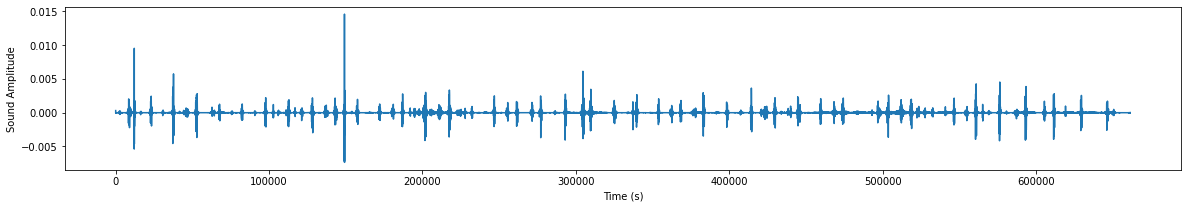

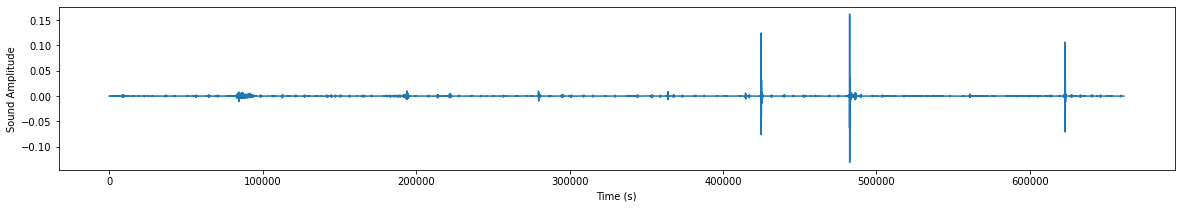

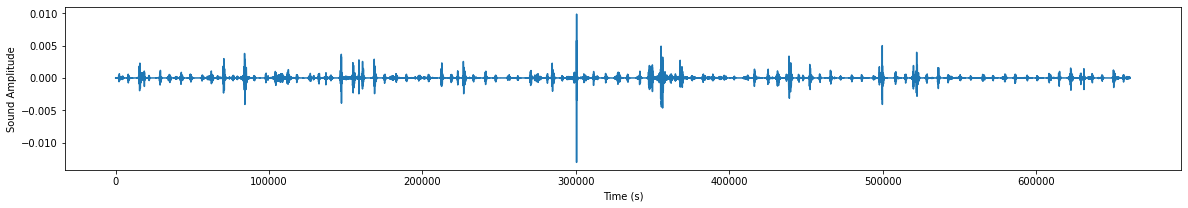

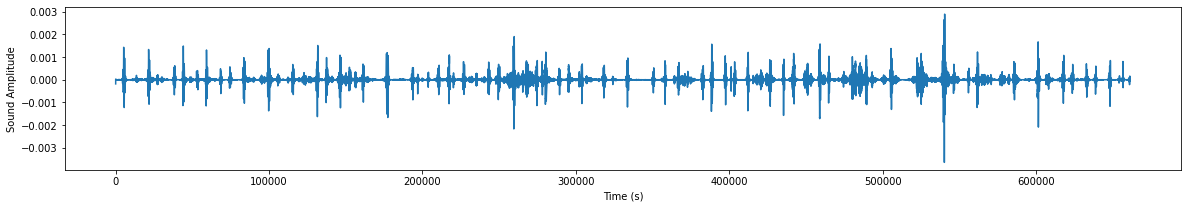

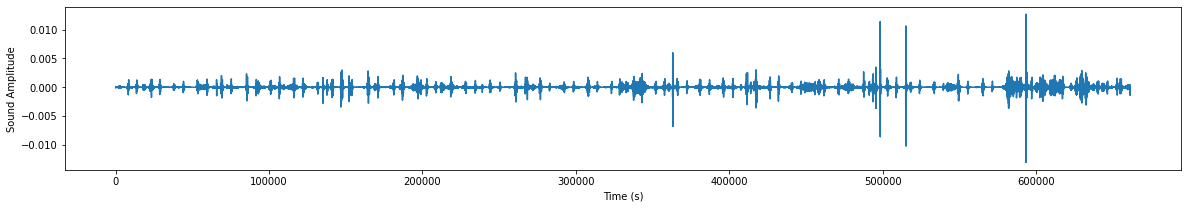

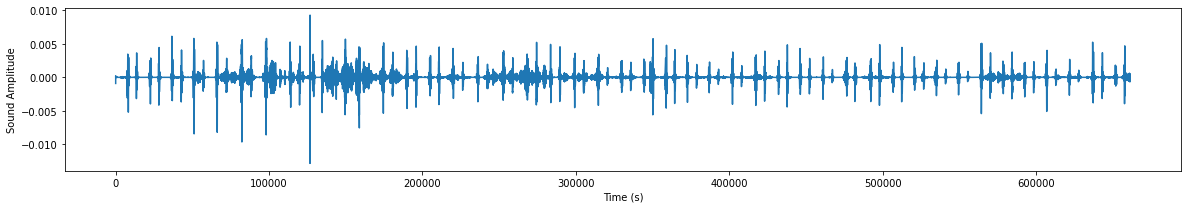

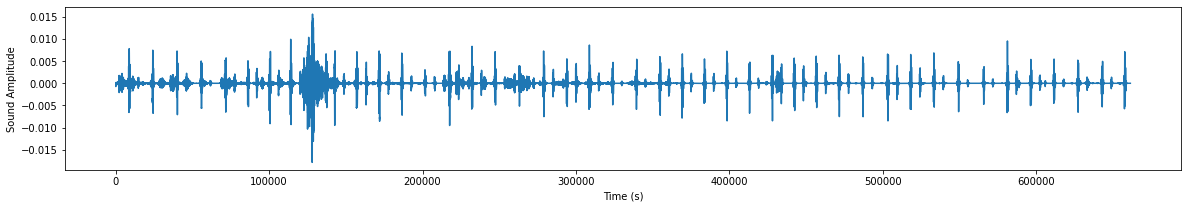

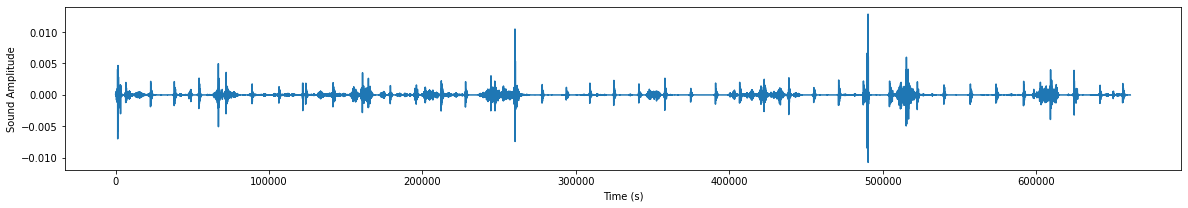

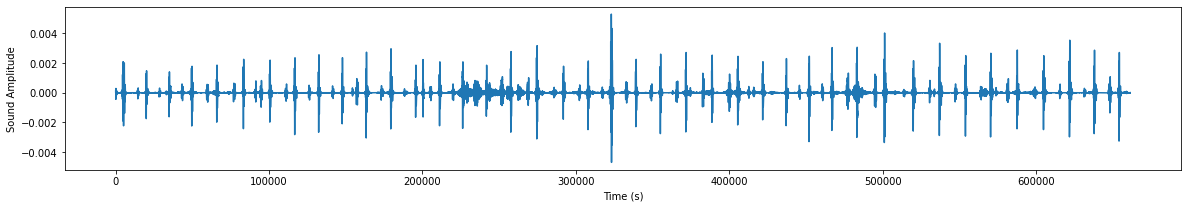

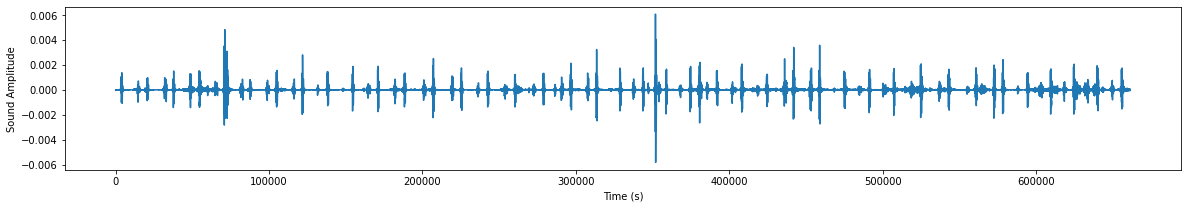

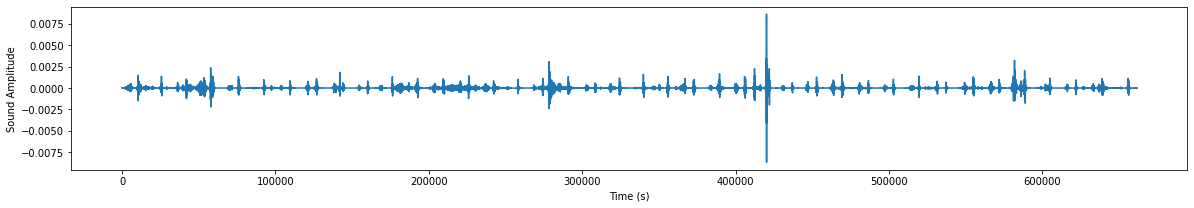

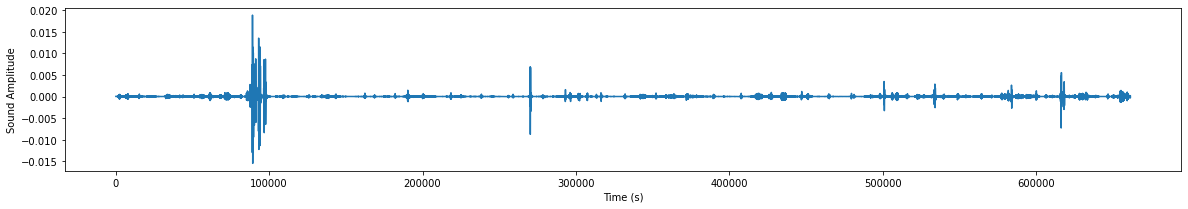

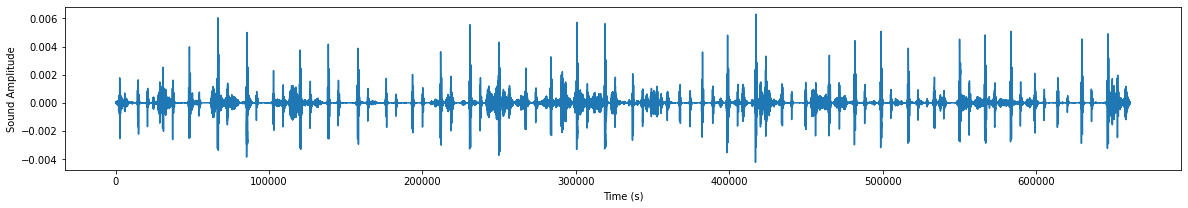

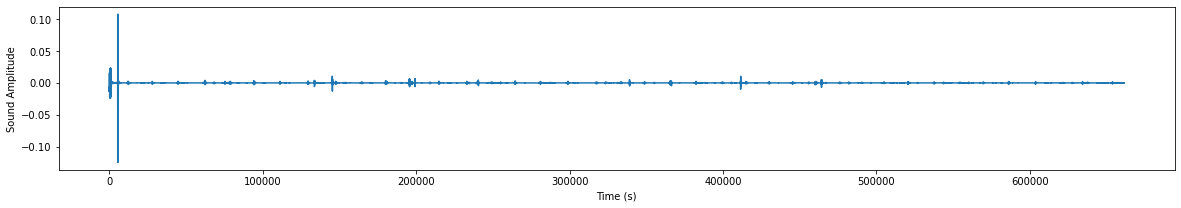

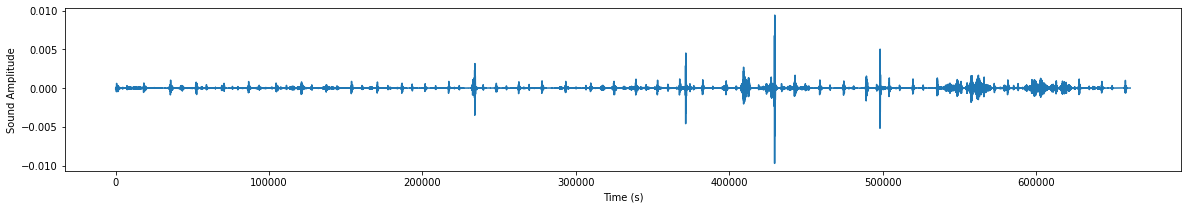

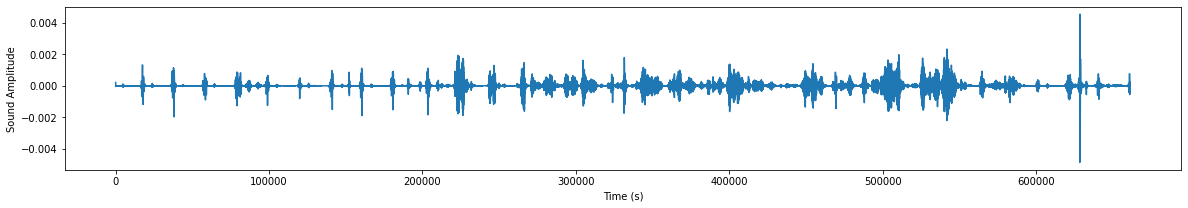

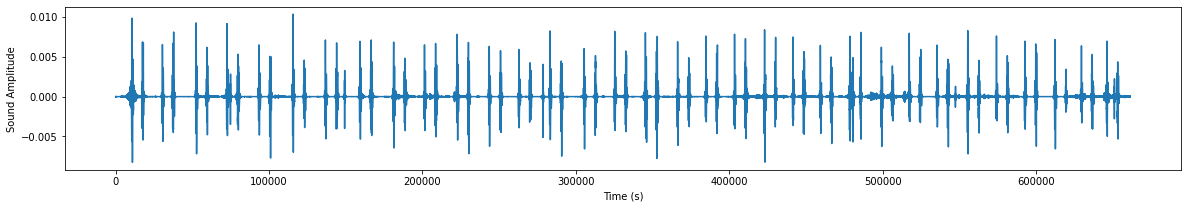

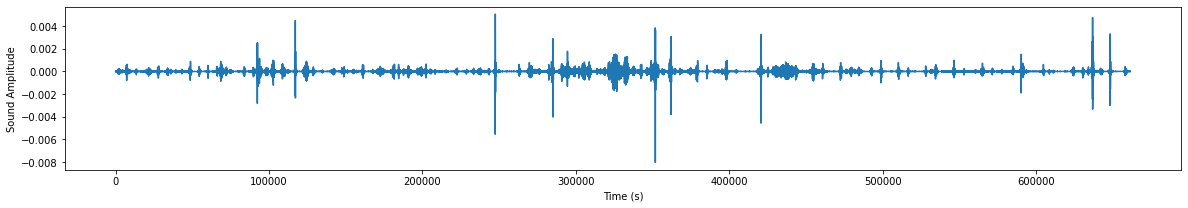

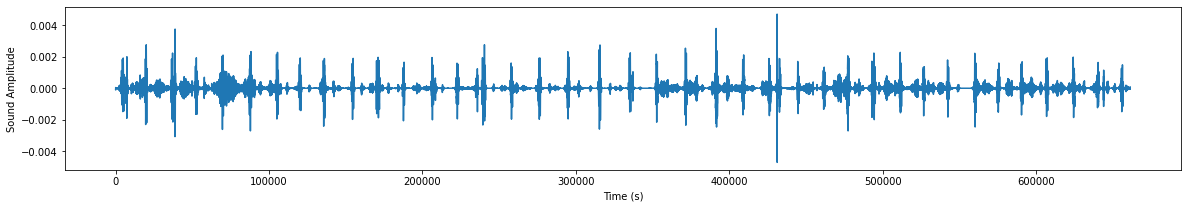

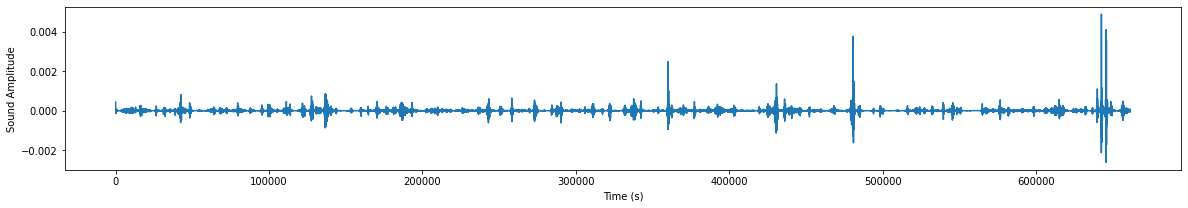

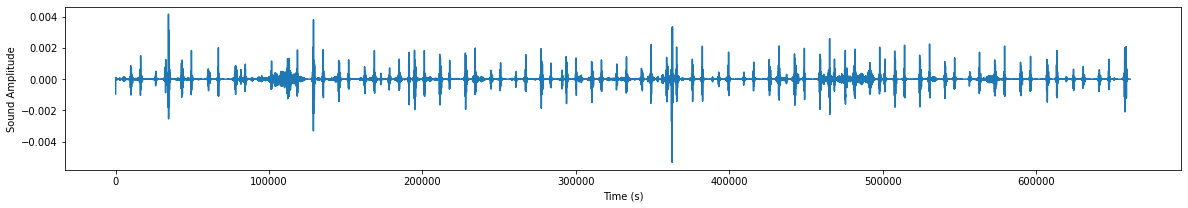

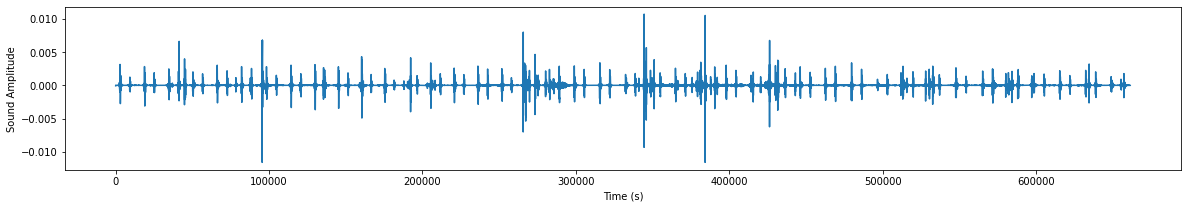

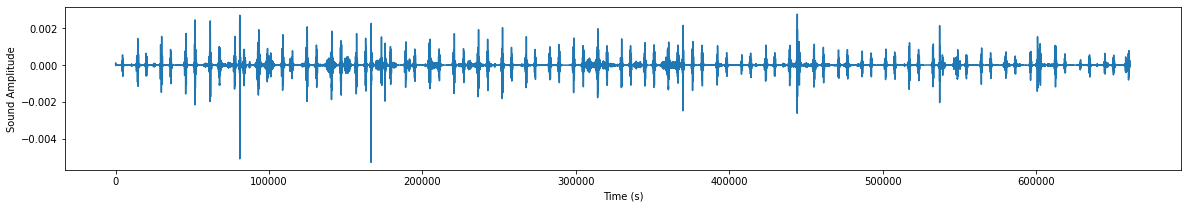

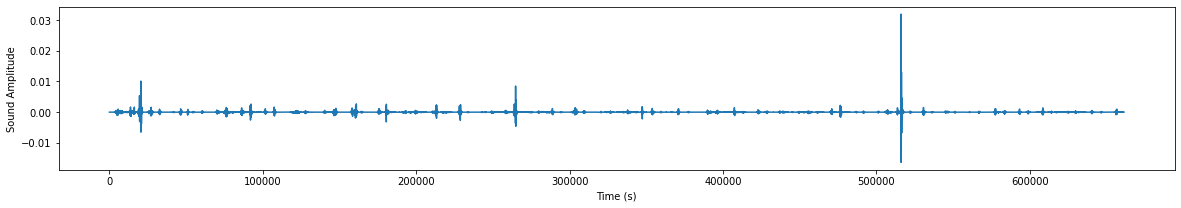

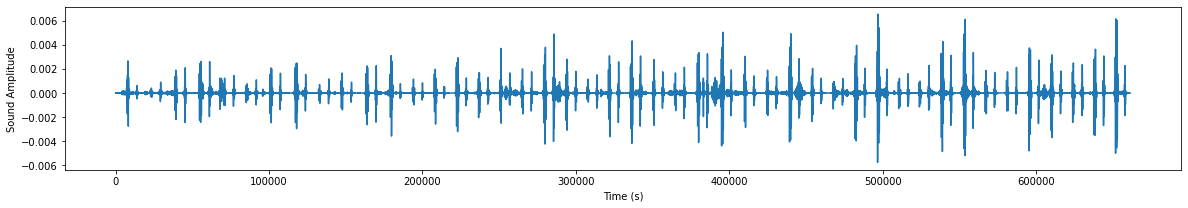

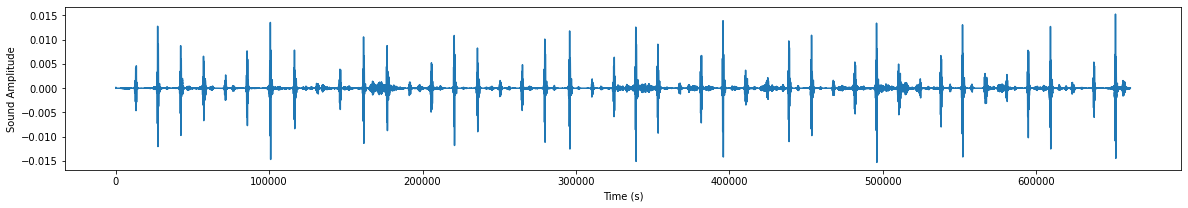

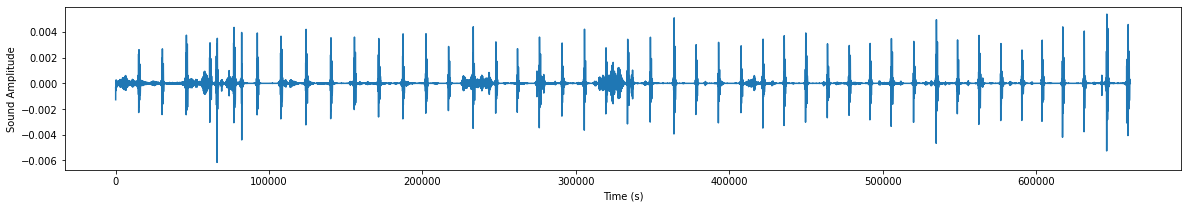

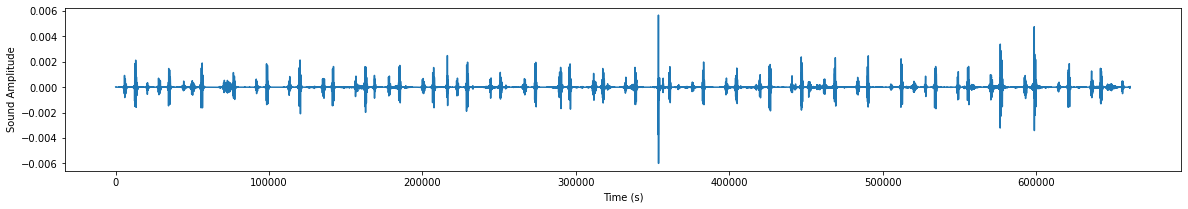

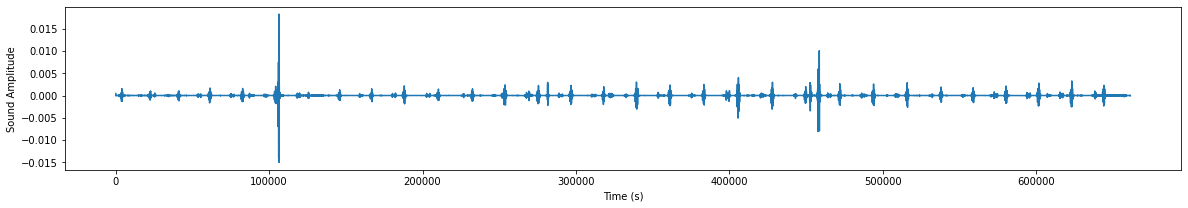

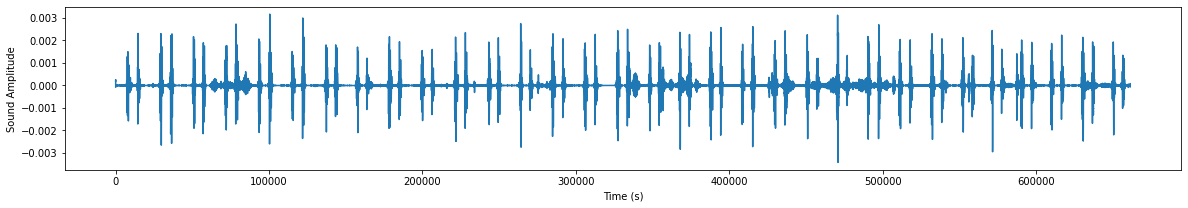

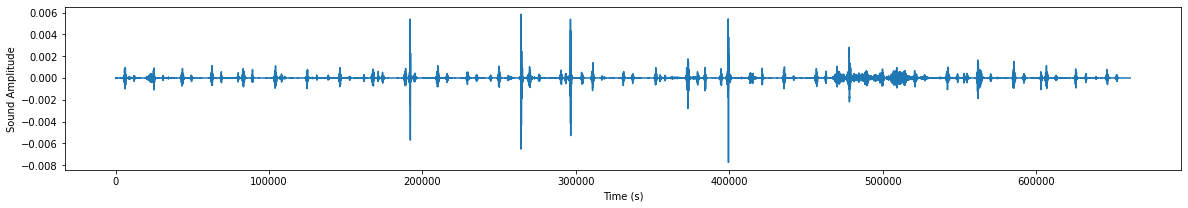

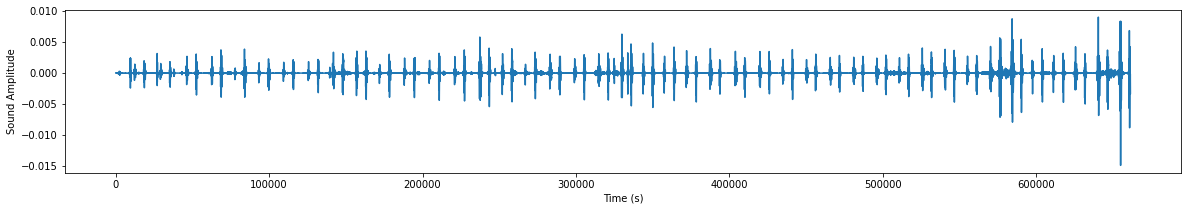

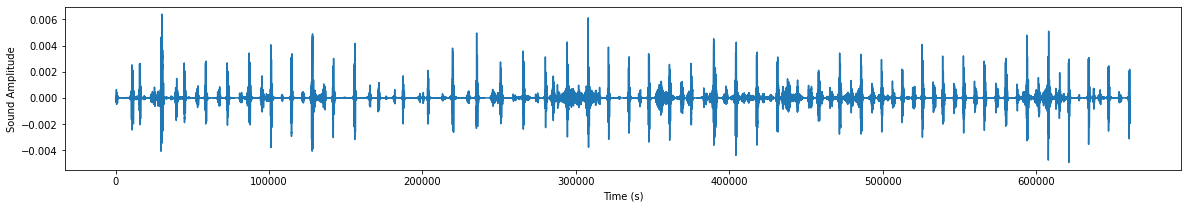

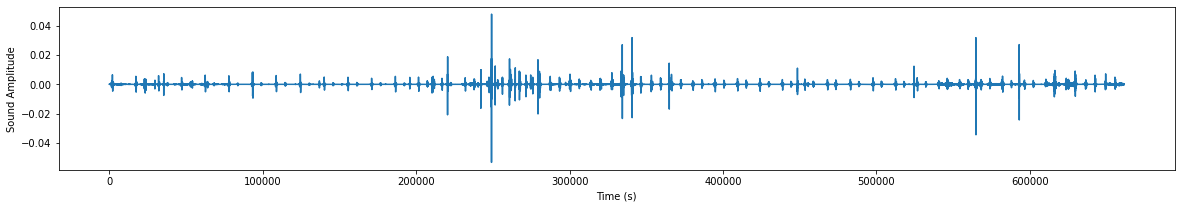

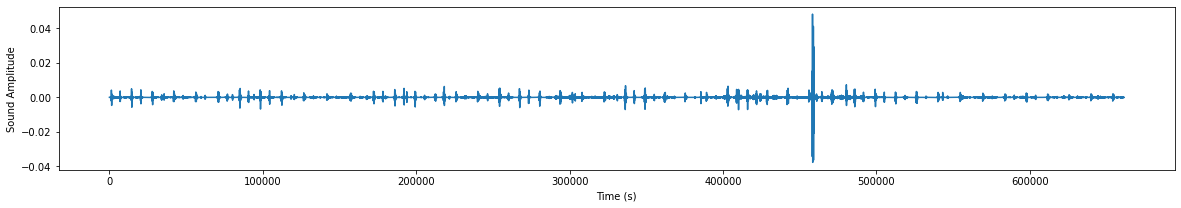

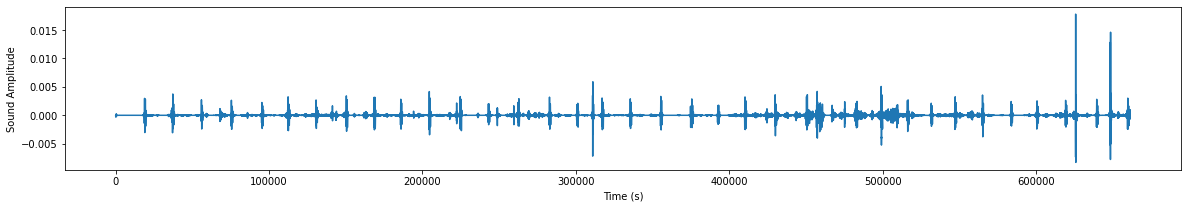

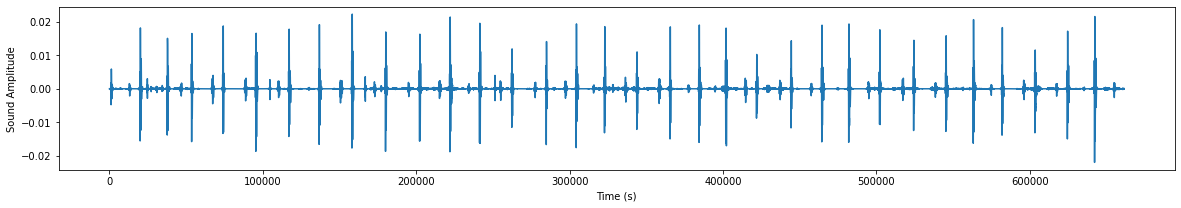

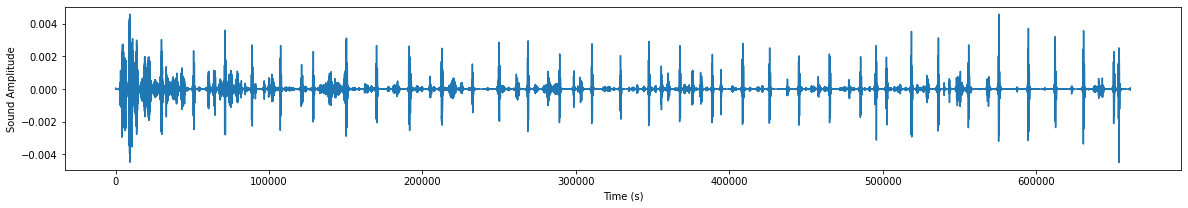

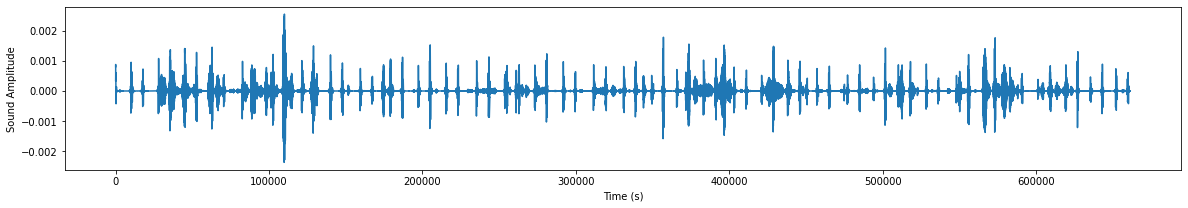

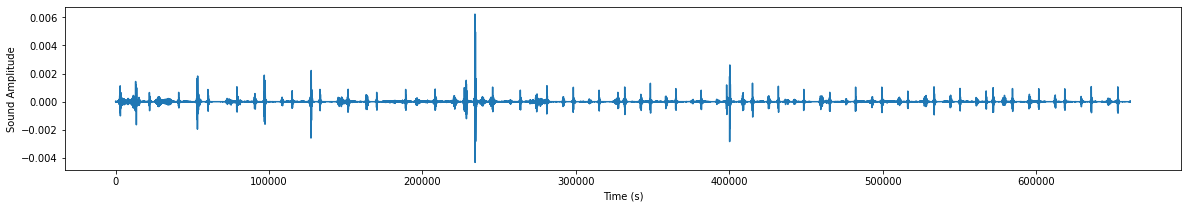

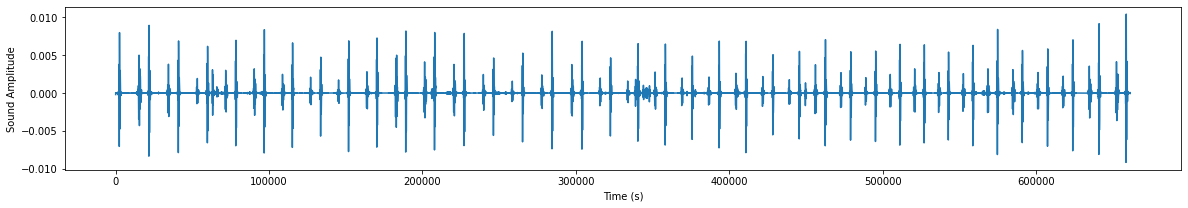

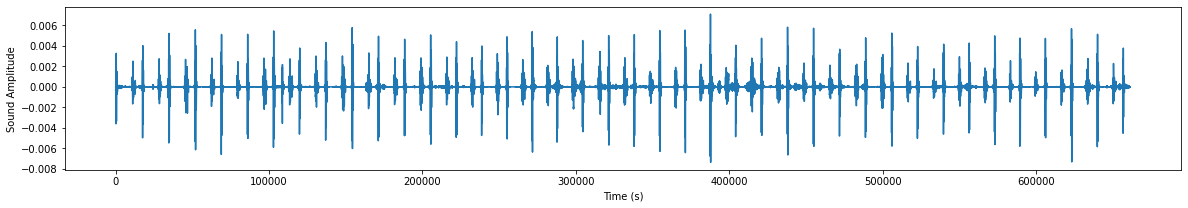

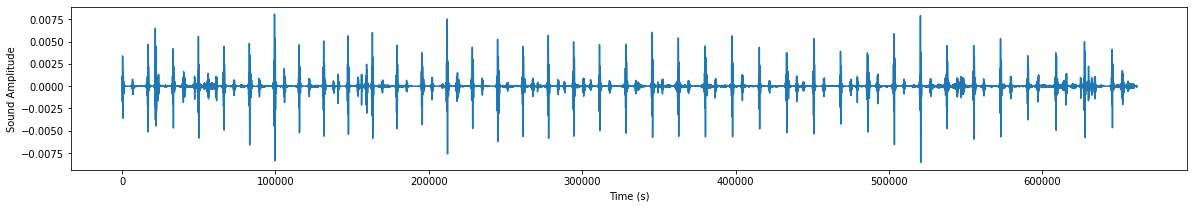

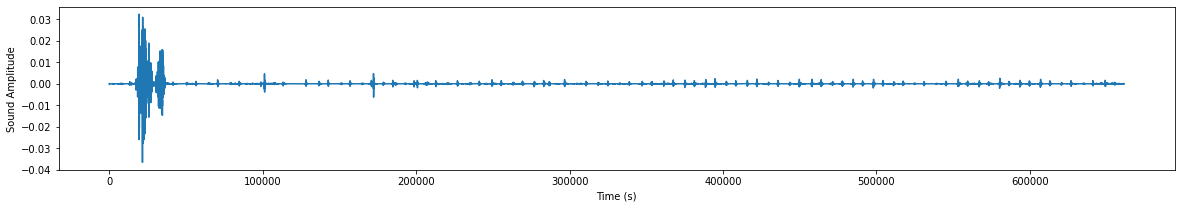

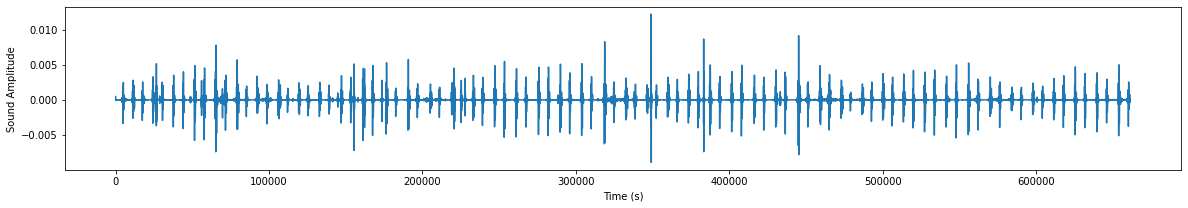

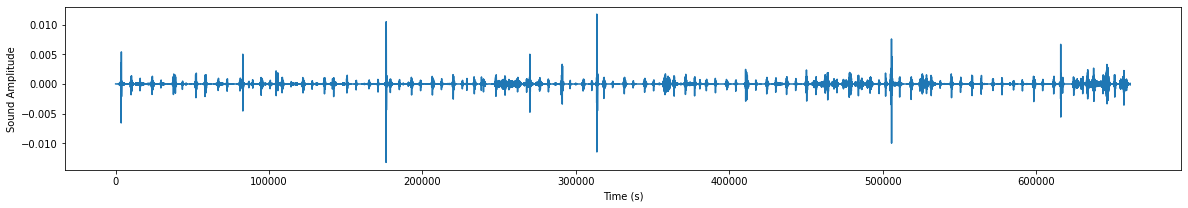

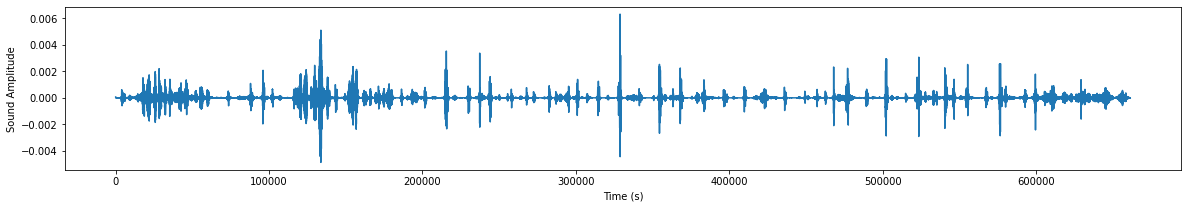

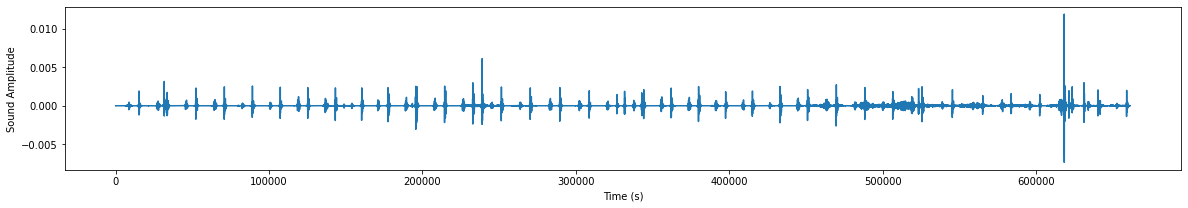

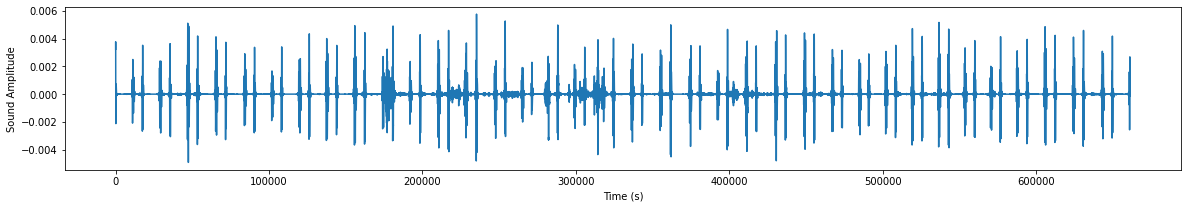

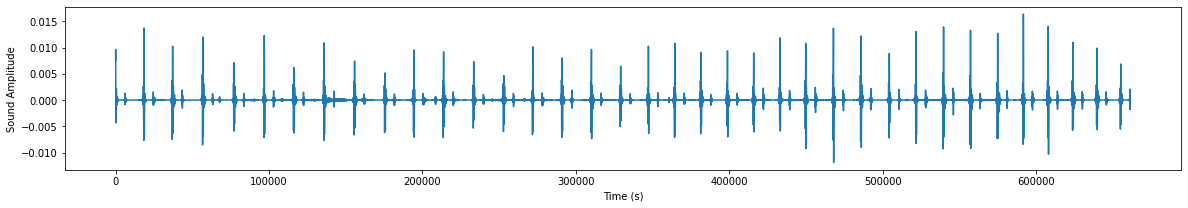

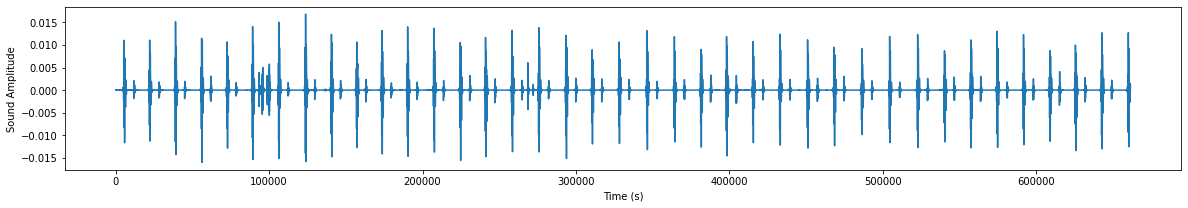

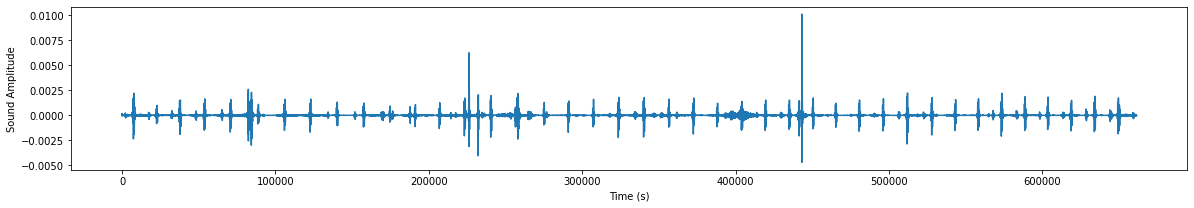

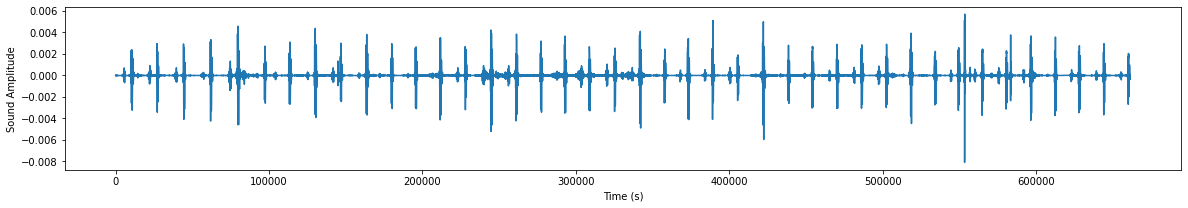

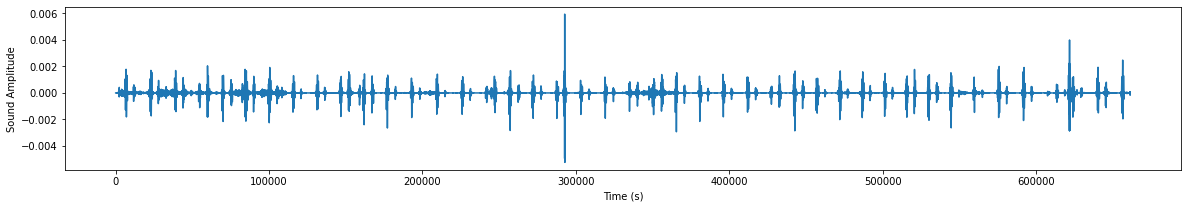

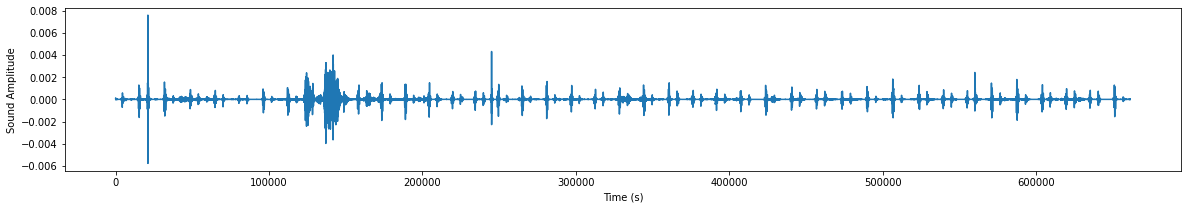

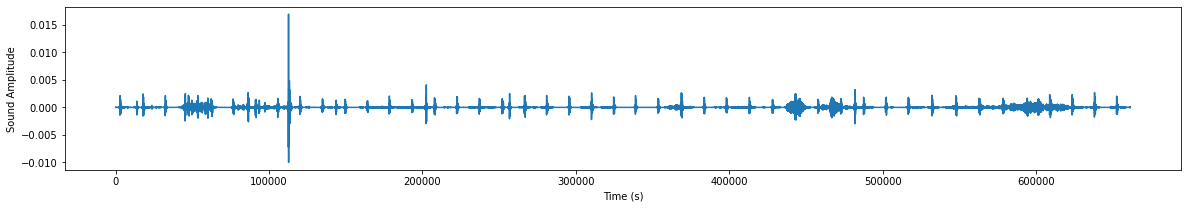

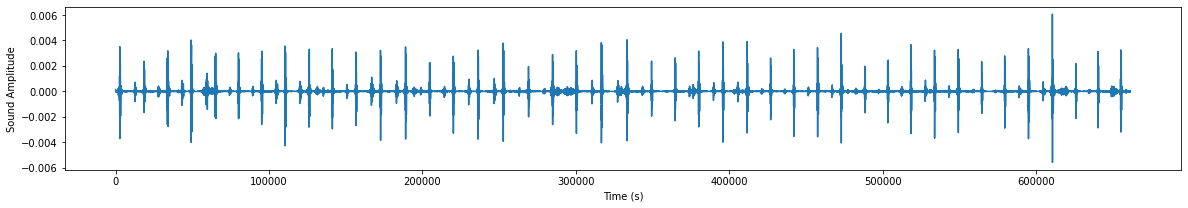

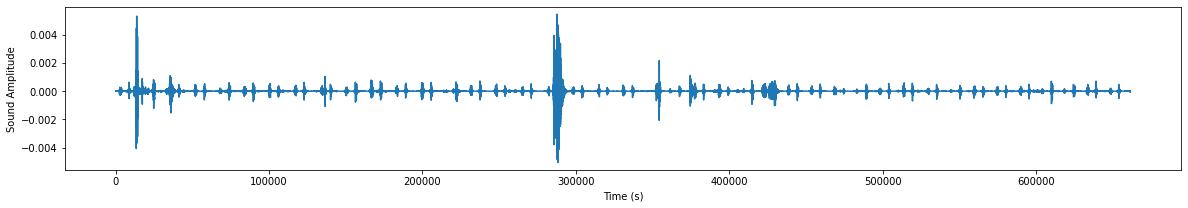

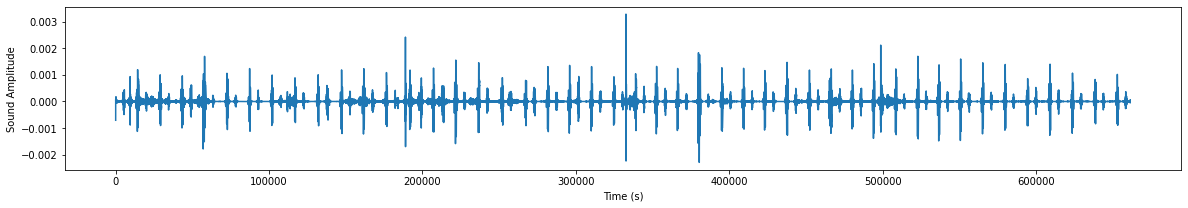

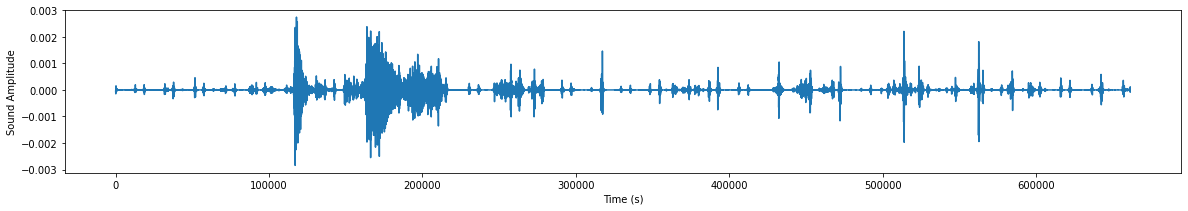

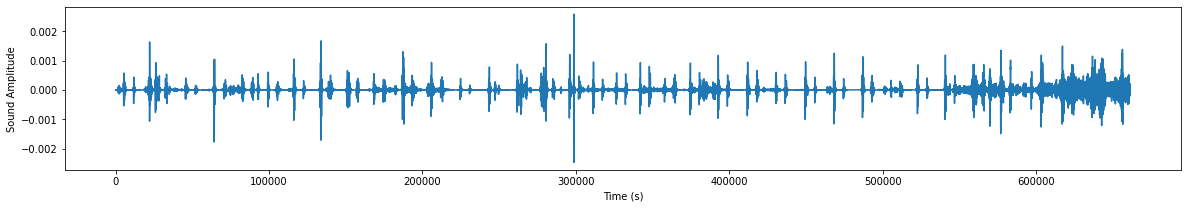

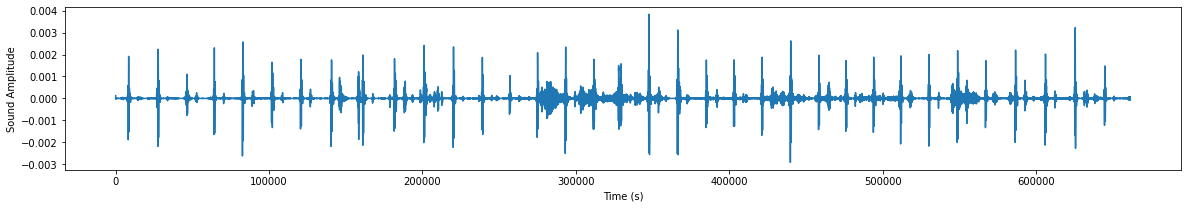

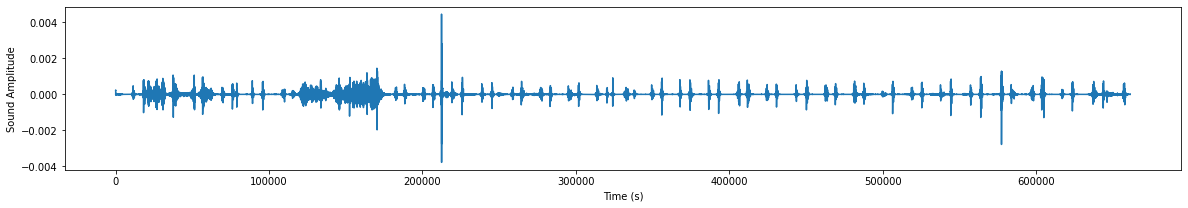

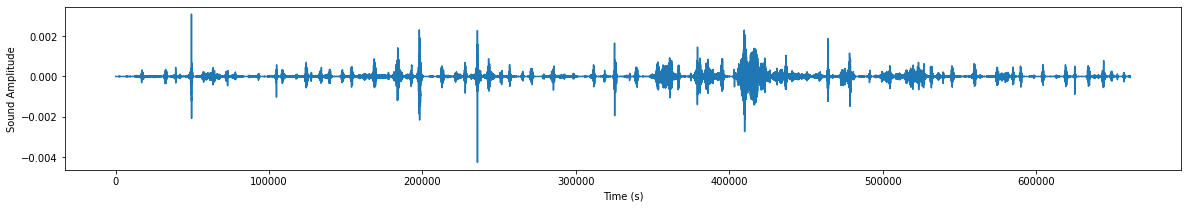

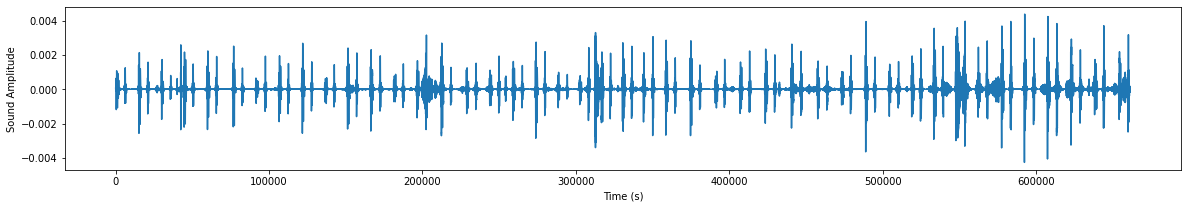

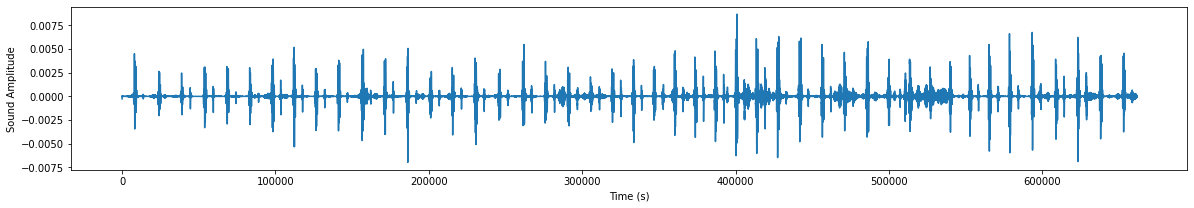

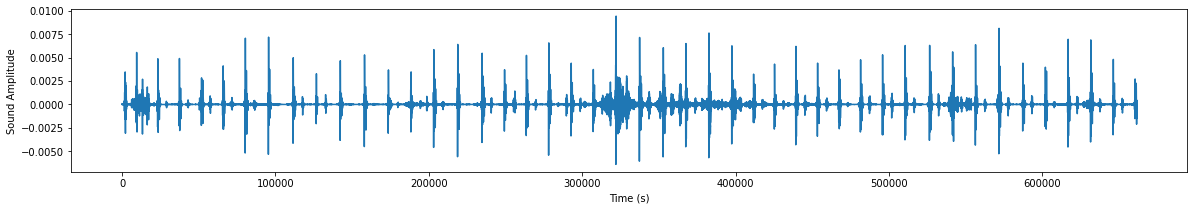

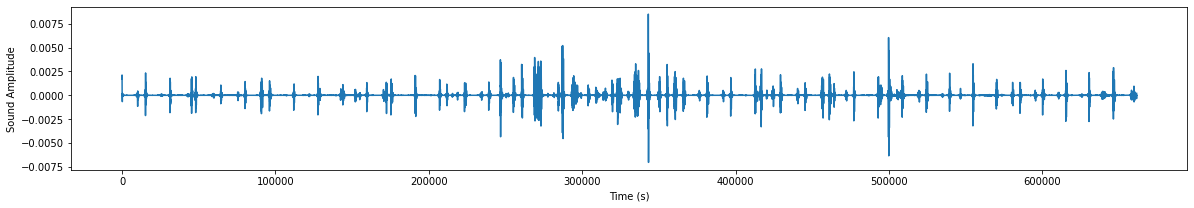

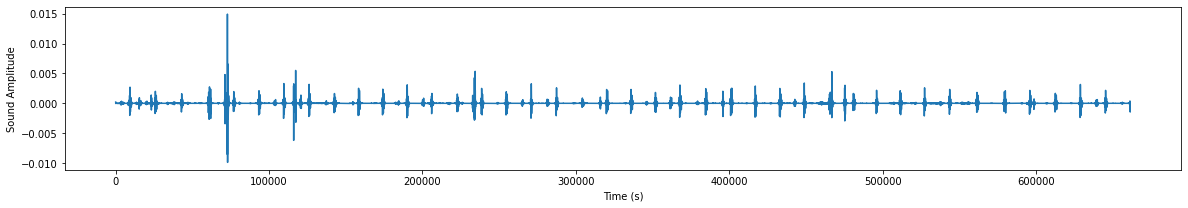

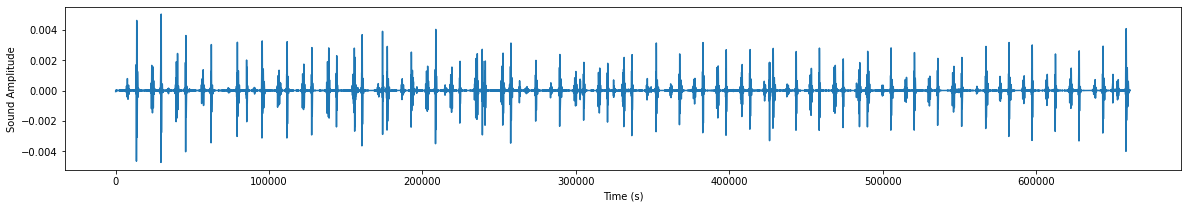

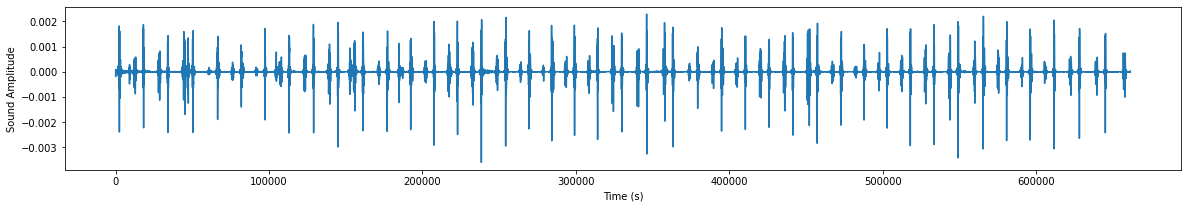

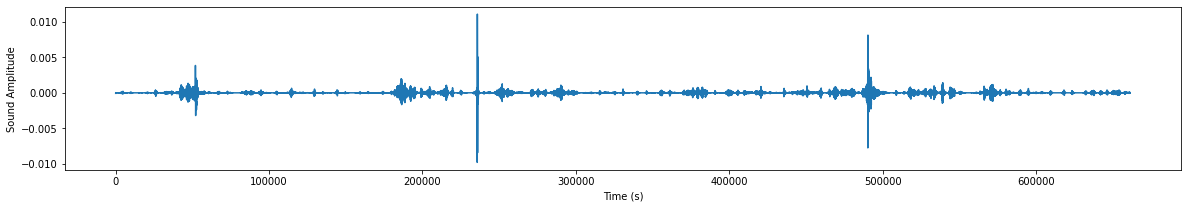

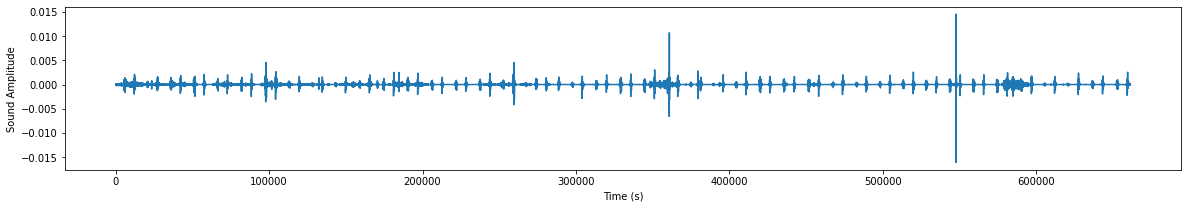

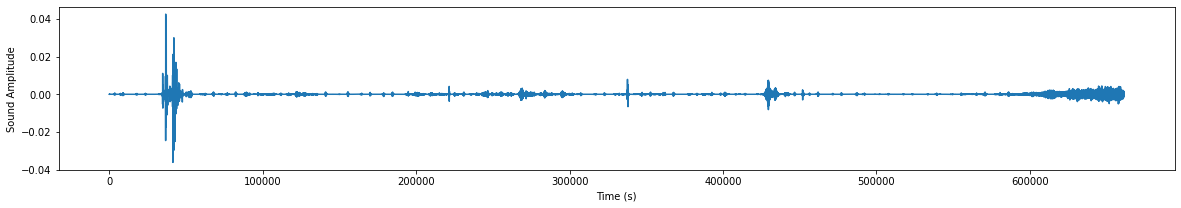

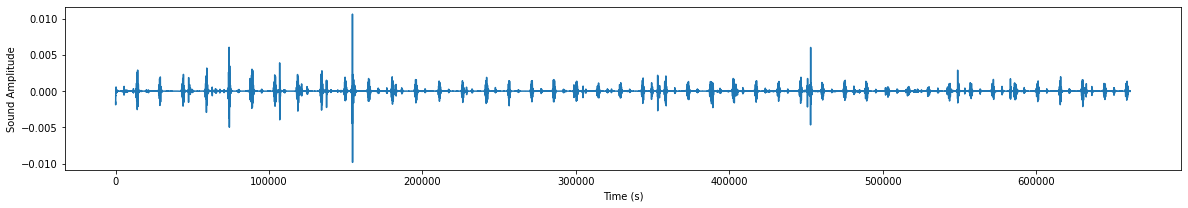

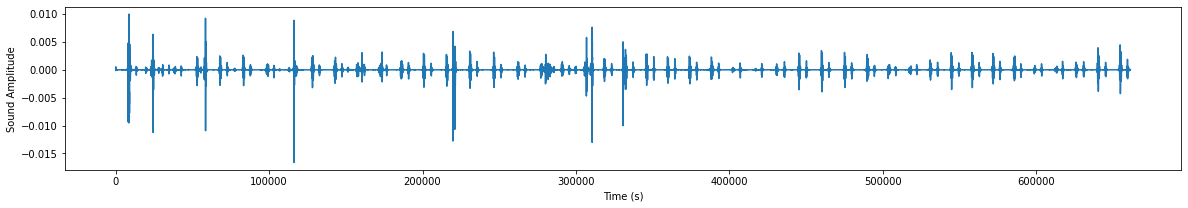

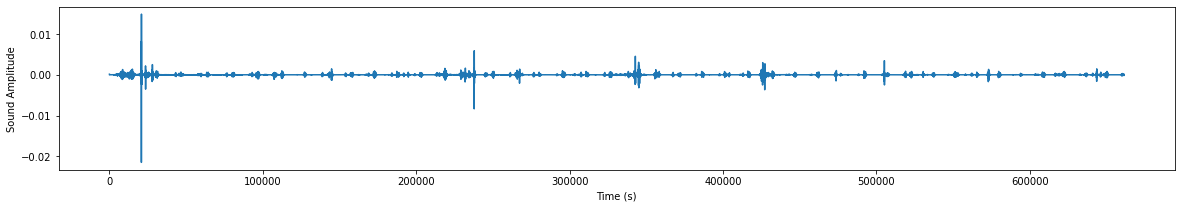

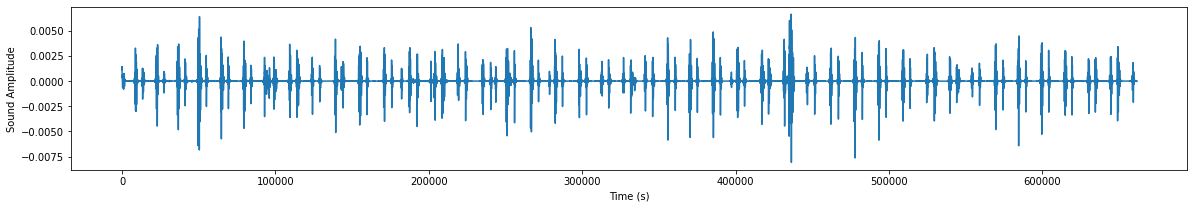

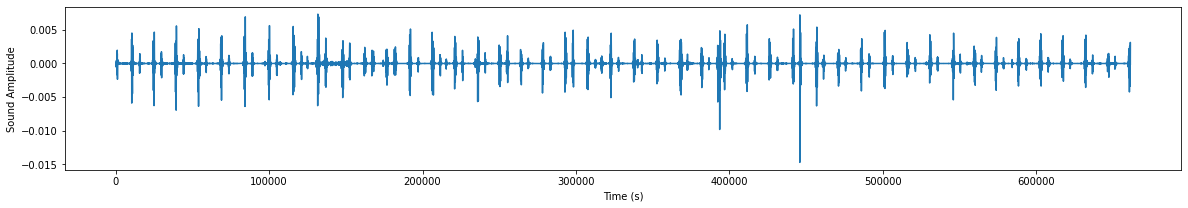

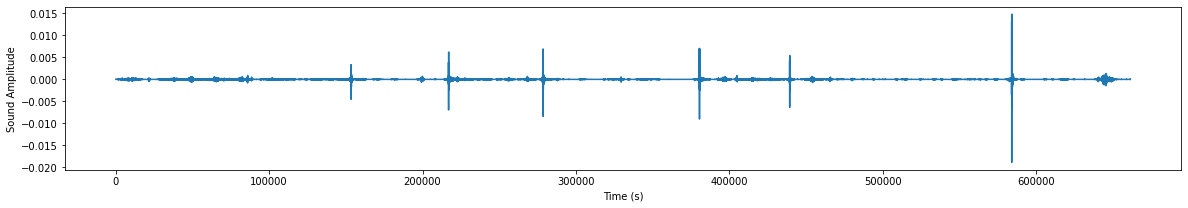

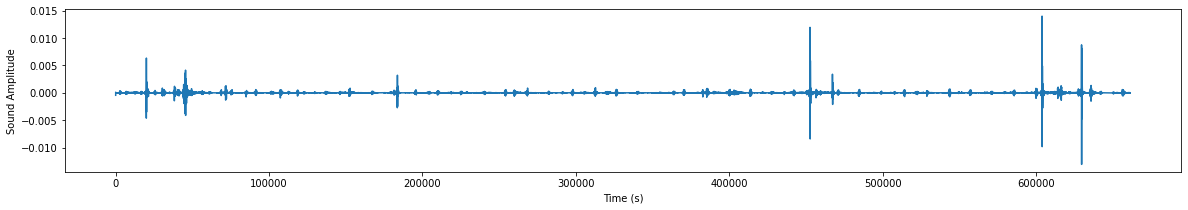

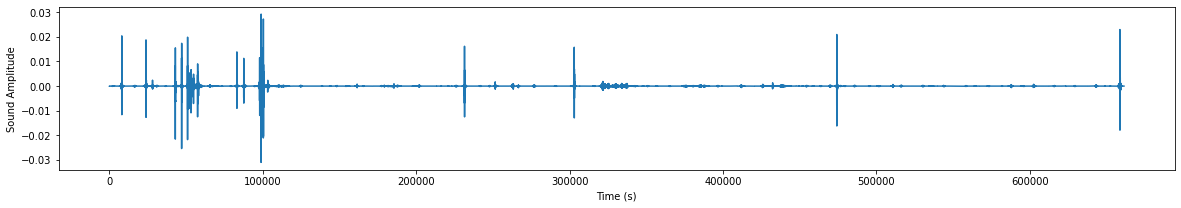

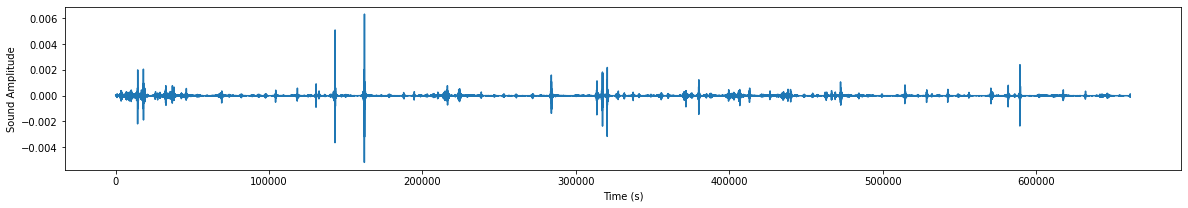

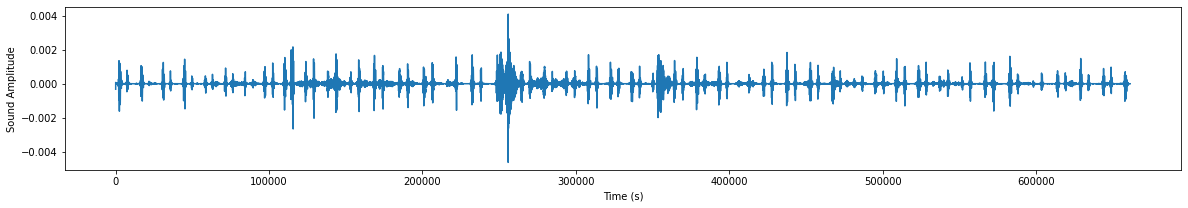

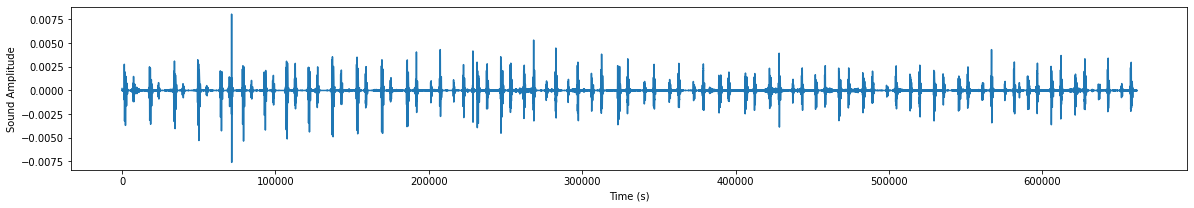

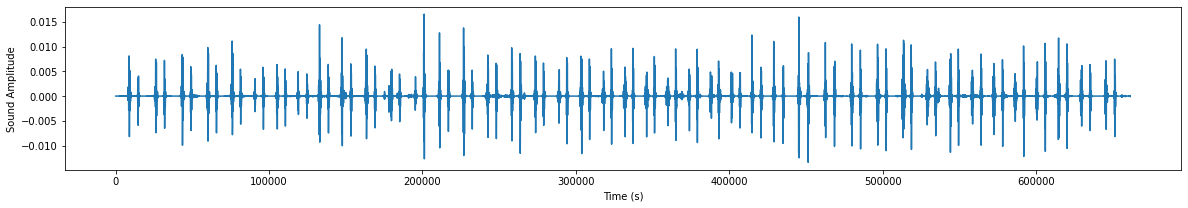

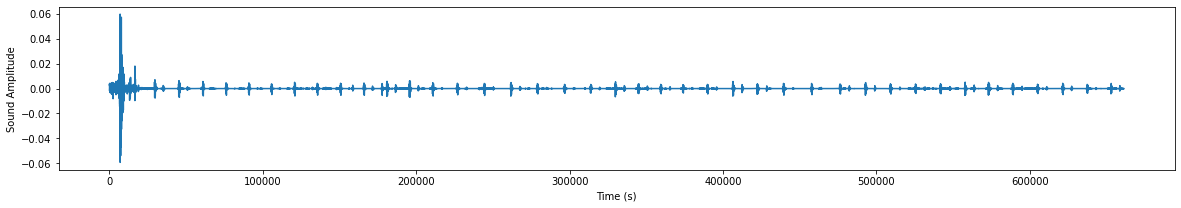

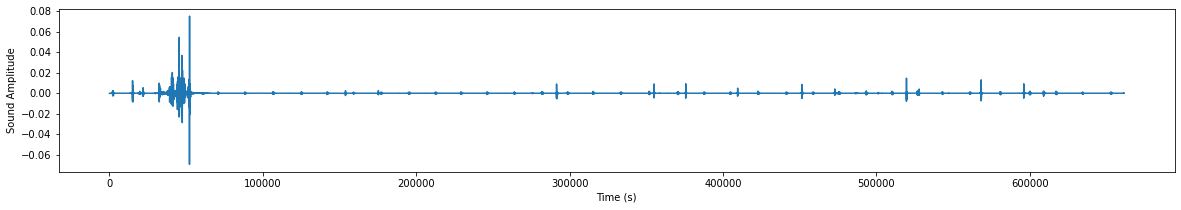

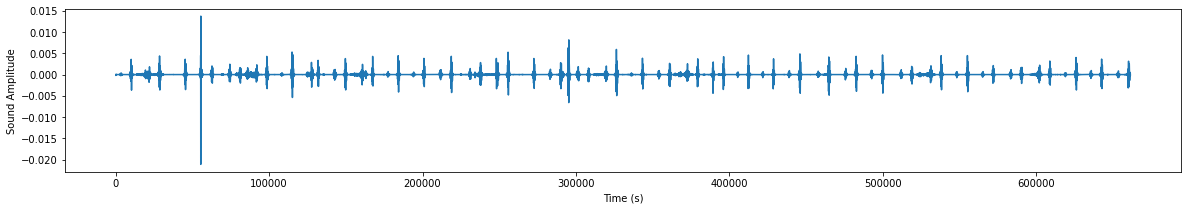

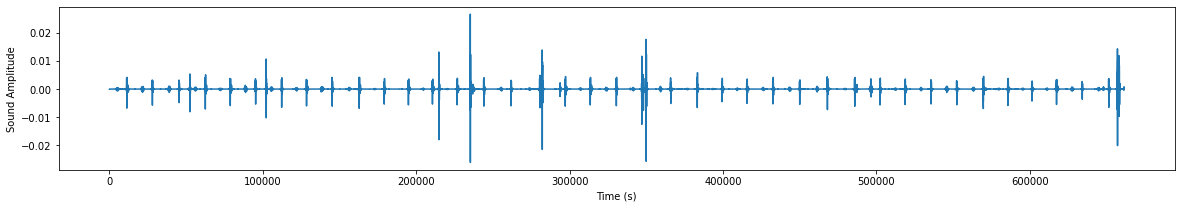

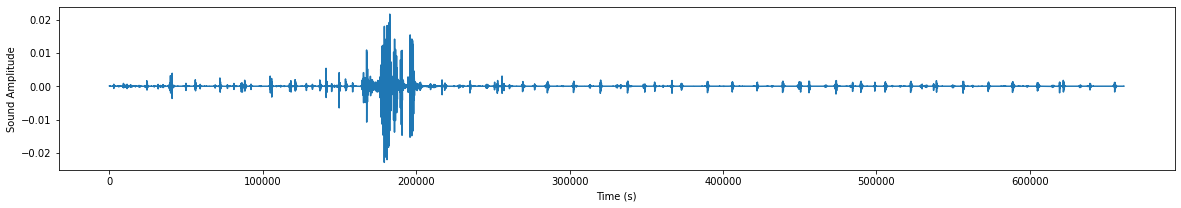

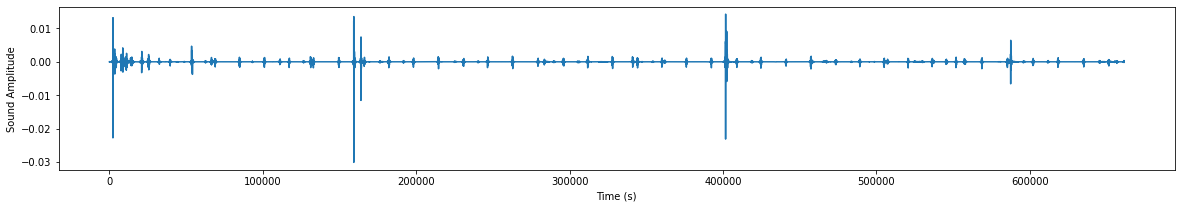

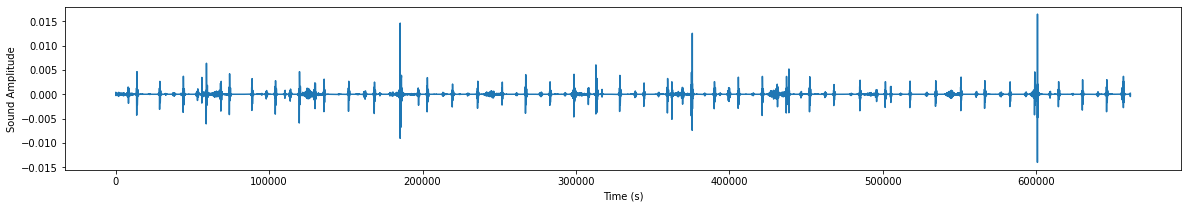

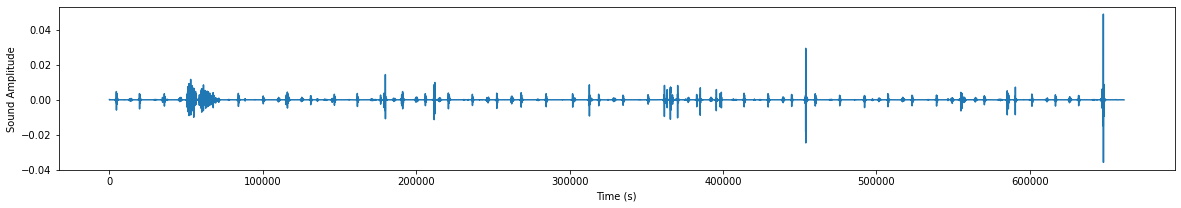

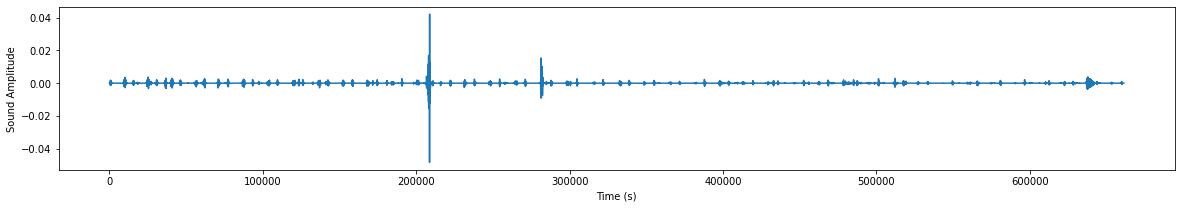

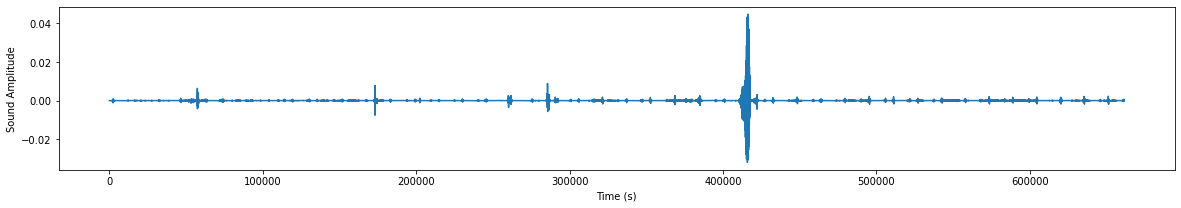

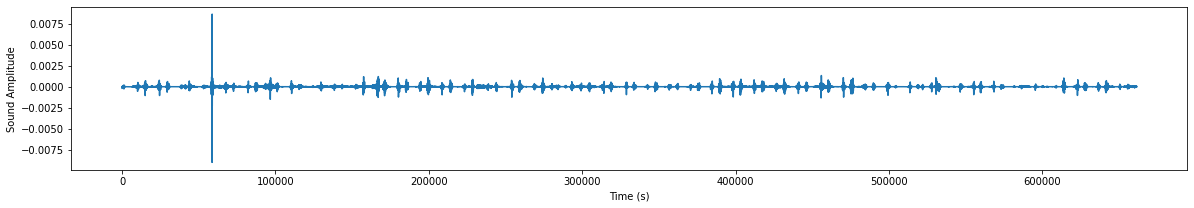

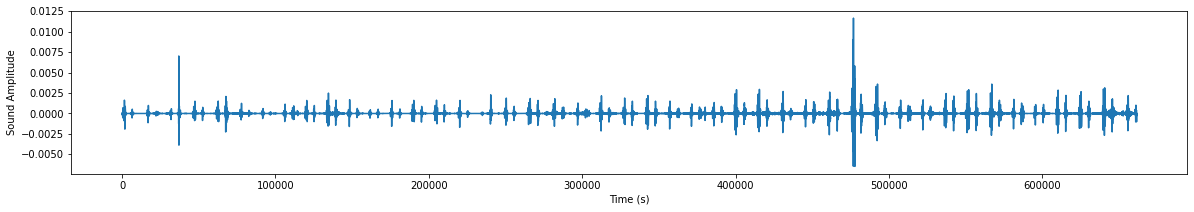

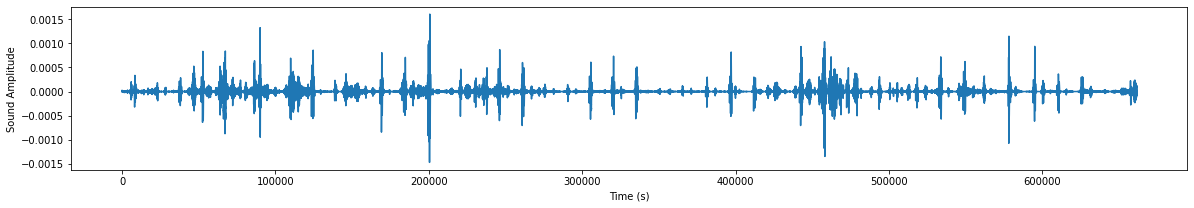

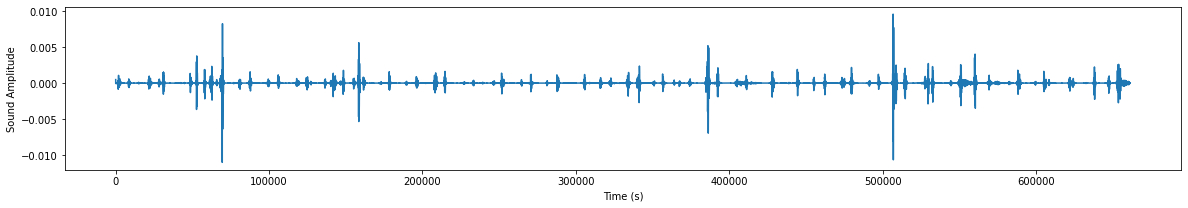

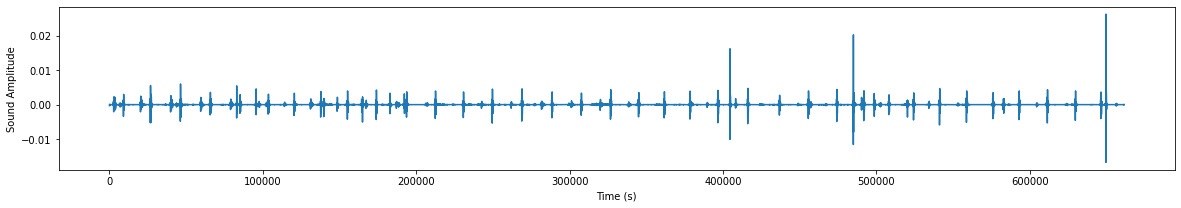

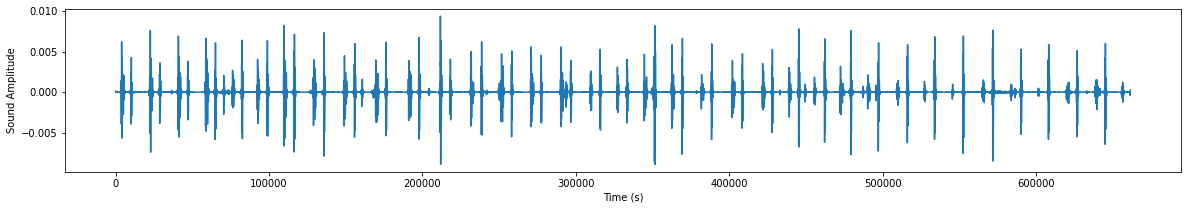

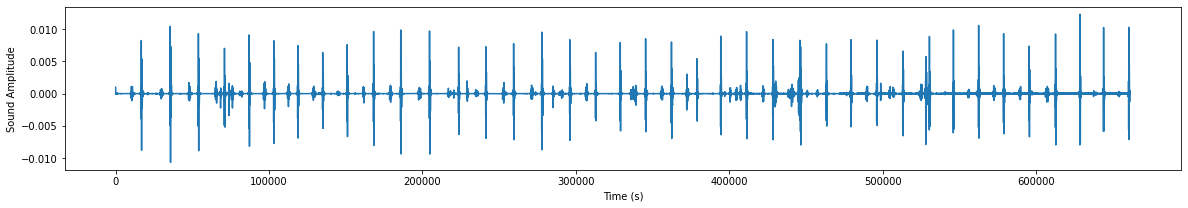

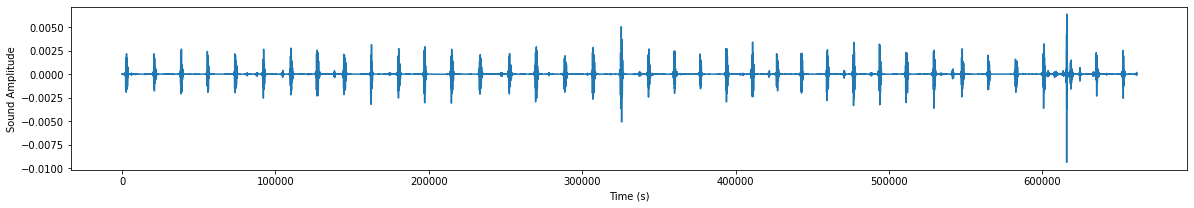

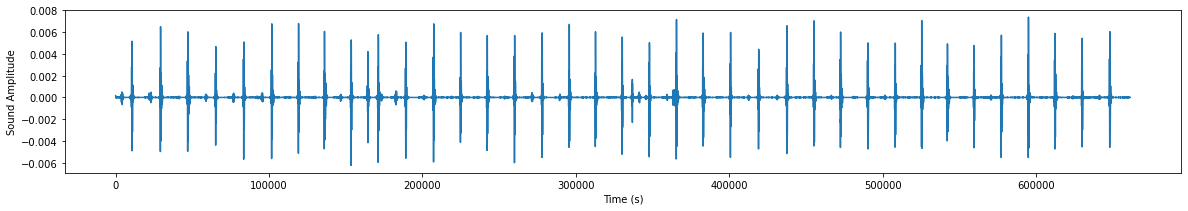

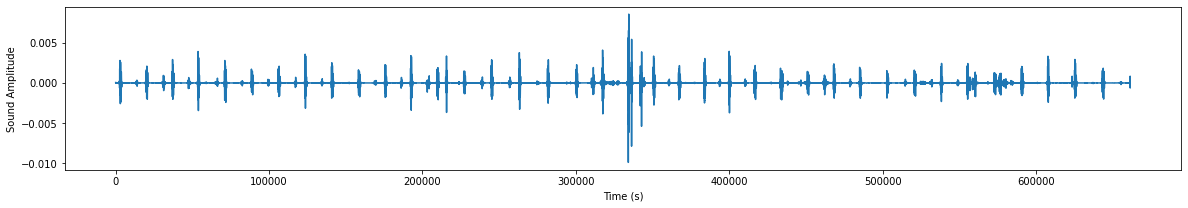

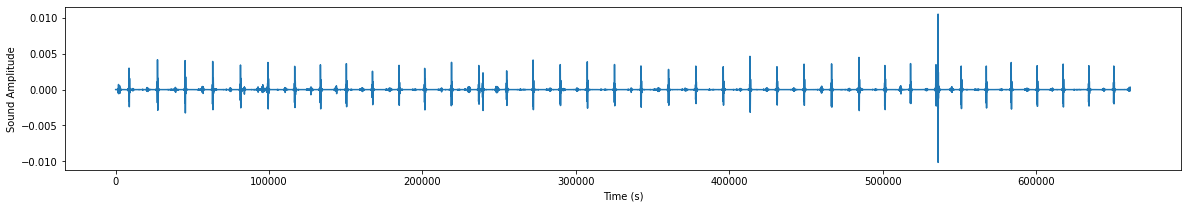

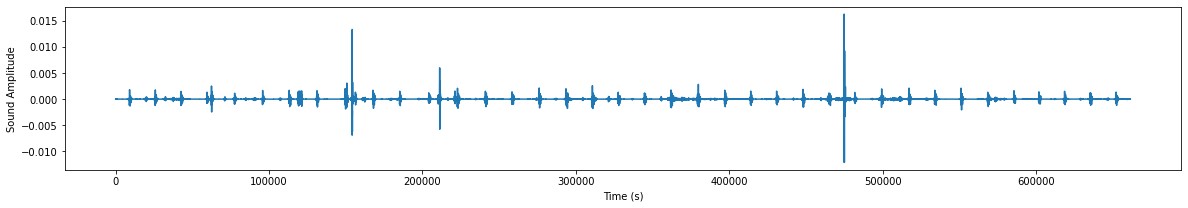

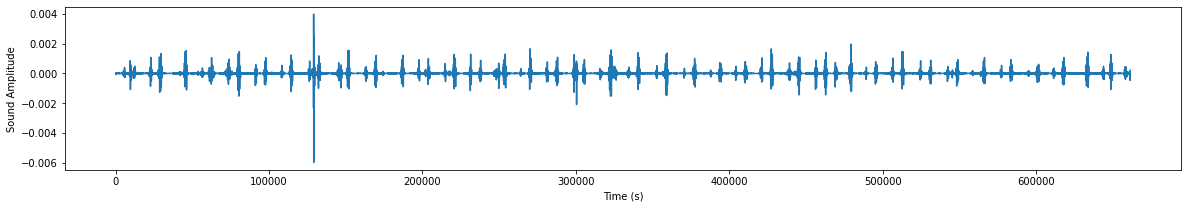

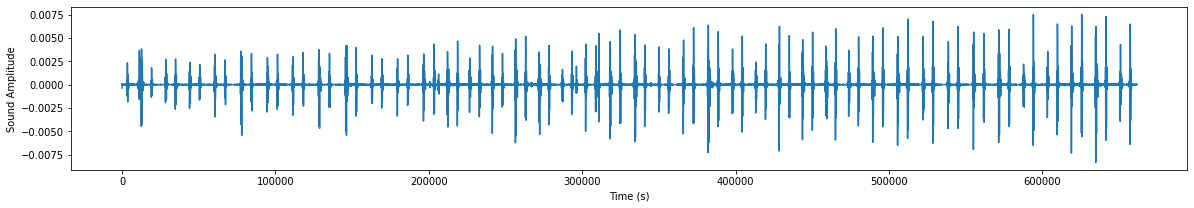

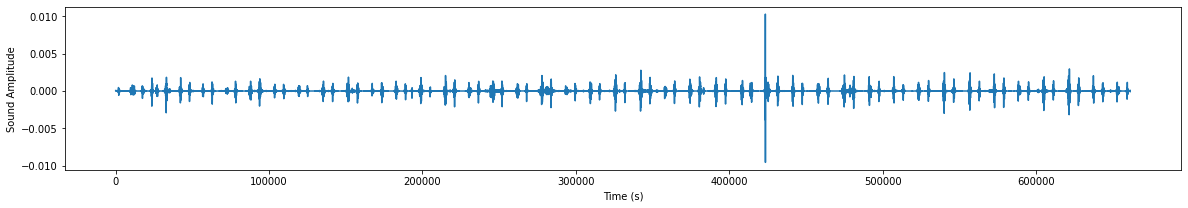

In [ ]:
denoised_file = []
i = 1

for file in range(0, len(audio_files_normal),1):

  audio, sfreq = librosa.load(audio_files_normal[file])
  denoised_name =  "Preprocessed_N_%s.wav" % i
  reduced_noise = nr.reduce_noise(y = audio, sr=sfreq, n_std_thresh_stationary=1.5,stationary=True)
  wavfile.write(denoised_name, sfreq, reduced_noise)
  denoised_file.append(denoised_name)
  fig, ax = plt.subplots(figsize=(20,3))
  ax.plot(reduced_noise)
  ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
  
  i=i+1
  plt.show()

In [ ]:
for f in denoised_file:
    src_path = os.path.join(directory, f)
    dst_path = os.path.join(Preprocess_normal, f)
    shutil.move(src_path, dst_path)

In [ ]:
import IPython
file = Preprocess_normal + 'Preprocessed_N_293.wav'
IPython.display.Audio(file)